In [17]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib
from spright import RMRelation 

import scienceplots

plt.style.use(('science','no-latex','bright','seaborn-v0_8-poster'))

#Single-column figures: The maximum width is 8.5 cm (3.35 inches).
#Double-column figures: The maximum width is 17.8 cm (7 inches).


/home/xuanji/.local/lib/python3.11/site-packages/pytools/persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


In [18]:
a = 5

a == (3 or 5)

False

In [19]:
a = 90

if a == 3 or 5:
    print(a)

90


In [20]:
from cosmic_shoreline import CosmicShoreline

cs = CosmicShoreline()

# 1. Uncertainties of Escape Rate

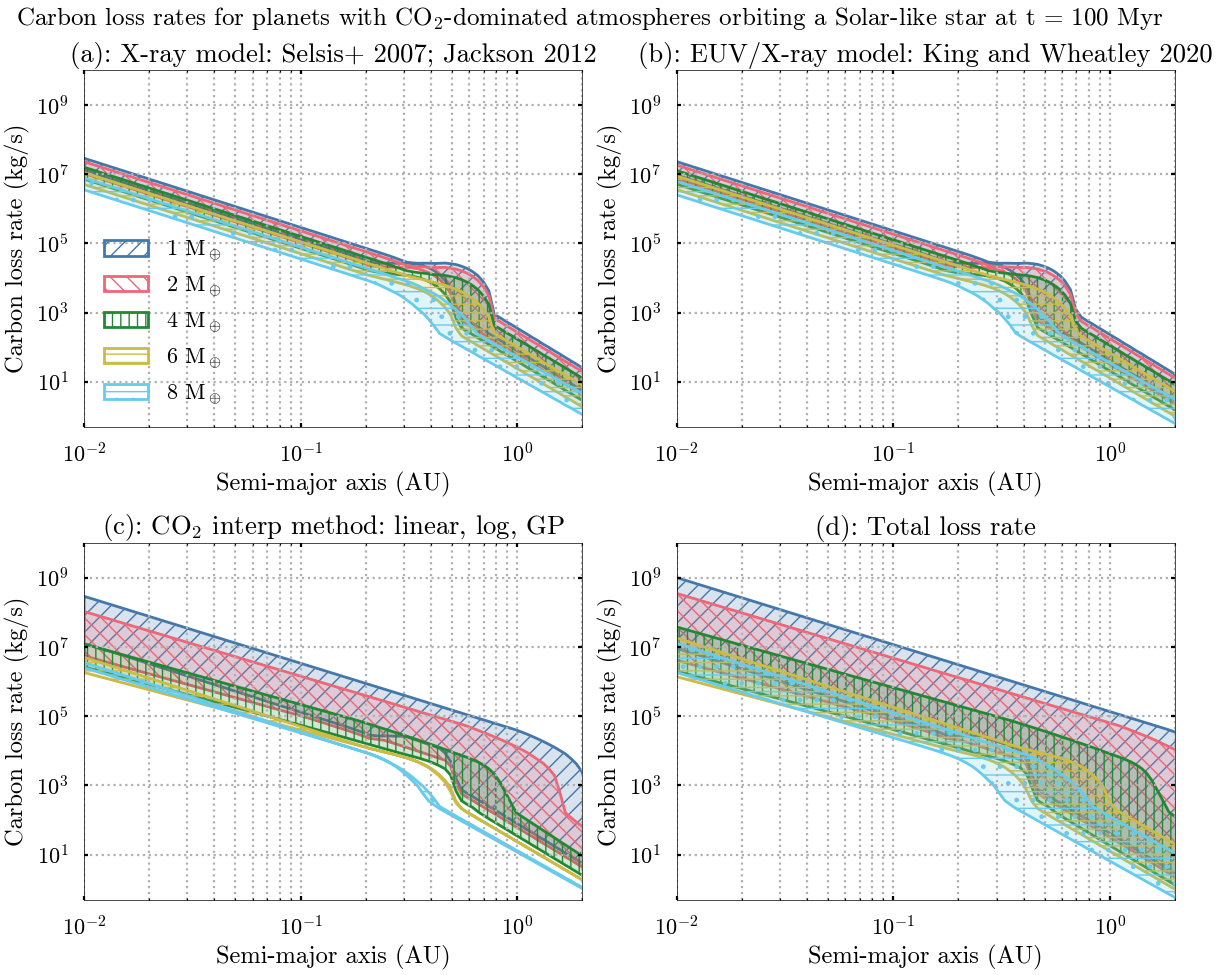

In [3]:
stellar_mass = 1
planet_masses = [1, 2, 4, 6, 8]
semi_major_axes = np.logspace(-2,0.5, 100) # AU

fig, axes = plt.subplots(2,2, figsize=(12,10))

hatches = ['//','\\\\','||','--','-.']


CO2_lower_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))
CO2_upper_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))


for i, planet_mass in enumerate(planet_masses):
    # Uncertainty in the CO2 mass loss rate

    # Caused by fitting method (linear, GP, log)
    L_XUV, L_X, L_EUV1, L_EUV2, Rs = cs.calculate_L_XUV(1, 1e8, method='Jackson',
                                                    output = 'multi-band')
    CO2_upper_fit = np.zeros(len(semi_major_axes))
    CO2_lower_fit = np.zeros(len(semi_major_axes))
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth = cs._calculate_F_xuv_to_earth(L_XUV, semi_major_axis)

        CO2_linear = cs.M_C_dot_CO2(F_xuv_to_earth, planet_mass, CO2_fit = 'linear')
        CO2_GP = cs.M_C_dot_CO2(F_xuv_to_earth, planet_mass, CO2_fit = 'GP')
        CO2_log = cs.M_C_dot_CO2(F_xuv_to_earth, planet_mass, CO2_fit = 'log')

        CO2_upper_fit[j] = np.maximum(CO2_linear, np.maximum(CO2_GP, CO2_log))
        CO2_lower_fit[j] = np.minimum(CO2_linear, np.minimum(CO2_GP, CO2_log))
    
    axes[1,0].fill_between(semi_major_axes, CO2_lower_fit, CO2_upper_fit,
                           facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,0].fill_between(semi_major_axes, CO2_lower_fit, CO2_upper_fit,
                           facecolor = 'none', edgecolor = 'C%d' % i, 
                           lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Caused by X-ray model

    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band')

    CO2_upper_Xray = np.zeros(len(semi_major_axes))
    CO2_lower_Xray = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S = cs._calculate_F_xuv_to_earth(L_XUV_S, semi_major_axis)
        F_xuv_to_earth_J = cs._calculate_F_xuv_to_earth(L_XUV_J, semi_major_axis)

        CO2_S = cs.M_C_dot_CO2(F_xuv_to_earth_S, planet_mass, CO2_fit = 'GP')
        CO2_J = cs.M_C_dot_CO2(F_xuv_to_earth_J, planet_mass, CO2_fit = 'GP')

        CO2_upper_Xray[j] = np.maximum(CO2_S, CO2_J)
        CO2_lower_Xray[j] = np.minimum(CO2_S, CO2_J)

    axes[0,0].fill_between(semi_major_axes, CO2_lower_Xray, CO2_upper_Xray,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, CO2_lower_Xray, CO2_upper_Xray,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Caused by EUV model

    L_XUV_K20_1, L_X_K20_1, L_EUV1_K20_1, L_EUV2_K20_1, Rs_K20_1 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band', 
                                                                                      gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_K20_2, L_X_K20_2, L_EUV1_K20_2, L_EUV2_K20_2, Rs_K20_2 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    
    CO2_upper_EUV = np.zeros(len(semi_major_axes))
    CO2_lower_EUV = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_K20_1 = cs._calculate_F_xuv_to_earth(L_XUV_K20_1, semi_major_axis)
        F_xuv_to_earth_K20_2 = cs._calculate_F_xuv_to_earth(L_XUV_K20_2, semi_major_axis)

        CO2_K20_1 = cs.M_C_dot_CO2(F_xuv_to_earth_K20_1, planet_mass, CO2_fit = 'GP')
        CO2_K20_2 = cs.M_C_dot_CO2(F_xuv_to_earth_K20_2, planet_mass, CO2_fit = 'GP')

        CO2_upper_EUV[j] = np.maximum(CO2_K20_1, CO2_K20_2)
        CO2_lower_EUV[j] = np.minimum(CO2_K20_1, CO2_K20_2)
    
    axes[0,1].fill_between(semi_major_axes, CO2_lower_EUV, CO2_upper_EUV,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, CO2_lower_EUV, CO2_upper_EUV,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Total uncertainty

    CO2_upper_total = np.zeros(len(semi_major_axes))
    CO2_lower_total = np.zeros(len(semi_major_axes))

    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S_1 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S_2 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J_1 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J_2 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S_1 = cs._calculate_F_xuv_to_earth(L_XUV_S_1, semi_major_axis)
        F_xuv_to_earth_S_2 = cs._calculate_F_xuv_to_earth(L_XUV_S_2, semi_major_axis)
        F_xuv_to_earth_J_1 = cs._calculate_F_xuv_to_earth(L_XUV_J_1, semi_major_axis)
        F_xuv_to_earth_J_2 = cs._calculate_F_xuv_to_earth(L_XUV_J_2, semi_major_axis)

        CO2_S_1_linear = cs.M_C_dot_CO2(F_xuv_to_earth_S_1, planet_mass, CO2_fit = 'linear')
        CO2_S_1_GP = cs.M_C_dot_CO2(F_xuv_to_earth_S_1, planet_mass, CO2_fit = 'GP')
        CO2_S_1_log = cs.M_C_dot_CO2(F_xuv_to_earth_S_1, planet_mass, CO2_fit = 'log')
        
        CO2_S_2_linear = cs.M_C_dot_CO2(F_xuv_to_earth_S_2, planet_mass, CO2_fit = 'linear')
        CO2_S_2_GP = cs.M_C_dot_CO2(F_xuv_to_earth_S_2, planet_mass, CO2_fit = 'GP')
        CO2_S_2_log = cs.M_C_dot_CO2(F_xuv_to_earth_S_2, planet_mass, CO2_fit = 'log')
        
        CO2_J_1_linear = cs.M_C_dot_CO2(F_xuv_to_earth_J_1, planet_mass, CO2_fit = 'linear')
        CO2_J_1_GP = cs.M_C_dot_CO2(F_xuv_to_earth_J_1, planet_mass, CO2_fit = 'GP')
        CO2_J_1_log = cs.M_C_dot_CO2(F_xuv_to_earth_J_1, planet_mass, CO2_fit = 'log')
        
        CO2_J_2_linear = cs.M_C_dot_CO2(F_xuv_to_earth_J_2, planet_mass, CO2_fit = 'linear')
        CO2_J_2_GP = cs.M_C_dot_CO2(F_xuv_to_earth_J_2, planet_mass, CO2_fit = 'GP')
        CO2_J_2_log = cs.M_C_dot_CO2(F_xuv_to_earth_J_2, planet_mass, CO2_fit = 'log')
        
        CO2_S_1 = np.maximum(CO2_S_1_linear, np.maximum(CO2_S_1_GP, CO2_S_1_log))
        CO2_S_2 = np.maximum(CO2_S_2_linear, np.maximum(CO2_S_2_GP, CO2_S_2_log))
        CO2_J_1 = np.maximum(CO2_J_1_linear, np.maximum(CO2_J_1_GP, CO2_J_1_log))
        CO2_J_2 = np.maximum(CO2_J_2_linear, np.maximum(CO2_J_2_GP, CO2_J_2_log))
        
        CO2_upper_total[j] = np.maximum(CO2_S_1, np.maximum(CO2_S_2, np.maximum(CO2_J_1, CO2_J_2)))

        CO2_S_1 = np.minimum(CO2_S_1_linear, np.minimum(CO2_S_1_GP, CO2_S_1_log))
        CO2_S_2 = np.minimum(CO2_S_2_linear, np.minimum(CO2_S_2_GP, CO2_S_2_log))
        CO2_J_1 = np.minimum(CO2_J_1_linear, np.minimum(CO2_J_1_GP, CO2_J_1_log))
        CO2_J_2 = np.minimum(CO2_J_2_linear, np.minimum(CO2_J_2_GP, CO2_J_2_log))
        
        CO2_lower_total[j] = np.minimum(CO2_S_1, np.minimum(CO2_S_2, np.minimum(CO2_J_1, CO2_J_2)))

    CO2_upper_total_plot[i] = CO2_upper_total
    CO2_lower_total_plot[i] = CO2_lower_total

    axes[1,1].fill_between(semi_major_axes, CO2_lower_total, CO2_upper_total,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, CO2_lower_total, CO2_upper_total,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)




for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(5e-1,1e10)
    ax.set_ylabel('Carbon loss rate (kg/s)')



axes[1,0].set_title('(c): CO$_2$ interp method: linear, log, GP')
axes[0,0].legend(loc='lower left')



axes[0,0].set_title('(a): X-ray model: Selsis+ 2007; Jackson 2012')

axes[0,1].set_title('(b): EUV/X-ray model: King and Wheatley 2020')

axes[1,1].set_title('(d): Total loss rate')

fig.suptitle('Carbon loss rates for planets with CO$_2$-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=18)
plt.tight_layout()




fig.savefig('./figures/atmospheric_loss_rates_unc_CO2.pdf',bbox_inches='tight')           

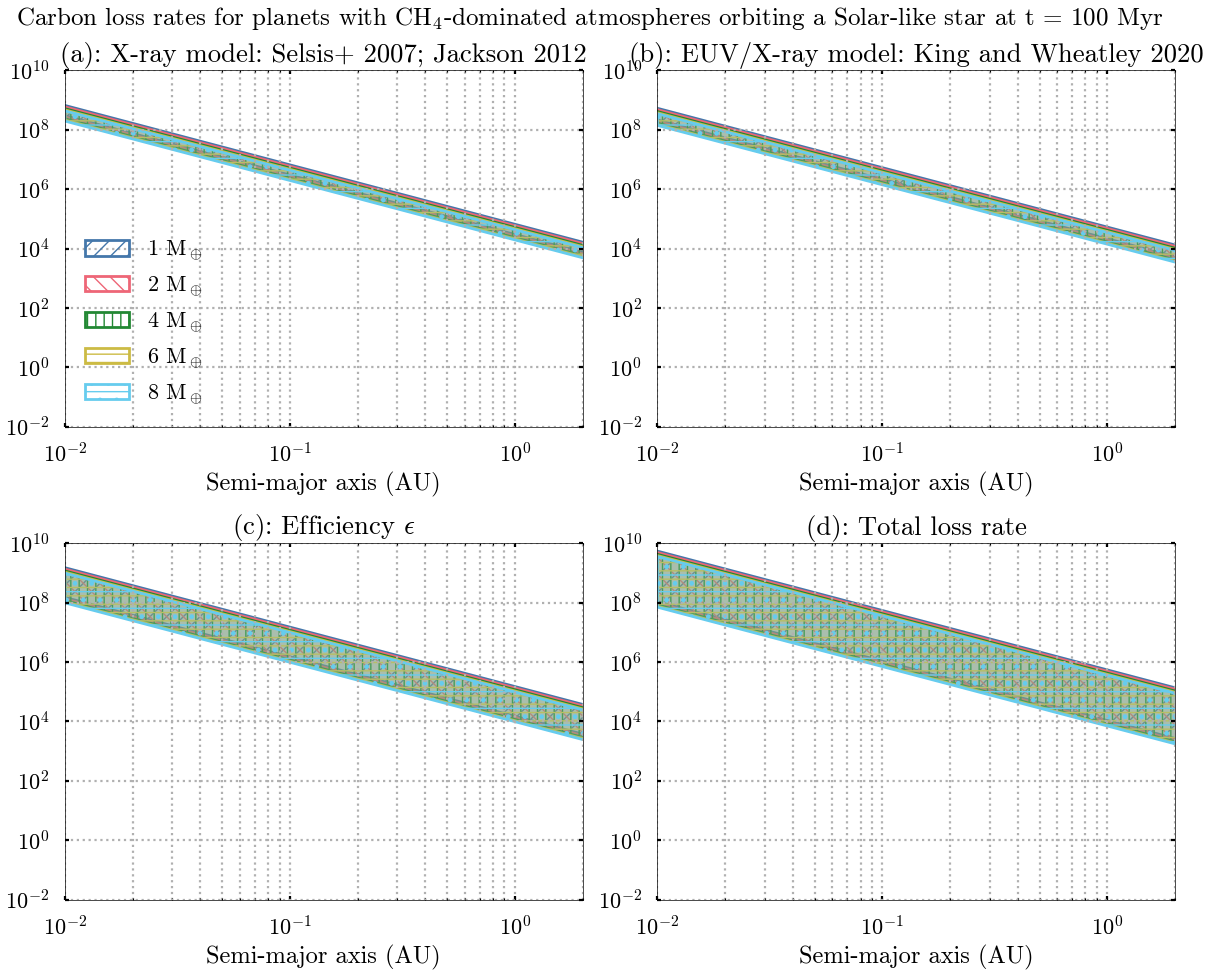

In [4]:
stellar_mass = 1
planet_masses = [1, 2, 4, 6, 8]
semi_major_axes = np.logspace(-2,0.5, 100) # AU
fig, axes = plt.subplots(2,2, figsize=(12,10))
hatches = ['//','\\\\','||','--','-.']


CH4_lower_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))
CH4_upper_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))

for i, planet_mass in enumerate(planet_masses):
    # Uncertainty in the CH4 mass loss rate

    # Caused by epsilon of the XUV heating
    CH4_upper_eff = np.zeros(len(semi_major_axes))
    CH4_lower_eff = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        L_XUV, L_X, L_EUV1, L_EUV2, Rs = cs.calculate_L_XUV(1, 1e8, method='Jackson', output = 'multi-band')
        F_xuv_to_earth = cs._calculate_F_xuv_to_earth(L_XUV, semi_major_axis)

        CH4_eff_1 = cs.M_C_dot_CH4(F_xuv_to_earth, planet_mass, epsilon = 0.05)
        CH4_eff_2 = cs.M_C_dot_CH4(F_xuv_to_earth, planet_mass, epsilon = 0.5)

        CH4_upper_eff[j] = np.maximum(CH4_eff_1, CH4_eff_2)
        CH4_lower_eff[j] = np.minimum(CH4_eff_1, CH4_eff_2)
    
    axes[1,0].fill_between(semi_major_axes, CH4_lower_eff, CH4_upper_eff,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,0].fill_between(semi_major_axes, CH4_lower_eff, CH4_upper_eff,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    # Caused by X-ray model
    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band')
    CH4_upper_Xray = np.zeros(len(semi_major_axes))
    CH4_lower_Xray = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S = cs._calculate_F_xuv_to_earth(L_XUV_S, semi_major_axis)
        F_xuv_to_earth_J = cs._calculate_F_xuv_to_earth(L_XUV_J, semi_major_axis)

        CH4_S = cs.M_C_dot_CH4(F_xuv_to_earth_S, planet_mass, epsilon = 0.1)
        CH4_J = cs.M_C_dot_CH4(F_xuv_to_earth_J, planet_mass, epsilon = 0.1)

        CH4_upper_Xray[j] = np.maximum(CH4_S, CH4_J)
        CH4_lower_Xray[j] = np.minimum(CH4_S, CH4_J)
    axes[0,0].fill_between(semi_major_axes, CH4_lower_Xray, CH4_upper_Xray,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, CH4_lower_Xray, CH4_upper_Xray,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    # Caused by EUV model
    L_XUV_K20_1, L_X_K20_1, L_EUV1_K20_1, L_EUV2_K20_1, Rs_K20_1 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band', 
                                                                                      gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_K20_2, L_X_K20_2, L_EUV1_K20_2, L_EUV2_K20_2, Rs_K20_2 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    CH4_upper_EUV = np.zeros(len(semi_major_axes))
    CH4_lower_EUV = np.zeros(len(semi_major_axes))
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_K20_1 = cs._calculate_F_xuv_to_earth(L_XUV_K20_1, semi_major_axis)
        F_xuv_to_earth_K20_2 = cs._calculate_F_xuv_to_earth(L_XUV_K20_2, semi_major_axis)

        CH4_K20_1 = cs.M_C_dot_CH4(F_xuv_to_earth_K20_1, planet_mass, epsilon = 0.1)
        CH4_K20_2 = cs.M_C_dot_CH4(F_xuv_to_earth_K20_2, planet_mass, epsilon = 0.1)  

        CH4_upper_EUV[j] = np.maximum(CH4_K20_1, CH4_K20_2)
        CH4_lower_EUV[j] = np.minimum(CH4_K20_1, CH4_K20_2)

    axes[0,1].fill_between(semi_major_axes, CH4_lower_EUV, CH4_upper_EUV,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, CH4_lower_EUV, CH4_upper_EUV,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Total uncertainty
    CH4_upper_total = np.zeros(len(semi_major_axes))
    CH4_lower_total = np.zeros(len(semi_major_axes))

    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S_1 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)   
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S_2 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J_1 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J_2 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)   
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S_1 = cs._calculate_F_xuv_to_earth(L_XUV_S_1, semi_major_axis)
        F_xuv_to_earth_S_2 = cs._calculate_F_xuv_to_earth(L_XUV_S_2, semi_major_axis)
        F_xuv_to_earth_J_1 = cs._calculate_F_xuv_to_earth(L_XUV_J_1, semi_major_axis)
        F_xuv_to_earth_J_2 = cs._calculate_F_xuv_to_earth(L_XUV_J_2, semi_major_axis)

        CH4_S_1 = cs.M_C_dot_CH4(F_xuv_to_earth_S_1, planet_mass, epsilon = 0.05)
        CH4_S_2 = cs.M_C_dot_CH4(F_xuv_to_earth_S_2, planet_mass, epsilon = 0.05)
        CH4_J_1 = cs.M_C_dot_CH4(F_xuv_to_earth_J_1, planet_mass, epsilon = 0.05)
        CH4_J_2 = cs.M_C_dot_CH4(F_xuv_to_earth_J_2, planet_mass, epsilon = 0.05)

        CH4_upper_total[j] = np.maximum(CH4_S_1, np.maximum(CH4_S_2, np.maximum(CH4_J_1, CH4_J_2)))* 10
        CH4_lower_total[j] = np.minimum(CH4_S_1, np.minimum(CH4_S_2, np.minimum(CH4_J_1, CH4_J_2)))
    CH4_upper_total_plot[i] = CH4_upper_total
    CH4_lower_total_plot[i] = CH4_lower_total

    axes[1,1].fill_between(semi_major_axes, CH4_lower_total, CH4_upper_total,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, CH4_lower_total, CH4_upper_total,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(1e-2,1e10)
axes[1,0].set_title('(c): Efficiency $\epsilon$')
axes[0,0].legend(loc='lower left')
axes[0,0].set_title('(a): X-ray model: Selsis+ 2007; Jackson 2012')
axes[0,1].set_title('(b): EUV/X-ray model: King and Wheatley 2020')
axes[1,1].set_title('(d): Total loss rate')
fig.suptitle('Carbon loss rates for planets with CH$_4$-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=18)
plt.tight_layout()
                                                        

fig.savefig('./figures/atmospheric_loss_rates_unc_CH4.pdf',bbox_inches='tight')           

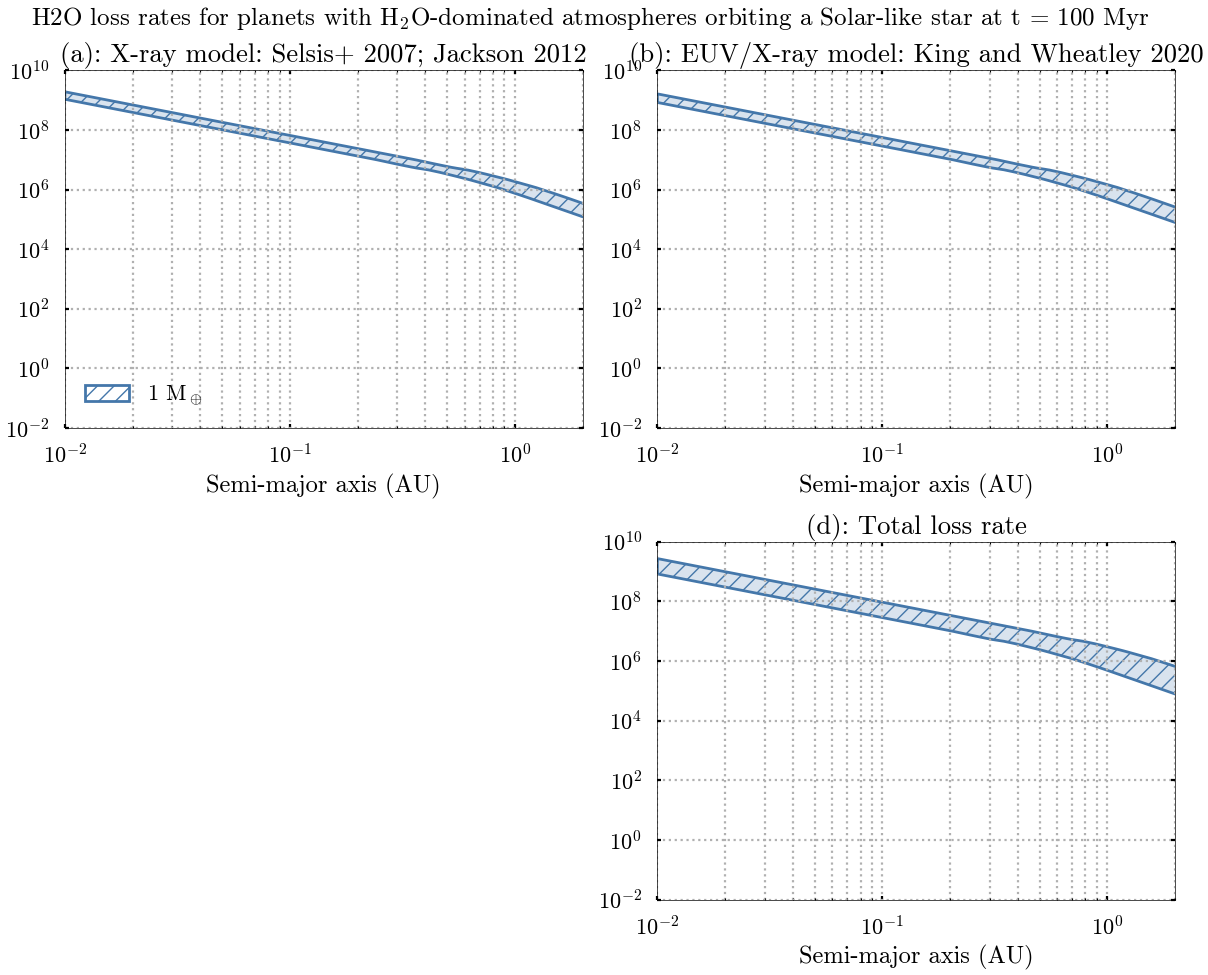

In [5]:
# H2O Johnstone et al. 2020
stellar_mass = 1
planet_masses = [1]
semi_major_axes = np.logspace(-2,0.5, 100) # AU
fig, axes = plt.subplots(2,2, figsize=(12,10))
hatches = ['//','\\\\','||','--','-.']

H2O_lower_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))
H2O_upper_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))

for i, planet_mass in enumerate(planet_masses):
    # Uncertainty caused by the X-ray model
    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band')

    H2O_upper_Xray = np.zeros(len(semi_major_axes))
    H2O_lower_Xray = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S = cs._calculate_F_xuv_to_earth(L_XUV_S, semi_major_axis)
        F_xuv_to_earth_J = cs._calculate_F_xuv_to_earth(L_XUV_J, semi_major_axis)

        H2O_S = cs.M_C_dot_H2O(F_xuv_to_earth_S, planet_mass)
        H2O_J = cs.M_C_dot_H2O(F_xuv_to_earth_J, planet_mass)

        H2O_upper_Xray[j] = np.maximum(H2O_S, H2O_J)
        H2O_lower_Xray[j] = np.minimum(H2O_S, H2O_J)

    axes[0,0].fill_between(semi_major_axes, H2O_lower_Xray, H2O_upper_Xray,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, H2O_lower_Xray, H2O_upper_Xray,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Uncertainty caused by the EUV model
    L_XUV_K20_1, L_X_K20_1, L_EUV1_K20_1, L_EUV2_K20_1, Rs_K20_1 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band', 
                                                                                      gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_K20_2, L_X_K20_2, L_EUV1_K20_2, L_EUV2_K20_2, Rs_K20_2 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    H2O_upper_EUV = np.zeros(len(semi_major_axes))
    H2O_lower_EUV = np.zeros(len(semi_major_axes))      

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_K20_1 = cs._calculate_F_xuv_to_earth(L_XUV_K20_1, semi_major_axis)
        F_xuv_to_earth_K20_2 = cs._calculate_F_xuv_to_earth(L_XUV_K20_2, semi_major_axis)

        H2O_K20_1 = cs.M_C_dot_H2O(F_xuv_to_earth_K20_1, planet_mass)
        H2O_K20_2 = cs.M_C_dot_H2O(F_xuv_to_earth_K20_2, planet_mass)

        H2O_upper_EUV[j] = np.maximum(H2O_K20_1, H2O_K20_2)
        H2O_lower_EUV[j] = np.minimum(H2O_K20_1, H2O_K20_2)
    axes[0,1].fill_between(semi_major_axes, H2O_lower_EUV, H2O_upper_EUV,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, H2O_lower_EUV, H2O_upper_EUV,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Total uncertainty
    H2O_upper_total = np.zeros(len(semi_major_axes))
    H2O_lower_total = np.zeros(len(semi_major_axes))
    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S_1 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S_2 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)   
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J_1 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J_2 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S_1 = cs._calculate_F_xuv_to_earth(L_XUV_S_1, semi_major_axis)
        F_xuv_to_earth_S_2 = cs._calculate_F_xuv_to_earth(L_XUV_S_2, semi_major_axis)
        F_xuv_to_earth_J_1 = cs._calculate_F_xuv_to_earth(L_XUV_J_1, semi_major_axis)
        F_xuv_to_earth_J_2 = cs._calculate_F_xuv_to_earth(L_XUV_J_2, semi_major_axis)

        H2O_S_1 = cs.M_C_dot_H2O(F_xuv_to_earth_S_1, planet_mass)
        H2O_S_2 = cs.M_C_dot_H2O(F_xuv_to_earth_S_2, planet_mass)
        H2O_J_1 = cs.M_C_dot_H2O(F_xuv_to_earth_J_1, planet_mass)
        H2O_J_2 = cs.M_C_dot_H2O(F_xuv_to_earth_J_2, planet_mass)

        H2O_upper_total[j] = np.maximum(H2O_S_1, np.maximum(H2O_S_2, np.maximum(H2O_J_1, H2O_J_2)))
        H2O_lower_total[j] = np.minimum(H2O_S_1, np.minimum(H2O_S_2, np.minimum(H2O_J_1, H2O_J_2)))

    H2O_upper_total_plot[i] = H2O_upper_total
    H2O_lower_total_plot[i] = H2O_lower_total

    axes[1,1].fill_between(semi_major_axes, H2O_lower_total, H2O_upper_total,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, H2O_lower_total, H2O_upper_total,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(1e-2,1e10)
axes[0,0].set_title('(a): X-ray model: Selsis+ 2007; Jackson 2012')
axes[0,1].set_title('(b): EUV/X-ray model: King and Wheatley 2020')
axes[1,1].set_title('(d): Total loss rate')

axes[1,0].remove()

axes[0,0].legend(loc='lower left')
fig.suptitle('H2O loss rates for planets with H$_2$O-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=18)
plt.tight_layout()
fig.savefig('./figures/atmospheric_loss_rates_unc_H2O.pdf',bbox_inches='tight')

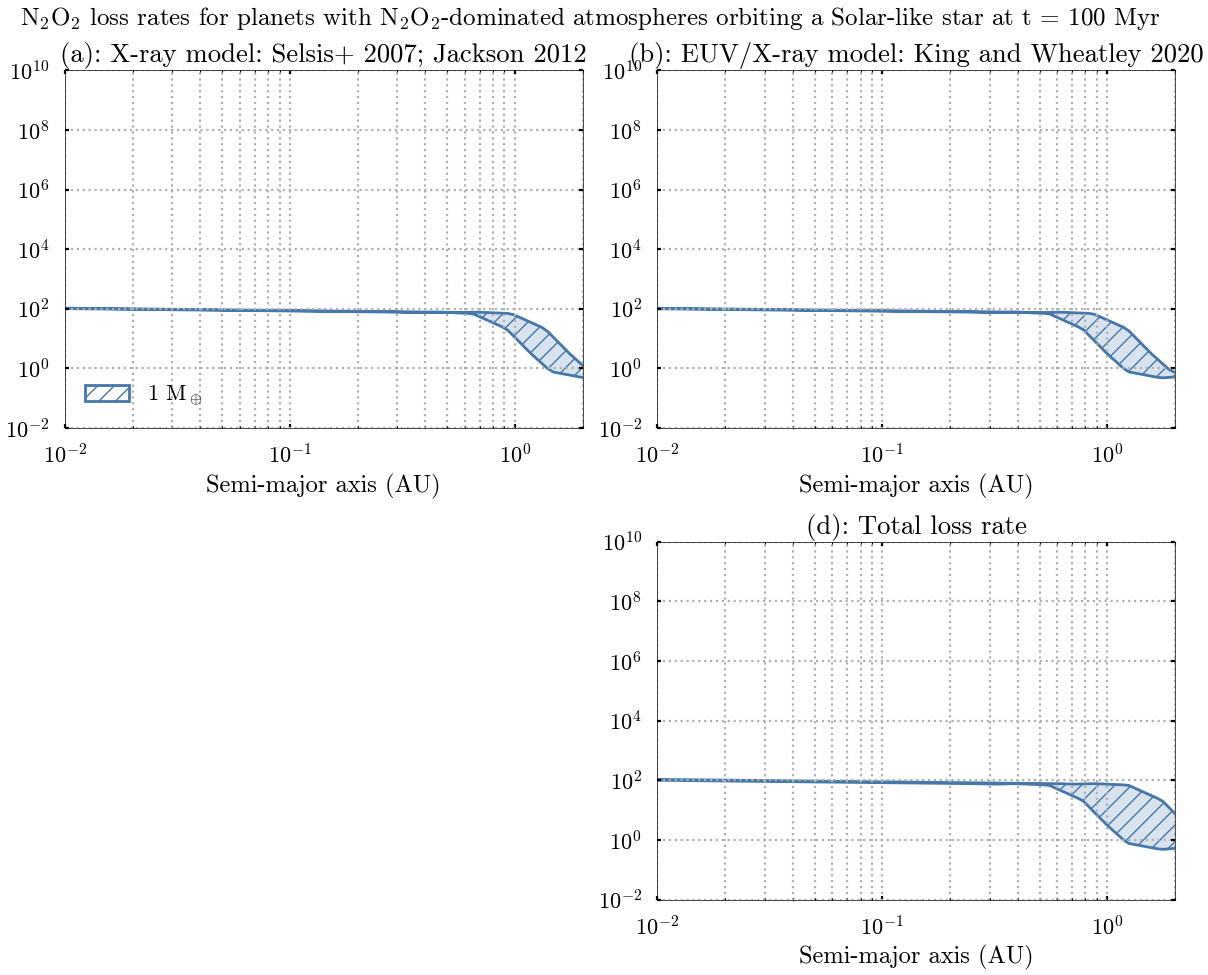

In [6]:
# N2O2 N22
stellar_mass = 1
planet_masses = [1]
semi_major_axes = np.logspace(-2,0.5, 100) # AU
fig, axes = plt.subplots(2,2, figsize=(12,10))

hatches = ['//','\\\\','||','--','-.']

N2O2_lower_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))
N2O2_upper_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))

for i, planet_mass in enumerate(planet_masses):
    # Uncertainty caused by the X-ray model
    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band')

    N2O2_upper_Xray = np.zeros(len(semi_major_axes))
    N2O2_lower_Xray = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S = cs._calculate_F_xuv_to_earth(L_XUV_S, semi_major_axis)
        F_xuv_to_earth_J = cs._calculate_F_xuv_to_earth(L_XUV_J, semi_major_axis)

        N2O2_S = cs.M_C_dot_N2O2(F_xuv_to_earth_S, planet_mass)
        N2O2_J = cs.M_C_dot_N2O2(F_xuv_to_earth_J, planet_mass)

        N2O2_upper_Xray[j] = np.maximum(N2O2_S, N2O2_J)
        N2O2_lower_Xray[j] = np.minimum(N2O2_S, N2O2_J)

    axes[0,0].fill_between(semi_major_axes, N2O2_lower_Xray, N2O2_upper_Xray,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, N2O2_lower_Xray, N2O2_upper_Xray,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Uncertainty caused by the EUV model
    L_XUV_K20_1, L_X_K20_1, L_EUV1_K20_1, L_EUV2_K20_1, Rs_K20_1 = cs.calculate_L_XUV(1, 1e8
                                                                                      , output= 'multi-band', 
                                                                                      gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_K20_2, L_X_K20_2, L_EUV1_K20_2, L_EUV2_K20_2, Rs_K20_2 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    N2O2_upper_EUV = np.zeros(len(semi_major_axes))
    N2O2_lower_EUV = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_K20_1 = cs._calculate_F_xuv_to_earth(L_XUV_K20_1, semi_major_axis)
        F_xuv_to_earth_K20_2 = cs._calculate_F_xuv_to_earth(L_XUV_K20_2, semi_major_axis)

        N2O2_K20_1 = cs.M_C_dot_N2O2(F_xuv_to_earth_K20_1, planet_mass)
        N2O2_K20_2 = cs.M_C_dot_N2O2(F_xuv_to_earth_K20_2, planet_mass)

        N2O2_upper_EUV[j] = np.maximum(N2O2_K20_1, N2O2_K20_2)
        N2O2_lower_EUV[j] = np.minimum(N2O2_K20_1, N2O2_K20_2)
    axes[0,1].fill_between(semi_major_axes, N2O2_lower_EUV, N2O2_upper_EUV,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, N2O2_lower_EUV, N2O2_upper_EUV,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Total uncertainty
    N2O2_upper_total = np.zeros(len(semi_major_axes))
    N2O2_lower_total = np.zeros(len(semi_major_axes))

    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S_1 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)   
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S_2 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)   
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J_1 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)   
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J_2 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S_1 = cs._calculate_F_xuv_to_earth(L_XUV_S_1, semi_major_axis)
        F_xuv_to_earth_S_2 = cs._calculate_F_xuv_to_earth(L_XUV_S_2, semi_major_axis)
        F_xuv_to_earth_J_1 = cs._calculate_F_xuv_to_earth(L_XUV_J_1, semi_major_axis)
        F_xuv_to_earth_J_2 = cs._calculate_F_xuv_to_earth(L_XUV_J_2, semi_major_axis)

        N2O2_S_1 = cs.M_C_dot_N2O2(F_xuv_to_earth_S_1, planet_mass)
        N2O2_S_2 = cs.M_C_dot_N2O2(F_xuv_to_earth_S_2, planet_mass)
        N2O2_J_1 = cs.M_C_dot_N2O2(F_xuv_to_earth_J_1, planet_mass)
        N2O2_J_2 = cs.M_C_dot_N2O2(F_xuv_to_earth_J_2, planet_mass)

        N2O2_upper_total[j] = np.maximum(N2O2_S_1, np.maximum(N2O2_S_2, np.maximum(N2O2_J_1, N2O2_J_2)))
        N2O2_lower_total[j] = np.minimum(N2O2_S_1, np.minimum(N2O2_S_2, np.minimum(N2O2_J_1, N2O2_J_2)))

    N2O2_upper_total_plot[i] = N2O2_upper_total
    N2O2_lower_total_plot[i] = N2O2_lower_total
    
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_total, N2O2_upper_total,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_total, N2O2_upper_total, 
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(1e-2,1e10)
axes[0,0].set_title('(a): X-ray model: Selsis+ 2007; Jackson 2012')
axes[0,1].set_title('(b): EUV/X-ray model: King and Wheatley 2020')
axes[1,1].set_title('(d): Total loss rate')
axes[1,0].remove()
axes[0,0].legend(loc='lower left')
fig.suptitle('N$_2$O$_2$ loss rates for planets with N$_2$O$_2$-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=18)
plt.tight_layout()
fig.savefig('./figures/atmospheric_loss_rates_unc_N2O2_N22.pdf',bbox_inches='tight')


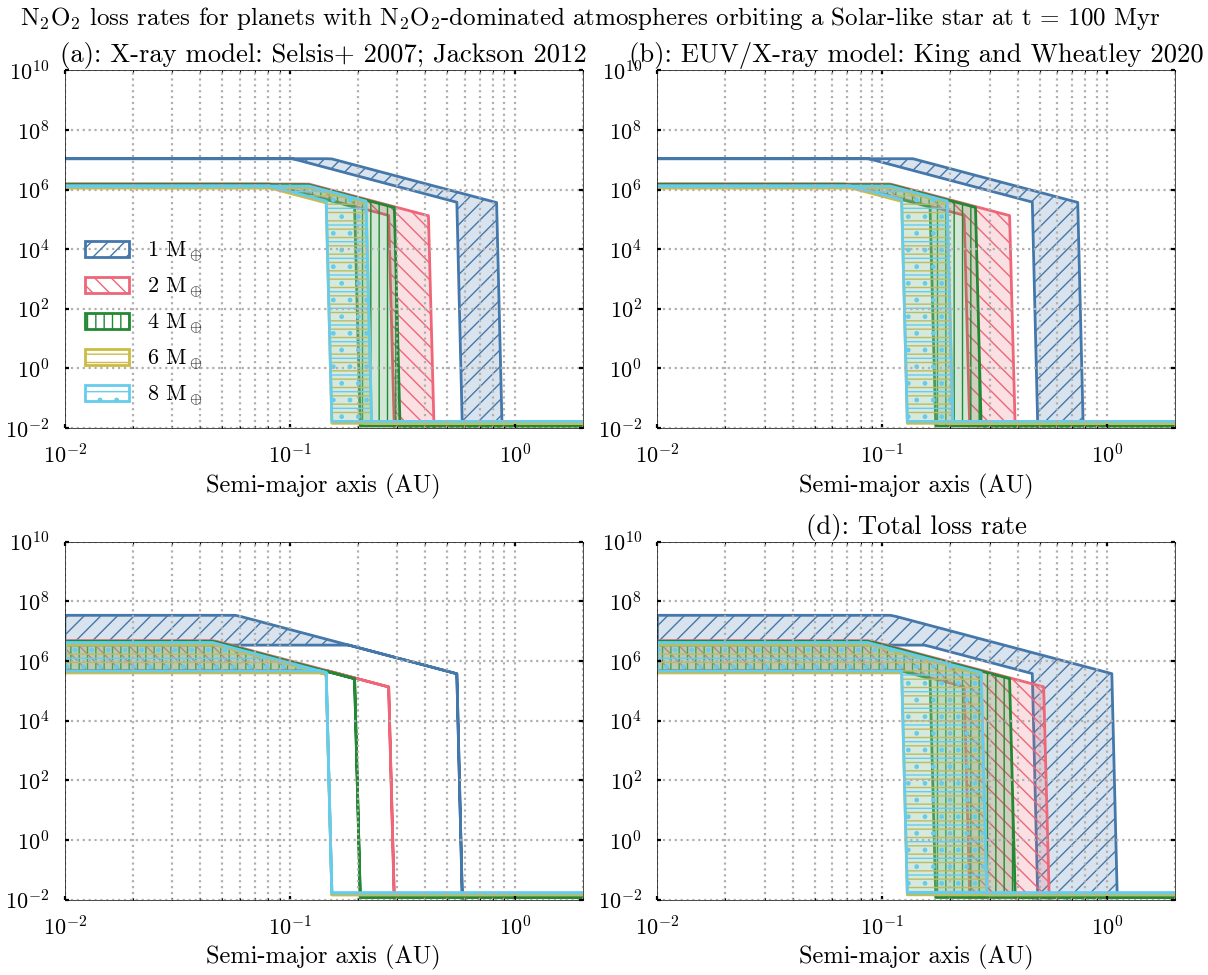

In [7]:
# N2O2 CR24

stellar_mass = 1
planet_masses = [1, 2, 4, 6, 8]
semi_major_axes = np.logspace(-2,0.5, 100) # AU
fig, axes = plt.subplots(2,2, figsize=(12,10))
hatches = ['//','\\\\','||','--','-.']

N2O2_lower_CR24_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))
N2O2_upper_CR24_total_plot = np.zeros((len(planet_masses), len(semi_major_axes)))

for i, planet_mass in enumerate(planet_masses):
    # Uncertainty in CR24 model
    L_XUV, L_X, L_EUV1, L_EUV2, Rs = cs.calculate_L_XUV(1, 1e8, output= 'multi-band')
    N2O2_upper_CR24_CR24 = np.zeros(len(semi_major_axes))
    N2O2_lower_CR24_CR24 = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth = cs._calculate_F_xuv_to_earth(L_XUV, semi_major_axis)

        N2O2_CR24_low = cs.M_C_dot_N2O2(F_xuv_to_earth, planet_mass, model = 'CR24',frac=0)
        N2O2_CR24_high = cs.M_C_dot_N2O2(F_xuv_to_earth, planet_mass, model = 'CR24',frac=1)

        N2O2_upper_CR24_CR24[j] = max(N2O2_CR24_low, N2O2_CR24_high)
        N2O2_lower_CR24_CR24[j] = min(N2O2_CR24_low, N2O2_CR24_high)
    axes[1,0].fill_between(semi_major_axes, N2O2_lower_CR24_CR24, N2O2_upper_CR24_CR24,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,0].fill_between(semi_major_axes, N2O2_lower_CR24_CR24, N2O2_upper_CR24_CR24,
                            facecolor = 'none', edgecolor = 'C%d' % i,
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)

    # Uncertainty caused by the X-ray model
    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band')
    N2O2_upper_CR24_Xray = np.zeros(len(semi_major_axes))
    N2O2_lower_CR24_Xray = np.zeros(len(semi_major_axes))

    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S = cs._calculate_F_xuv_to_earth(L_XUV_S, semi_major_axis)
        F_xuv_to_earth_J = cs._calculate_F_xuv_to_earth(L_XUV_J, semi_major_axis)

        N2O2_S = cs.M_C_dot_N2O2(F_xuv_to_earth_S, planet_mass, model = 'CR24')
        N2O2_J = cs.M_C_dot_N2O2(F_xuv_to_earth_J, planet_mass, model = 'CR24')

        N2O2_upper_CR24_Xray[j] = np.maximum(N2O2_S, N2O2_J)
        N2O2_lower_CR24_Xray[j] = np.minimum(N2O2_S, N2O2_J)
    axes[0,0].fill_between(semi_major_axes, N2O2_lower_CR24_Xray, N2O2_upper_CR24_Xray,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, N2O2_lower_CR24_Xray, N2O2_upper_CR24_Xray,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Uncertainty caused by the EUV model
    L_XUV_K20_1, L_X_K20_1, L_EUV1_K20_1, L_EUV2_K20_1, Rs_K20_1 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band', 
                                                                                      gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_K20_2, L_X_K20_2, L_EUV1_K20_2, L_EUV2_K20_2, Rs_K20_2 = cs.calculate_L_XUV(1, 1e8, output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    N2O2_upper_CR24_EUV = np.zeros(len(semi_major_axes))
    N2O2_lower_CR24_EUV = np.zeros(len(semi_major_axes))
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_K20_1 = cs._calculate_F_xuv_to_earth(L_XUV_K20_1, semi_major_axis)
        F_xuv_to_earth_K20_2 = cs._calculate_F_xuv_to_earth(L_XUV_K20_2, semi_major_axis)

        N2O2_K20_1 = cs.M_C_dot_N2O2(F_xuv_to_earth_K20_1, planet_mass, model = 'CR24')
        N2O2_K20_2 = cs.M_C_dot_N2O2(F_xuv_to_earth_K20_2, planet_mass, model = 'CR24')

        N2O2_upper_CR24_EUV[j] = np.maximum(N2O2_K20_1, N2O2_K20_2)
        N2O2_lower_CR24_EUV[j] = np.minimum(N2O2_K20_1, N2O2_K20_2)

    axes[0,1].fill_between(semi_major_axes, N2O2_lower_CR24_EUV, N2O2_upper_CR24_EUV,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, N2O2_lower_CR24_EUV, N2O2_upper_CR24_EUV,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
    
    # Total uncertainty
    N2O2_upper_CR24_total = np.zeros(len(semi_major_axes))
    N2O2_lower_CR24_total = np.zeros(len(semi_major_axes))

    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S_1 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S_2 = cs.calculate_L_XUV(1, 1e8, method='Selsis', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J_1 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35+0.07, gamma2 = -0.76+0.16)
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J_2 = cs.calculate_L_XUV(1, 1e8, method='Jackson', output= 'multi-band',
                                                                                        gamma1 = -0.35-0.15, gamma2 = -0.76-0.04)
    
    for j, semi_major_axis in enumerate(semi_major_axes):
        F_xuv_to_earth_S_1 = cs._calculate_F_xuv_to_earth(L_XUV_S_1, semi_major_axis)
        F_xuv_to_earth_S_2 = cs._calculate_F_xuv_to_earth(L_XUV_S_2, semi_major_axis)
        F_xuv_to_earth_J_1 = cs._calculate_F_xuv_to_earth(L_XUV_J_1, semi_major_axis)
        F_xuv_to_earth_J_2 = cs._calculate_F_xuv_to_earth(L_XUV_J_2, semi_major_axis)

        N2O2_S_1_low = cs.M_C_dot_N2O2(F_xuv_to_earth_S_1, planet_mass, model = 'CR24', frac=0)
        N2O2_S_1_high = cs.M_C_dot_N2O2(F_xuv_to_earth_S_1, planet_mass, model = 'CR24', frac=1)

        N2O2_S_2_low = cs.M_C_dot_N2O2(F_xuv_to_earth_S_2, planet_mass, model = 'CR24', frac=0)
        N2O2_S_2_high = cs.M_C_dot_N2O2(F_xuv_to_earth_S_2, planet_mass, model = 'CR24', frac=1)

        N2O2_J_1_low = cs.M_C_dot_N2O2(F_xuv_to_earth_J_1, planet_mass, model = 'CR24', frac=0)
        N2O2_J_1_high = cs.M_C_dot_N2O2(F_xuv_to_earth_J_1, planet_mass, model = 'CR24', frac=1)

        N2O2_J_2_low = cs.M_C_dot_N2O2(F_xuv_to_earth_J_2, planet_mass, model = 'CR24', frac=0)
        N2O2_J_2_high = cs.M_C_dot_N2O2(F_xuv_to_earth_J_2, planet_mass, model = 'CR24', frac=1)

        N2O2_upper_CR24_total[j] = np.maximum(N2O2_S_1_high, np.maximum(N2O2_S_2_high,
                                                np.maximum(N2O2_J_1_high, N2O2_J_2_high)))
        N2O2_lower_CR24_total[j] = np.minimum(N2O2_S_1_low, np.minimum(N2O2_S_2_low,
                                                np.minimum(N2O2_J_1_low, N2O2_J_2_low)))
        
    N2O2_upper_CR24_total_plot[i] = N2O2_upper_CR24_total
    N2O2_lower_CR24_total_plot[i] = N2O2_lower_CR24_total
    
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_CR24_total, N2O2_upper_CR24_total,
                            facecolor = 'C%d' % i, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_CR24_total, N2O2_upper_CR24_total,
                            facecolor = 'none', edgecolor = 'C%d' % i, 
                            lw= 2, hatch = hatches[i], label = '%d M$_\oplus$' % planet_mass)
        
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(1e-2,1e10)

axes[0,0].set_title('(a): X-ray model: Selsis+ 2007; Jackson 2012')
axes[0,1].set_title('(b): EUV/X-ray model: King and Wheatley 2020')
axes[1,1].set_title('(d): Total loss rate')

axes[0,0].legend(loc='lower left')
fig.suptitle('N$_2$O$_2$ loss rates for planets with N$_2$O$_2$-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=18)
plt.tight_layout()
fig.savefig('./figures/atmospheric_loss_rates_unc_N2O2_CR24.pdf',bbox_inches='tight')
    


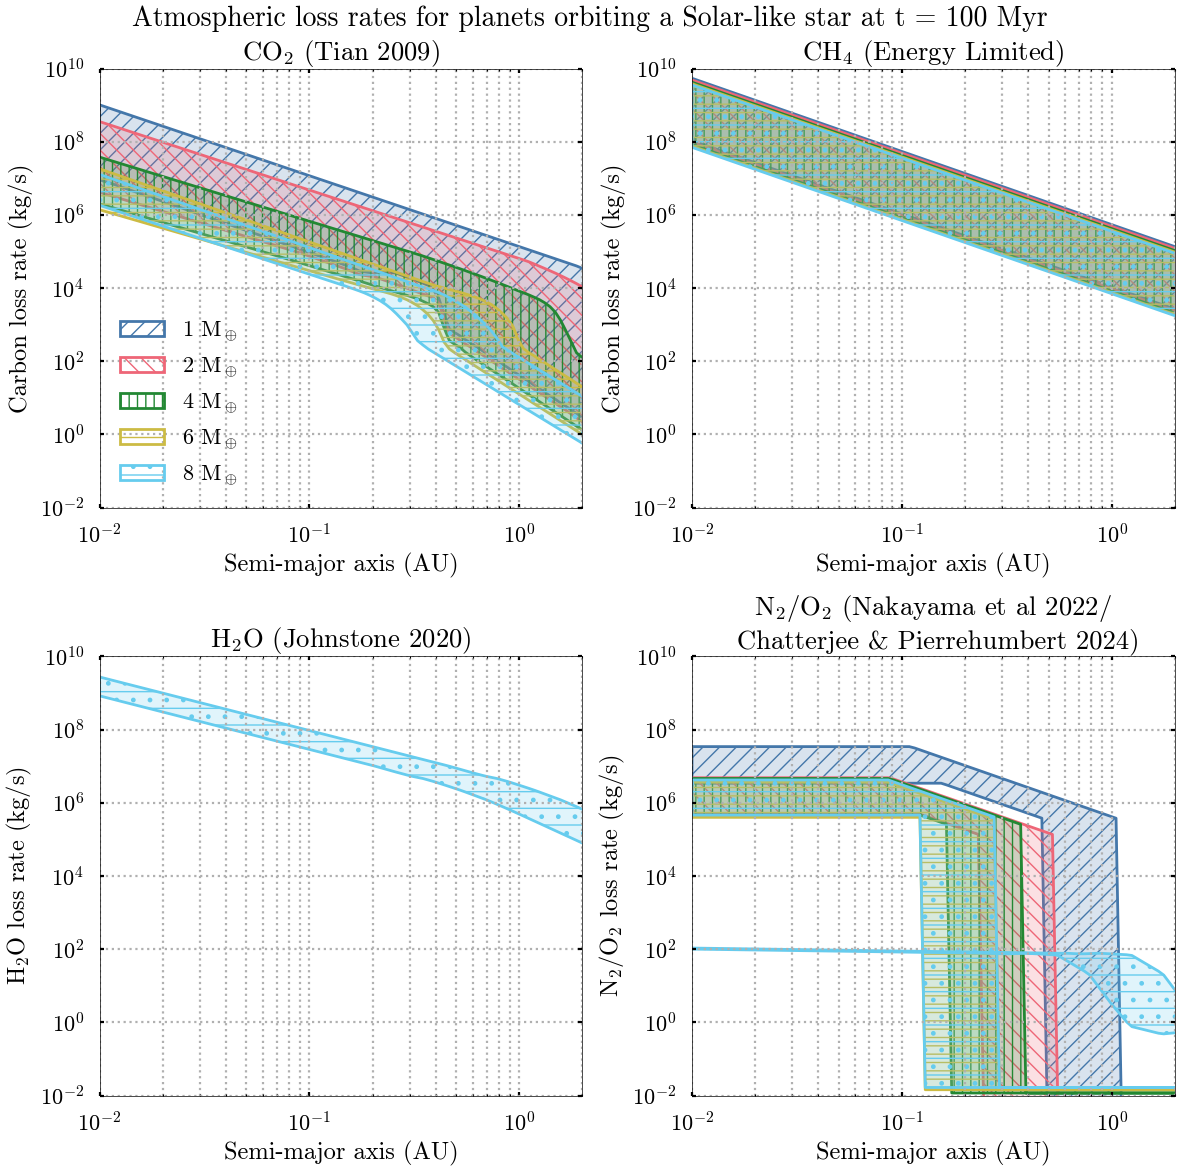

In [8]:
from matplotlib.patches import Patch

fig, axes = plt.subplots(2,2,figsize=(12,12))

hatches = ['//','\\\\','||','--','-.']

planet_masses = [1, 2, 4, 6, 8]

for n, pl_masse in enumerate(planet_masses):
    axes[0,0].fill_between(semi_major_axes, CO2_lower_total_plot[n], CO2_upper_total_plot[n],
                            facecolor = 'C%d' % n, alpha = 0.2)
    axes[0,0].fill_between(semi_major_axes, CO2_lower_total_plot[n], CO2_upper_total_plot[n],
                            facecolor = 'none', edgecolor = 'C%d' % n, 
                            lw= 2, hatch = hatches[n], label = '%d M$_\oplus$' % pl_masse)
    axes[0,1].fill_between(semi_major_axes, CH4_lower_total_plot[n], CH4_upper_total_plot[n],
                            facecolor = 'C%d' % n, alpha = 0.2)
    axes[0,1].fill_between(semi_major_axes, CH4_lower_total_plot[n], CH4_upper_total_plot[n],
                            facecolor = 'none', edgecolor = 'C%d' % n, 
                            lw= 2, hatch = hatches[n], label = '%d M$_\oplus$' % pl_masse)
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_CR24_total_plot[n], N2O2_upper_CR24_total_plot[n],
                            facecolor = 'C%d' % n, alpha = 0.2)
    axes[1,1].fill_between(semi_major_axes, N2O2_lower_CR24_total_plot[n], N2O2_upper_CR24_total_plot[n],
                            facecolor = 'none', edgecolor = 'C%d' % n, 
                            lw= 2, hatch = hatches[n], label = '%d M$_\oplus$' % pl_masse)
    
axes[1,0].fill_between(semi_major_axes, H2O_lower_total_plot[0], H2O_upper_total_plot[0],
                            facecolor = 'C%d' % n, alpha = 0.2)
axes[1,0].fill_between(semi_major_axes, H2O_lower_total_plot[0], H2O_upper_total_plot[0],
                            facecolor = 'none', edgecolor = 'C%d' % n, 
                            lw= 2, hatch = hatches[n], label = '%d M$_\oplus$' % pl_masse)

axes[1,1].fill_between(semi_major_axes, N2O2_lower_total_plot[0], N2O2_upper_total_plot[0],
                            facecolor = 'C%d' % n, alpha = 0.2)
axes[1,1].fill_between(semi_major_axes, N2O2_lower_total_plot[0], N2O2_upper_total_plot[0],   
                            facecolor = 'none', edgecolor = 'C%d' % n, 
                            lw= 2, hatch = hatches[n], label = '%d M$_\oplus$' % pl_masse)
# Set the axis scales and labels
for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(1e-2,1e10)


axes[0,0].legend(loc='lower left')
axes[0,0].set_ylabel('Carbon loss rate (kg/s)')
axes[0,0].set_title('CO$_2$ (Tian 2009)')

axes[0,1].set_ylabel('Carbon loss rate (kg/s)')
axes[0,1].set_title('CH$_4$ (Energy Limited)')

# axes[2,0].set_ylabel('Carbon loss rate (kg/s)')
# axes[2,0].set_title('CO$_2$ (Nonthermal)')

axes[1,0].set_ylabel('H$_2$O loss rate (kg/s)')
axes[1,0].set_title('H$_2$O (Johnstone 2020)')

axes[1,1].set_ylabel('N$_2$/O$_2$ loss rate (kg/s)')
axes[1,1].set_title('N$_2$/O$_2$ (Nakayama et al 2022/ \n Chatterjee & Pierrehumbert 2024)')

# axes[2,1].remove()


fig.suptitle('Atmospheric loss rates for planets orbiting a Solar-like star at t = 100 Myr', fontsize=20)

plt.tight_layout()
fig.savefig('./figures/Atmospheric_Loss_Rates.pdf',bbox_inches='tight')

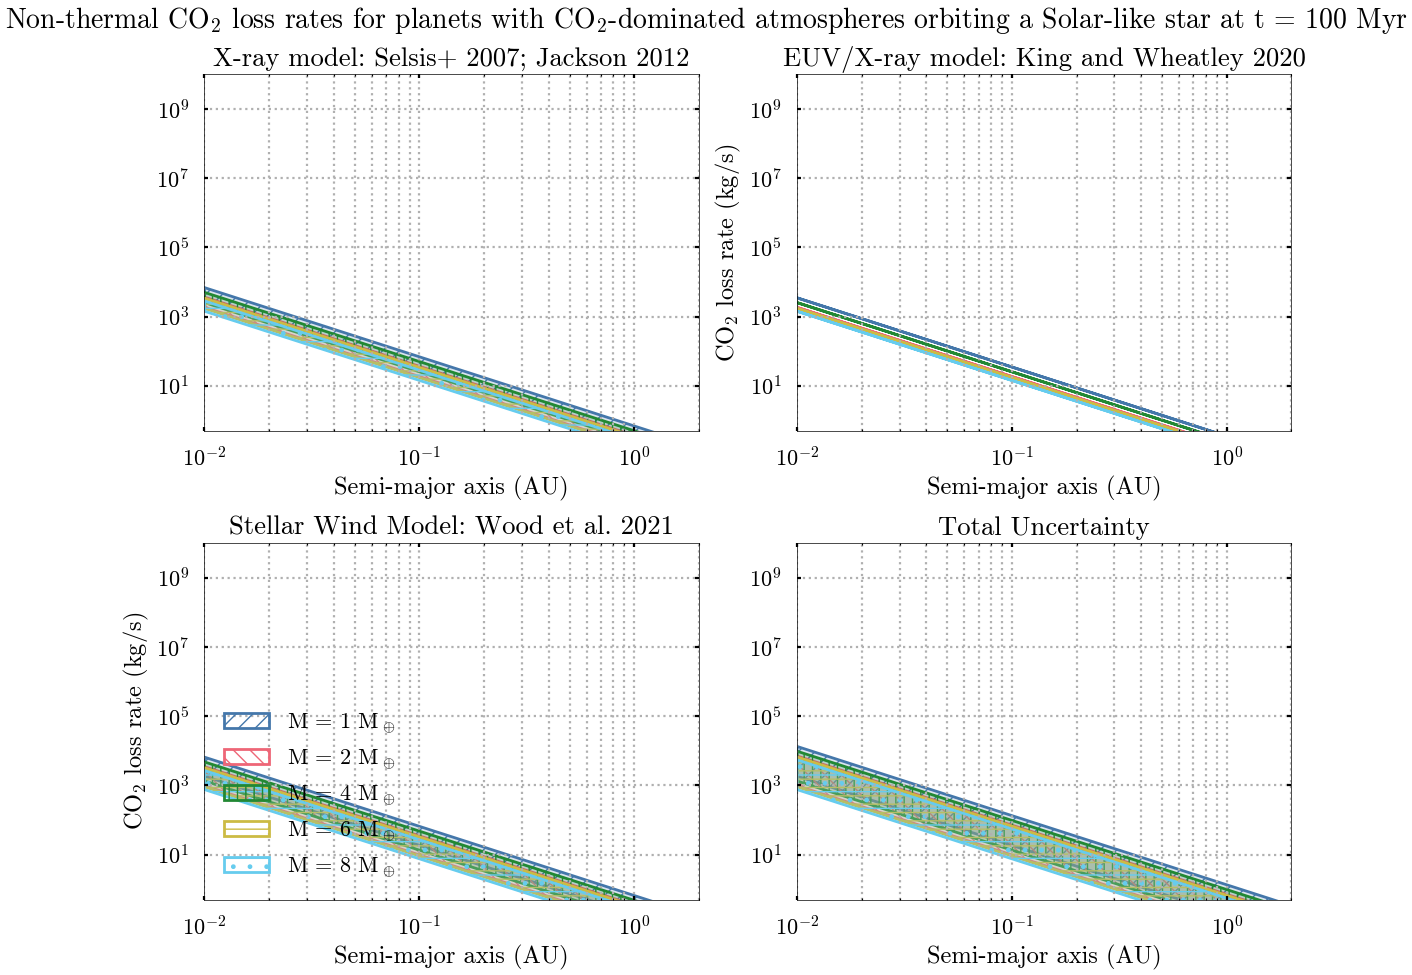

In [9]:
# Verify the atmospheric loss model

# Initialize CosmicShoreline instance
cs = CosmicShoreline()


stellar_masses = [0.1, 0.3, 1.0]
planet_masses = [1,2,4,6,8]  # Earth mass and pl_masse = 6
semi_major_axes = np.logspace(-2,0.5,100)



# Plot the results
fig, axes = plt.subplots(2,2,figsize=(12,10))

htaches = ['//','\\\\','||','--','-.']

CO2_nonthermal_upper = np.zeros((len(planet_masses),len(semi_major_axes)))
CO2_nonthermal_lower = np.zeros((len(planet_masses),len(semi_major_axes)))

for n, pl_masse in enumerate(planet_masses):
    L_XUV_S, L_X_S, L_EUV1_S, L_EUV2_S, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output='multi-band')
    L_XUV_J, L_X_J, L_EUV1_J, L_EUV2_J, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output='multi-band')


    CO2_loss_rates_upper_Xray = np.zeros(len(semi_major_axes))
    CO2_loss_rates_lower_Xray = np.zeros(len(semi_major_axes))

    for n2,pl_orbsmax in enumerate(semi_major_axes):
        # Calculate the total carbon loss for each planet mass and stellar
        F_xuv_to_earth_S = (cs._calculate_F_xuv_to_earth(L_XUV_S,pl_orbsmax))
        F_x_S = cs._calculate_F_xuv_to_earth(L_X_S,pl_orbsmax)*0.00464
        

        F_xuv_to_earth_J = (cs._calculate_F_xuv_to_earth(L_XUV_J,pl_orbsmax))
        F_x_J = cs._calculate_F_xuv_to_earth(L_X_J,pl_orbsmax)*0.00464

        CO2_S = cs.M_C_dot_non_thermal(L_X_S, Rs_S, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77)
        CO2_J = cs.M_C_dot_non_thermal(L_X_J, Rs_J, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77)

        CO2_loss_rates_upper_Xray[n2] = np.maximum(CO2_S, CO2_J)
        CO2_loss_rates_lower_Xray[n2] = np.minimum(CO2_S, CO2_J)
    
    axes[0,0].fill_between(semi_major_axes, CO2_loss_rates_lower_Xray, CO2_loss_rates_upper_Xray,
                            alpha=0.2,facecolor='C%d'%n)
    axes[0,0].fill_between(semi_major_axes, CO2_loss_rates_lower_Xray, CO2_loss_rates_upper_Xray,
                            facecolor='none', edgecolor='C%d'%n, lw=2,hatch=htaches[n],label='M = %d M$_\oplus$'%pl_masse)
    
    L_xuv_K20_1, L_x_K20_1, L_euv1_K20_1, L_euv2_K20_1, Rs = cs.calculate_L_XUV(1,1e8,output='multi-band',
                                                                            gamma1 = -0.35+0.07,gamma2=-0.76+0.16)
    L_xuv_K20_2, L_x_K20_2, L_euv1_K20_2, L_euv2_K20_2, Rs = cs.calculate_L_XUV(1,1e8,output='multi-band',
                                                                            gamma1 = -0.35-0.15,gamma2=-0.76-0.04)
    CO2_loss_rates_upper_EUV = np.zeros(len(semi_major_axes))
    CO2_loss_rates_lower_EUV = np.zeros(len(semi_major_axes))

    for n2,pl_orbsmax in enumerate(semi_major_axes):
        # Calculate the total carbon loss for each planet mass and stellar
        F_xuv_to_earth_1 = (cs._calculate_F_xuv_to_earth(L_xuv_K20_1,pl_orbsmax))
        F_x_1 = cs._calculate_F_xuv_to_earth(L_x_K20_1,pl_orbsmax)*0.00464

        F_xuv_to_earth_2 = (cs._calculate_F_xuv_to_earth(L_xuv_K20_2,pl_orbsmax))
        F_x_2 = cs._calculate_F_xuv_to_earth(L_x_K20_2,pl_orbsmax)*0.00464

        CO2_1 = cs.M_C_dot_non_thermal(L_x_K20_1, Rs, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77)
        CO2_2 = cs.M_C_dot_non_thermal(L_x_K20_2, Rs, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77)

        CO2_loss_rates_upper_EUV[n2] = np.maximum(CO2_1, CO2_2)
        CO2_loss_rates_lower_EUV[n2] = np.minimum(CO2_1, CO2_2)
    
    axes[0,1].fill_between(semi_major_axes, CO2_loss_rates_lower_EUV, CO2_loss_rates_upper_EUV,
                            alpha=0.2,facecolor='C%d'%n)
    axes[0,1].fill_between(semi_major_axes, CO2_loss_rates_lower_EUV, CO2_loss_rates_upper_EUV,
                            facecolor='none', edgecolor='C%d'%n, lw=2,hatch=htaches[n],label='M = %d M$_\oplus$'%pl_masse)
    
    CO2_M_dot_non_thermal_upper = np.zeros(len(semi_major_axes))
    CO2_M_dot_non_thermal_lower = np.zeros(len(semi_major_axes))

    L_XUV, L_X, L_EUV1, L_EUV2, Rs = cs.calculate_L_XUV(1, 1e8, method='Jackson', output='multi-band')
    for n2,pl_orbsmax in enumerate(semi_major_axes):
        # Calculate the total carbon loss for each planet mass and stellar
        F_xuv_to_earth = (cs._calculate_F_xuv_to_earth(L_XUV,pl_orbsmax))
        F_x = cs._calculate_F_xuv_to_earth(L_X,pl_orbsmax)*0.00464

        CO2_M_dot_m = cs.M_C_dot_non_thermal(L_X, Rs, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77-0.04)
        CO2_M_dot_p = cs.M_C_dot_non_thermal(L_X, Rs, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77+0.04)

        CO2_M_dot_non_thermal_upper[n2] = np.maximum(CO2_M_dot_m, CO2_M_dot_p)
        CO2_M_dot_non_thermal_lower[n2] = np.minimum(CO2_M_dot_m, CO2_M_dot_p)

    axes[1,0].fill_between(semi_major_axes, CO2_M_dot_non_thermal_lower, CO2_M_dot_non_thermal_upper,
                            alpha=0.2,facecolor='C%d'%n)
    axes[1,0].fill_between(semi_major_axes, CO2_M_dot_non_thermal_lower, CO2_M_dot_non_thermal_upper,
                            facecolor='none', edgecolor='C%d'%n, lw=2,hatch=htaches[n],label='M = %d M$_\oplus$'%pl_masse)
    
    CO2_M_dot_non_thermal_upper = np.zeros(len(semi_major_axes))
    CO2_M_dot_non_thermal_lower = np.zeros(len(semi_major_axes))

    L_XUV_S_1, L_X_S_1, L_EUV1_S_1, L_EUV2_S_1, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output='multi-band',
                                                                            gamma1 = -0.35+0.07,gamma2=-0.76+0.16)
    L_XUV_S_2, L_X_S_2, L_EUV1_S_2, L_EUV2_S_2, Rs_S = cs.calculate_L_XUV(1, 1e8, method='Selsis', output='multi-band',
                                                                            gamma1 = -0.35-0.15,gamma2=-0.76-0.04)
    L_XUV_J_1, L_X_J_1, L_EUV1_J_1, L_EUV2_J_1, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output='multi-band',
                                                                            gamma1 = -0.35+0.07,gamma2=-0.76+0.16)
    L_XUV_J_2, L_X_J_2, L_EUV1_J_2, L_EUV2_J_2, Rs_J = cs.calculate_L_XUV(1, 1e8, method='Jackson', output='multi-band',
                                                                            gamma1 = -0.35-0.15,gamma2=-0.76-0.04)
    
    for n2,pl_orbsmax in enumerate(semi_major_axes):
        CO2_M_dot_m_S_1 = cs.M_C_dot_non_thermal(L_X_S_1, Rs_S, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77-0.04)
        CO2_M_dot_p_S_1 = cs.M_C_dot_non_thermal(L_X_S_1, Rs_S, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77+0.04)
        CO2_M_dot_m_S_2 = cs.M_C_dot_non_thermal(L_X_S_2, Rs_S, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77-0.04)
        CO2_M_dot_p_S_2 = cs.M_C_dot_non_thermal(L_X_S_2, Rs_S, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77+0.04)
        CO2_M_dot_m_J_1 = cs.M_C_dot_non_thermal(L_X_J_1, Rs_J, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77-0.04)
        CO2_M_dot_p_J_1 = cs.M_C_dot_non_thermal(L_X_J_1, Rs_J, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77+0.04)
        CO2_M_dot_m_J_2 = cs.M_C_dot_non_thermal(L_X_J_2, Rs_J, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77-0.04)
        CO2_M_dot_p_J_2 = cs.M_C_dot_non_thermal(L_X_J_2, Rs_J, cs.M_R_interpolator_Earth_xM(pl_masse), pl_orbsmax, 0.77+0.04)

        CO2_arr = [CO2_M_dot_m_S_1,CO2_M_dot_p_S_1,CO2_M_dot_m_S_2,CO2_M_dot_p_S_2,
                     CO2_M_dot_m_J_1,CO2_M_dot_p_J_1,CO2_M_dot_m_J_2,CO2_M_dot_p_J_2]
        
        CO2_M_dot_non_thermal_upper[n2] = np.max(CO2_arr)
        CO2_M_dot_non_thermal_lower[n2] = np.min(CO2_arr)

    axes[1,1].fill_between(semi_major_axes, CO2_M_dot_non_thermal_lower, CO2_M_dot_non_thermal_upper,
                            alpha=0.2,facecolor='C%d'%n)
    axes[1,1].fill_between(semi_major_axes, CO2_M_dot_non_thermal_lower, CO2_M_dot_non_thermal_upper,
                            facecolor='none', edgecolor='C%d'%n, lw=2,hatch=htaches[n],label='M = %d M$_\oplus$'%pl_masse)
    
    CO2_nonthermal_upper[n] = CO2_M_dot_non_thermal_upper
    CO2_nonthermal_lower[n] = CO2_M_dot_non_thermal_lower



for ax in axes.flatten():
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlabel('Semi-major axis (AU)')
    ax.grid(True,which="both",ls=":")
    ax.set_xlim(1e-2,2)
    ax.set_ylim(5e-1,1e10)

axes[1,0].set_ylabel('CO$_2$ loss rate (kg/s)')
axes[1,0].set_title('Stellar Wind Model: Wood et al. 2021')
axes[1,0].legend(loc='lower left')

axes[0,0].set_title('X-ray model: Selsis+ 2007; Jackson 2012')

axes[0,1].set_ylabel('CO$_2$ loss rate (kg/s)')
axes[0,1].set_title('EUV/X-ray model: King and Wheatley 2020')

axes[1,1].set_title('Total Uncertainty')

fig.suptitle('Non-thermal CO$_2$ loss rates for planets with CO$_2$-dominated atmospheres orbiting a Solar-like star at t = 100 Myr', fontsize=20)
fig.savefig('./figures/atmospheric_loss_rates_unc_CO2_nonthermal.pdf',bbox_inches='tight')

plt.tight_layout()


# 2. Cosmic shoreline given by Monte Carlo

In [21]:
from statsmodels.base.model import GenericLikelihoodModel

class ThreeParamLogit(GenericLikelihoodModel):
    """
    A custom three-parameter logistic regression model with p_max reparameterized:
    
        p(x) = logistic(theta) / (1 + exp(-(beta0 + beta1 * x)))
    
    Parameters:
        beta0 : intercept
        beta1 : slope
        theta : unconstrained parameter such that p_max = logistic(theta) is in (0, 1)
    """
    def nloglikeobs(self, params):
        # Extract parameters: beta0, beta1 and theta
        beta = params[:2]
        theta = params[2]
        
        # Constrain p_max to (0, 1) using the logistic function
        p_max = 1 / (1 + np.exp(-theta))
        # p_max = theta
        
        # Linear predictor (assumes a constant is included in exog)
        eta = np.dot(self.exog, beta)
        
        # Predicted probability with the extra parameter p_max
        pi = p_max / (1 + np.exp(-eta))
        
        # Avoid log(0) by clipping probabilities
        eps = 1e-9
        pi = np.clip(pi, eps, 1 - eps)
        
        # Compute the log-likelihood for each observation
        ll = self.endog * np.log(pi) + (1 - self.endog) * np.log(1 - pi)
        return -ll  # negative log-likelihood
    
    def fit(self, start_params=None, **kwds):
        if start_params is None:
            # Start with beta0=0, beta1=0, and theta=0 (implying p_max = logistic(0) = 0.5)
            start_params = np.array([0, 0, 0])
        return super(ThreeParamLogit, self).fit(start_params=start_params, **kwds)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


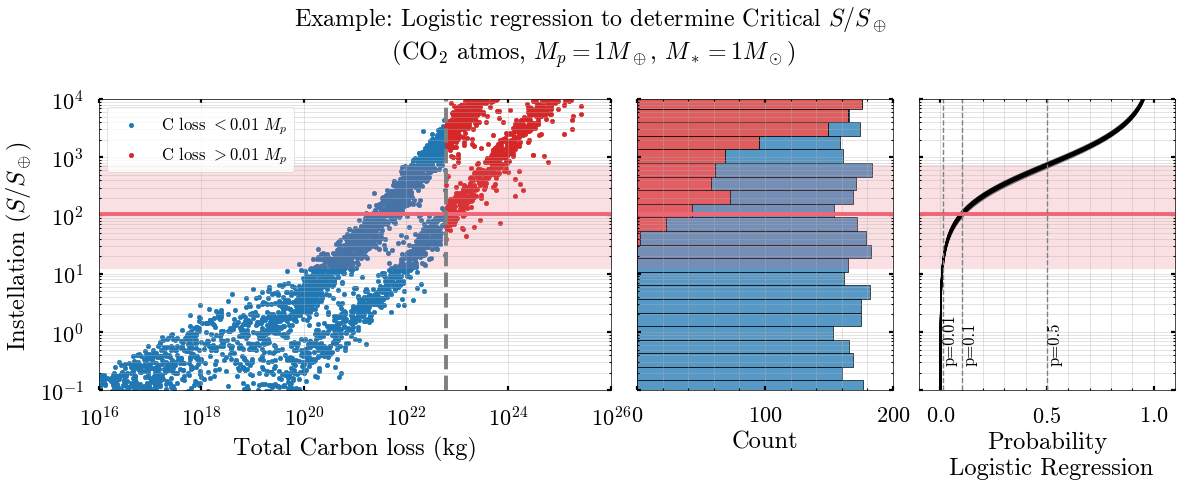

In [ ]:
df_CO2_1Ms = pd.read_csv('./data-montecarlo/df_st_mass_1.0_MMW_44.csv')

fig,axes = plt.subplots(1,3,figsize=(12,5),width_ratios=[2,1,1],sharey=True)

N_rep = 50
pl_masse = 1
earth_mass = 5.972e24
m0_atm = 1e-2*pl_masse*earth_mass

d_c_logit_001 = np.zeros(N_rep)
d_c_logit_01 = np.zeros(N_rep)
d_c_logit_05 = np.zeros(N_rep)

for n_sam in range(N_rep):
    pvalues = np.nan
    while np.isnan(pvalues) or pvalues>0.5:
        df = df_CO2_1Ms.sample(5000, replace=False)
        df['log_pl_insol'] = np.log10(df['pl_insol'])
        if np.max(df['C_loss'])<m0_atm:
            d_c_logit_001[n_sam] = 5
            d_c_logit_01[n_sam] = 5
            d_c_logit_05[n_sam] = 5
            pvalues = 0
        elif np.min(df['C_loss'])>m0_atm:
            d_c_logit_001[n_sam] = -2
            d_c_logit_01[n_sam] = -2
            d_c_logit_05[n_sam] = -2
            pvalues = 0
        else:
            Y = (df['C_loss']>m0_atm).astype(int)
            X = sm.add_constant(df['log_pl_insol'])  # adds an 'intercept' column

            logit_model = sm.Logit(Y, X)
            logit_result = logit_model.fit(disp=False)
            pvalues = logit_result.pvalues['log_pl_insol']

            alpha_hat = logit_result.params['const']
            beta_hat = logit_result.params['log_pl_insol']
            p_max =1

            p0_001 = 0.01
            logit_p0_001 = np.log(p0_001 / (p_max - p0_001))
            d_c_logit_001[n_sam] = (logit_p0_001 - alpha_hat) / beta_hat

            p0_01 = 0.1
            logit_p0_01 = np.log(p0_01 / (p_max - p0_01))
            d_c_logit_01[n_sam] = (logit_p0_01 - alpha_hat) / beta_hat

            p0_05 = 0.5
            logit_p0_05 = np.log(p0_05 / (p_max - p0_05))
            d_c_logit_05[n_sam] = (logit_p0_05 - alpha_hat) / beta_hat
    xx = np.linspace(-2, 5, 100)
    yy = p_max / (1 + np.exp(-(alpha_hat + beta_hat * xx)))
    axes[2].plot(yy,10**xx, color='k', lw=1, alpha=0.5)
    axes[2].set_yscale('log')


axes[0].scatter(df['C_loss'][df['C_loss']<m0_atm],df['pl_insol'][df['C_loss']<m0_atm],s=10,c='tab:blue')
axes[0].scatter(df['C_loss'][df['C_loss']>m0_atm],df['pl_insol'][df['C_loss']>m0_atm],s=10,c='tab:red')

axes[0].axhline(10**d_c_logit_01.mean(), color='C1')
axes[0].fill_between([1e14,1e28],10**d_c_logit_001.mean(),
                        10**d_c_logit_05.mean(),alpha=0.2,color='C1')
axes[0].set_xscale('log')
axes[0].set_yscale('log')


axes[0].legend(['C loss $< 0.01~M_p$','C loss $> 0.01~M_p$'],
               loc='upper left', frameon=True,fontsize=12)
axes[0].set_xlim(1e16,1e26)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Total Carbon loss (kg)')
axes[0].set_ylabel('Instellation ($S/S_\oplus$)')

df['hue'] = (df['C_loss']>m0_atm).astype(int)
sns.histplot( data = df, y='pl_insol',log_scale=True, ax = axes[1],  
             multiple="stack",hue='hue',palette=['tab:blue','tab:red'],bins=30)
axes[1].legend()
axes[1].axhline(10**d_c_logit_01.mean(), color='C1')
axes[1].fill_between([0,200],10**d_c_logit_001.mean(),
                        10**d_c_logit_05.mean(),alpha=0.2,color='C1')
axes[1].set_xlim(0,200)

axes[2].axhline(10**d_c_logit_01.mean(), color='C1')
axes[2].fill_between([-0.1,1.1],10**d_c_logit_001.mean(),
                        10**d_c_logit_05.mean(),alpha=0.2,color='C1')
axes[2].set_xlim(-0.1,1.1)
axes[2].set_xlabel('Probability\n Logistic Regression')
fig.suptitle('Example: Logistic regression to determine Critical $S/S_\oplus$\n (CO$_2$ atmos, $M_p = 1M_\oplus$, $M_* = 1 M_\odot$)'
             , fontsize='xx-large')

axes[0].set_ylim(1e-1,1e4)
axes[0].axvline(m0_atm, color='gray', ls='--')
axes[2].axvline(0.01, color='gray', ls='--',lw=1)
axes[2].axvline(0.5, color='gray', ls='--',lw=1)
axes[2].axvline(0.1, color='gray', ls='--',lw=1)
axes[2].text(0.01,3e-1,'p=0.01',fontsize=12,rotation=90)
axes[2].text(0.5,3e-1,'p=0.5',fontsize=12,rotation=90)
axes[2].text(0.1,3e-1,'p=0.1',fontsize=12,rotation=90)
for ax in axes:
    ax.minorticks_on()
    ax.grid(True,which="both",ls="-",lw=0.5,alpha=0.5)



plt.tight_layout(w_pad=0)

fig.savefig('./figures/logistic_regression_example_CO2_1Ms_1Me.pdf',bbox_inches='tight')




/home/xuanji/ipykernel_2988272/113000724.py:27: RuntimeWarning: overflow encountered in exp
  pi = p_max / (1 + np.exp(-eta))
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2746: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")
/home/xuanji/ipykernel_2988272/113000724.py:27: RuntimeWarning: overflow encountered in exp
  pi = p_max / (1 + np.exp(-eta))
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/

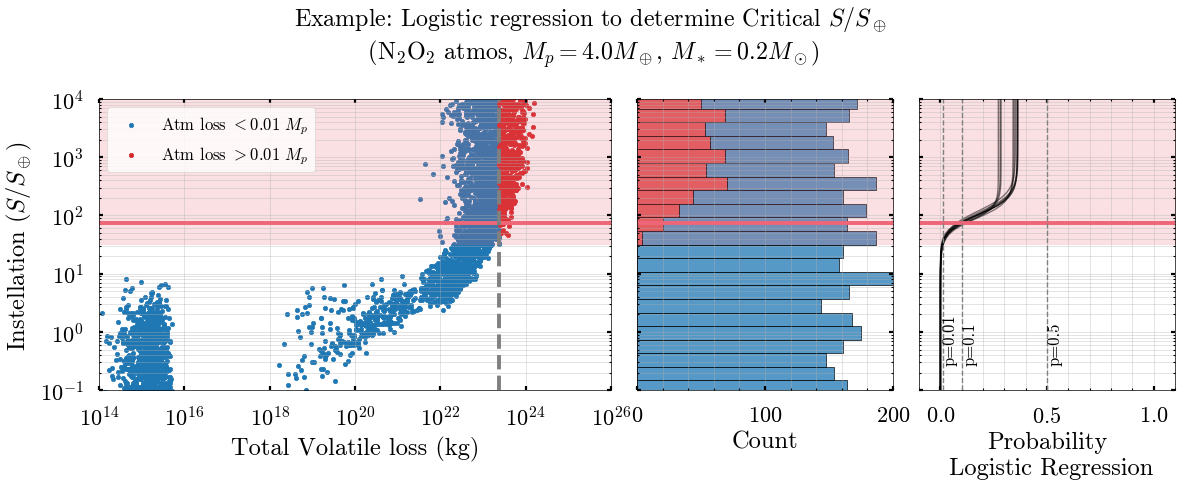

In [22]:
st_mass = 0.2
pl_masse = 4

df_CO2_1Ms = pd.read_csv('./data-montecarlo/df_pl_mass_%.1f_st_mass_%.2f_MMW_%d_CR24.csv'%(pl_masse, st_mass, 28))

fig,axes = plt.subplots(1,3,figsize=(12,5),width_ratios=[2,1,1],sharey=True)

N_rep = 10
earth_mass = 5.972e24
m0_atm = 1e-2*pl_masse*earth_mass

d_c_logit_001 = np.zeros(N_rep)
d_c_logit_01 = np.zeros(N_rep)
d_c_logit_05 = np.zeros(N_rep)

for n_sam in range(N_rep):
    pvalues = np.nan
    while np.isnan(pvalues) or pvalues>0.1:
        # print(n_sam)
        df = df_CO2_1Ms.sample(5000, replace=False)
        df['log_pl_insol'] = np.log10(df['pl_insol'])
        if np.max(df['C_loss'])<m0_atm:
            d_c_logit_001[n_sam] = 5
            d_c_logit_01[n_sam] = 5
            d_c_logit_05[n_sam] = 5
            pvalues = 0
        elif np.min(df['C_loss'])>m0_atm:
            d_c_logit_001[n_sam] = -2
            d_c_logit_01[n_sam] = -2
            d_c_logit_05[n_sam] = -2
            pvalues = 0
        else:
            Y = (df['C_loss']>m0_atm).astype(int)
            X = sm.add_constant(df['log_pl_insol'])  # adds an 'intercept' column

            logit_model = ThreeParamLogit(Y, X)
            logit_result = logit_model.fit(disp=False,maxiter=5000)  # disp=False to suppress output
            pvalues = logit_result.pvalues[1]

            alpha_hat = logit_result.params[0]
            beta_hat = logit_result.params[1]
            theta = logit_result.params[2]
            p_max = 1 / (1 + np.exp(-theta))  # p_max from the logistic function

            p0_001 = 0.01
            logit_p0_001 = np.log(p0_001 / (p_max - p0_001))
            d_c_logit_001[n_sam] = (logit_p0_001 - alpha_hat) / beta_hat

            p0_01 = 0.1
            logit_p0_01 = np.log(p0_01 / (p_max - p0_01))
            d_c_logit_01[n_sam] = (logit_p0_01 - alpha_hat) / beta_hat

            p0_05 = 0.5
            logit_p0_05 = np.log(p0_05 / (p_max - p0_05))
            d_c_logit_05[n_sam] = (logit_p0_05 - alpha_hat) / beta_hat
            if p_max < 0.5:
                d_c_logit_05[n_sam] = 5
    xx = np.linspace(-2, 5, 100)
    yy = p_max / (1 + np.exp(-(alpha_hat + beta_hat * xx)))
    axes[2].plot(yy,10**xx, color='k', lw=1, alpha=0.5)
    axes[2].set_yscale('log')

# axes[0].scatter(df['C_loss'],df['pl_insol'],s=10,c='tab:blue')
axes[0].scatter(df['C_loss'][df['C_loss']<m0_atm],df['pl_insol'][df['C_loss']<m0_atm],s=10,c='tab:blue')
axes[0].scatter(df['C_loss'][df['C_loss']>m0_atm],df['pl_insol'][df['C_loss']>m0_atm],s=10,c='tab:red')

axes[0].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[0].fill_between([1e14,1e28],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[0].axvline(m0_atm, color='gray', ls='--')


axes[0].set_xscale('log')
axes[0].set_yscale('log')


axes[0].legend(['Atm loss $< 0.01~M_p$','Atm loss $> 0.01~M_p$'],
               loc='upper left', frameon=True,fontsize=12)
axes[0].set_xlim(1e14,1e26)
axes[0].set_ylim(1e-1,1e4)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Total Volatile loss (kg)')
axes[0].set_ylabel('Instellation ($S/S_\oplus$)')

df['hue'] = (df['C_loss']>m0_atm).astype(int)
sns.histplot( data = df, y='pl_insol',log_scale=True, 
             ax = axes[1],  multiple="stack",hue='hue',palette=['tab:blue','tab:red'],bins=30)
axes[1].legend()
axes[1].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[1].fill_between([0,200],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[1].set_xlim(0,200)

axes[2].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[2].fill_between([-0.1,1.1],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[2].set_xlim(-0.1,1.1)
axes[2].grid(True,which="both",ls="-",lw=0.5,alpha=0.5)
axes[2].set_xlabel('Probability\n Logistic Regression')
fig.suptitle('Example: Logistic regression to determine Critical $S/S_\oplus$\n (N$_2$O$_2$ atmos, $M_p = %.1fM_\oplus$, $M_* = %.1f M_\odot$)'%(pl_masse,st_mass),
              fontsize='xx-large')



axes[2].axvline(0.01, color='gray', ls='--',lw=1)
axes[2].axvline(0.5, color='gray', ls='--',lw=1)
axes[2].axvline(0.1, color='gray', ls='--',lw=1)
axes[2].text(0.01,3e-1,'p=0.01',fontsize=12,rotation=90)
axes[2].text(0.5,3e-1,'p=0.5',fontsize=12,rotation=90)
axes[2].text(0.1,3e-1,'p=0.1',fontsize=12,rotation=90)
for ax in axes:
    ax.minorticks_on()
    ax.grid(True,which="both",ls="-",lw=0.5,alpha=0.5)


plt.tight_layout(w_pad=0)

fig.savefig('./figures/logistic_regression_example_N2O2_02Ms_4Me.pdf',bbox_inches='tight')


/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2746: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2746: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")
/software/python-anaconda-2023.09-el8-x86_64/lib/python3.11/site-packages/statsmodels/base/model.py:2742: UserWarning: df_mo

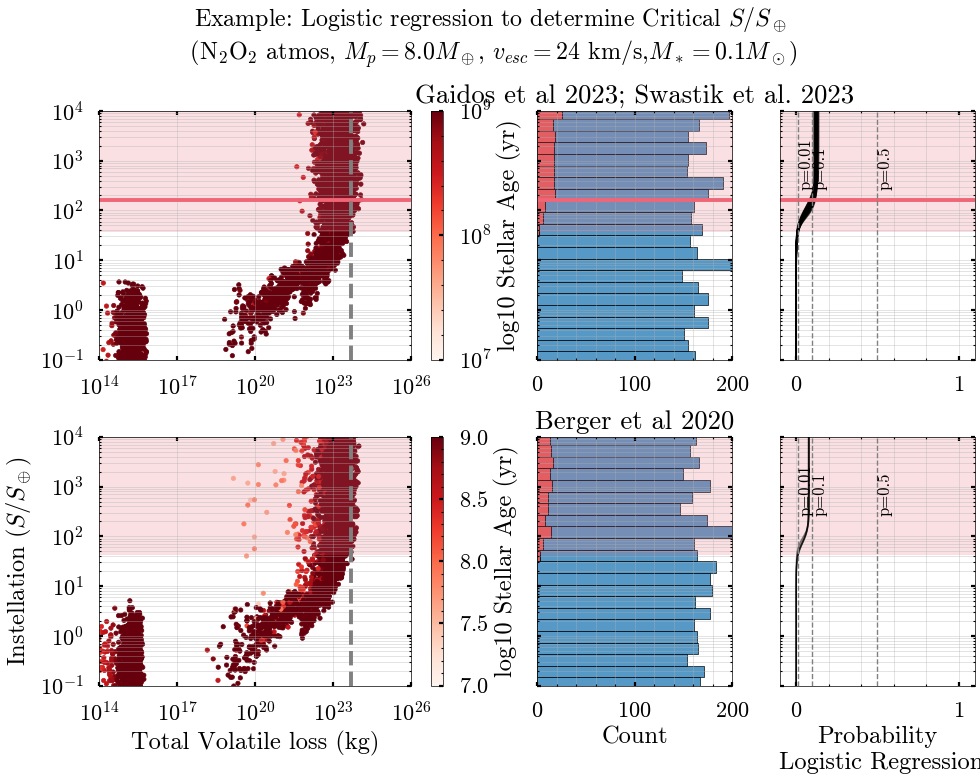

In [35]:
st_mass = 0.1
pl_masse = 8

df_CO2_1Ms = pd.read_csv('./data-montecarlo/df_pl_mass_%.1f_st_mass_%.2f_MMW_%d_CR24.csv'%(pl_masse, st_mass, 28))
df_2 = pd.read_csv('./data-montecarlo/df_pl_mass_%.1f_st_mass_%.2f_MMW_%d_CR24_2age_dists.csv'%(pl_masse, st_mass, 28))

fig,axes = plt.subplots(2,3,figsize=(10,8),width_ratios=[2,1,1],sharey=True)


N_rep = 50
earth_mass = 5.972e24
m0_atm = 1e-2*pl_masse*earth_mass

d_c_logit_001 = np.zeros(N_rep)
d_c_logit_01 = np.zeros(N_rep)
d_c_logit_05 = np.zeros(N_rep)

for n_sam in range(N_rep):
    pvalues = np.nan
    while np.isnan(pvalues) or pvalues>0.1:
        df = df_CO2_1Ms.sample(5000, replace=False)
        df['log_pl_insol'] = np.log10(df['pl_insol'])
        if np.max(df['C_loss'])<m0_atm:
            d_c_logit_001[n_sam] = 5
            d_c_logit_01[n_sam] = 5
            d_c_logit_05[n_sam] = 5
            pvalues = 0
        elif np.min(df['C_loss'])>m0_atm:
            d_c_logit_001[n_sam] = -2
            d_c_logit_01[n_sam] = -2
            d_c_logit_05[n_sam] = -2
            pvalues = 0
        else:
            Y = (df['C_loss']>m0_atm).astype(int)
            X = sm.add_constant(df['log_pl_insol'])  # adds an 'intercept' column

            logit_model = ThreeParamLogit(Y, X)
            logit_result = logit_model.fit(disp=False,maxiter=5000)  # disp=False to suppress output
            pvalues = logit_result.pvalues[1]

        alpha_hat = logit_result.params[0]
        beta_hat = logit_result.params[1]
        theta = logit_result.params[2]
        p_max = 1 / (1 + np.exp(-theta))  # p_max from the logistic function

    xx = np.linspace(-2, 5, 100)
    yy = p_max / (1 + np.exp(-(alpha_hat + beta_hat * xx)))
    axes[0,2].plot(yy,10**xx, color='k', lw=1, alpha=0.5)
    axes[0,2].set_yscale('log')

    p0_001 = 0.01
    logit_p0_001 = np.log(p0_001 / (p_max - p0_001))
    d_c_logit_001[n_sam] = (logit_p0_001 - alpha_hat) / beta_hat

    p0_01 = 0.1
    logit_p0_01 = np.log(p0_01 / (p_max - p0_01))
    d_c_logit_01[n_sam] = (logit_p0_01 - alpha_hat) / beta_hat
    if p_max < 0.1:
        d_c_logit_01[n_sam] = 5


    p0_05 = 0.5
    logit_p0_05 = np.log(p0_05 / (p_max - p0_05))
    d_c_logit_05[n_sam] = (logit_p0_05 - alpha_hat) / beta_hat
    if p_max < 0.5:
        d_c_logit_05[n_sam] = 5


# axes[0].scatter(df['C_loss'][df['C_loss']<m0_atm],df['pl_insol'][df['C_loss']<m0_atm],s=10,c='tab:blue')
# axes[0].scatter(df['C_loss'][df['C_loss']>m0_atm],df['pl_insol'][df['C_loss']>m0_atm],s=10,c='tab:red')
ax = axes[0,0].scatter(df['C_loss'],df['pl_insol'],s=10,c=np.log10(df['st_age']),cmap='Reds',vmin=7,vmax=9)
cbar = plt.colorbar(ax, label='log10 Stellar Age (yr)',ax=axes[0,0])
cbar.set_ticks([7,8,9])
cbar.set_ticklabels(['10$^7$','10$^8$','10$^9$'])


axes[0,0].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[0,0].fill_between([1e14,1e28],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')

axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')


# axes[0,0].legend(['Atm loss $< 0.01~M_p$','Atm loss $> 0.01~M_p$'],
            #    loc='upper left', frameon=True,fontsize=12)
axes[0,0].set_xlim(1e14,1e26)
axes[0,0].set_xscale('log')
axes[0,0].set_yscale('log')
# axes[0,0].set_xlabel('Total Volatile loss (kg)')
# axes[0,0].set_ylabel('Instellation ($S/S_\oplus$)')

df['hue'] = (df['C_loss']>m0_atm).astype(int)
sns.histplot( data = df, y='pl_insol',log_scale=True, ax = axes[0,1],  
             multiple="stack",hue='hue',palette=['tab:blue','tab:red'],bins=30)
axes[0,1].set_xlabel('')
axes[0,1].legend()
axes[0,1].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[0,1].fill_between([0,200],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[0,1].set_xlim(0,200)

axes[0,2].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[0,2].fill_between([-0.1,1.1],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[0,2].set_xlim(-0.1,1.1)
axes[0,2].grid(True,which="both",ls="-",lw=0.5,alpha=0.5)
# axes[0,2].set_xlabel('Probability\n Logistic Regression')

pl_rade = cs.M_R_fit(pl_masse,x_M_or_R='M')
m_earth = 5.972e24
r_earth = 6.371e6
G=6.67430e-11
pl_v_esc = np.sqrt(2*G*pl_masse*m_earth/(pl_rade*r_earth))/1e3
fig.suptitle('Example: Logistic regression to determine Critical $S/S_\oplus$\n (N$_2$O$_2$ atmos, $M_p = %.1fM_\oplus$, $v_{esc}=%d$ km/s,$M_* = %.1f M_\odot$)'%(pl_masse,pl_v_esc,st_mass),
              fontsize='xx-large')

axes[0,0].set_ylim(1e-1,1e4)
axes[0,0].axvline(m0_atm, color='gray', ls='--')
axes[0,2].axvline(0.01, color='gray', ls='--',lw=1)
axes[0,2].axvline(0.5, color='gray', ls='--',lw=1)
axes[0,2].axvline(0.1, color='gray', ls='--',lw=1)
axes[0,2].text(0.01,3e2,'p=0.01',fontsize=12,rotation=90)
axes[0,2].text(0.5,3e2,'p=0.5',fontsize=12,rotation=90)
axes[0,2].text(0.1,3e2,'p=0.1',fontsize=12,rotation=90)




N_rep = 5
earth_mass = 5.972e24
m0_atm = 1e-2*pl_masse*earth_mass

d_c_logit_001 = np.zeros(N_rep)
d_c_logit_01 = np.zeros(N_rep)
d_c_logit_05 = np.zeros(N_rep)

for n_sam in range(N_rep):
    pvalues = np.nan
    while np.isnan(pvalues) or pvalues>0.1:
        df = df_2.sample(5000, replace=False)
        df['log_pl_insol'] = np.log10(df['pl_insol'])
        if np.max(df['C_loss'])<m0_atm:
            d_c_logit_001[n_sam] = 5
            d_c_logit_01[n_sam] = 5
            d_c_logit_05[n_sam] = 5
            pvalues = 0
        elif np.min(df['C_loss'])>m0_atm:
            d_c_logit_001[n_sam] = -2
            d_c_logit_01[n_sam] = -2
            d_c_logit_05[n_sam] = -2
            pvalues = 0
        else:
            Y = (df['C_loss']>m0_atm).astype(int)
            X = sm.add_constant(df['log_pl_insol'])  # adds an 'intercept' column

            logit_model = ThreeParamLogit(Y, X)
            logit_result = logit_model.fit(disp=False,maxiter=5000)  # disp=False to suppress output
            pvalues = logit_result.pvalues[1]

        alpha_hat = logit_result.params[0]
        beta_hat = logit_result.params[1]
        theta = logit_result.params[2]
        p_max = 1 / (1 + np.exp(-theta))  # p_max from the logistic function

    xx = np.linspace(-2, 5, 100)
    yy = p_max / (1 + np.exp(-(alpha_hat + beta_hat * xx)))
    axes[1,2].plot(yy,10**xx, color='k', lw=1, alpha=0.5)
    axes[1,2].set_yscale('log')

    p0_001 = 0.01
    logit_p0_001 = np.log(p0_001 / (p_max - p0_001))
    d_c_logit_001[n_sam] = (logit_p0_001 - alpha_hat) / beta_hat

    p0_01 = 0.1
    logit_p0_01 = np.log(p0_01 / (p_max - p0_01))
    d_c_logit_01[n_sam] = (logit_p0_01 - alpha_hat) / beta_hat
    if p_max < 0.1:
        d_c_logit_01[n_sam] = 5


    p0_05 = 0.5
    logit_p0_05 = np.log(p0_05 / (p_max - p0_05))
    d_c_logit_05[n_sam] = (logit_p0_05 - alpha_hat) / beta_hat
    if p_max < 0.5:
        d_c_logit_05[n_sam] = 5


# axes[0].scatter(df['C_loss'][df['C_loss']<m0_atm],df['pl_insol'][df['C_loss']<m0_atm],s=10,c='tab:blue')
# axes[0].scatter(df['C_loss'][df['C_loss']>m0_atm],df['pl_insol'][df['C_loss']>m0_atm],s=10,c='tab:red')
ax = axes[1,0].scatter(df['C_loss'],df['pl_insol'],s=10,c=np.log10(df['st_age']),cmap='Reds',vmin=7,vmax=9)
plt.colorbar(ax, label='log10 Stellar Age (yr)',ax=axes[1,0])
cbar.set_ticks([7,8,9])
cbar.set_ticklabels(['10$^7$','10$^8$','10$^9$'])

axes[1,0].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[1,0].fill_between([1e14,1e28],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')

axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')


# axes[1,0].legend(['Atm loss $< 0.01~M_p$','Atm loss $> 0.01~M_p$'],
            #    loc='upper left', frameon=True,fontsize=12)
axes[1,0].set_xlim(1e14,1e26)
axes[1,0].set_xscale('log')
axes[1,0].set_yscale('log')
axes[1,0].set_xlabel('Total Volatile loss (kg)')
axes[1,0].set_ylabel('Instellation ($S/S_\oplus$)')

df['hue'] = (df['C_loss']>m0_atm).astype(int)
sns.histplot( data = df, y='pl_insol',log_scale=True, ax = axes[1,1],  
             multiple="stack",hue='hue',palette=['tab:blue','tab:red'],bins=30)
axes[1,1].legend()
axes[1,1].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[1,1].fill_between([0,200],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[1,1].set_xlim(0,200)

axes[1,2].axhline(10**np.nanmean(d_c_logit_01), color='C1')
axes[1,2].fill_between([-0.1,1.1],10**np.nanmean(d_c_logit_001),
                        10**np.nanmean(d_c_logit_05),alpha=0.2,color='C1')
axes[1,2].set_xlim(-0.1,1.1)
axes[1,2].grid(True,which="both",ls="-",lw=0.5,alpha=0.5)
axes[1,2].set_xlabel('Probability\n Logistic Regression')

pl_rade = cs.M_R_fit(pl_masse,x_M_or_R='M')
m_earth = 5.972e24
r_earth = 6.371e6
G=6.67430e-11
pl_v_esc = np.sqrt(2*G*pl_masse*m_earth/(pl_rade*r_earth))/1e3
fig.suptitle('Example: Logistic regression to determine Critical $S/S_\oplus$\n (N$_2$O$_2$ atmos, $M_p = %.1fM_\oplus$, $v_{esc}=%d$ km/s,$M_* = %.1f M_\odot$)'%(pl_masse,pl_v_esc,st_mass),
              fontsize='xx-large')

axes[1,0].set_ylim(1e-1,1e4)
axes[1,0].axvline(m0_atm, color='gray', ls='--')
axes[1,2].axvline(0.01, color='gray', ls='--',lw=1)
axes[1,2].axvline(0.5, color='gray', ls='--',lw=1)
axes[1,2].axvline(0.1, color='gray', ls='--',lw=1)
axes[1,2].text(0.01,3e2,'p=0.01',fontsize=12,rotation=90)
axes[1,2].text(0.5,3e2,'p=0.5',fontsize=12,rotation=90)
axes[1,2].text(0.1,3e2,'p=0.1',fontsize=12,rotation=90)


axes[0,1].set_title('Gaidos et al 2023; Swastik et al. 2023')
axes[1,1].set_title('Berger et al 2020')

for ax in axes.flatten():
    ax.minorticks_on()
    ax.grid(True,which="both",ls="-",lw=0.5,alpha=0.5)


plt.tight_layout(w_pad=0)

fig.savefig('./figures/logistic_regression_example_N2O2_02Ms_1Me.pdf',bbox_inches='tight')


## 2.1 CosmicShoreline: Stellar Mass

In [ ]:
CS_insol_001 = np.load('./data-montecarlo/CS_insol_001_st_vesc.npy')
CS_insol_01 = np.load('./data-montecarlo/CS_insol_01_st_vesc.npy')
CS_insol_05 = np.load('./data-montecarlo/CS_insol_05_st_vesc.npy')

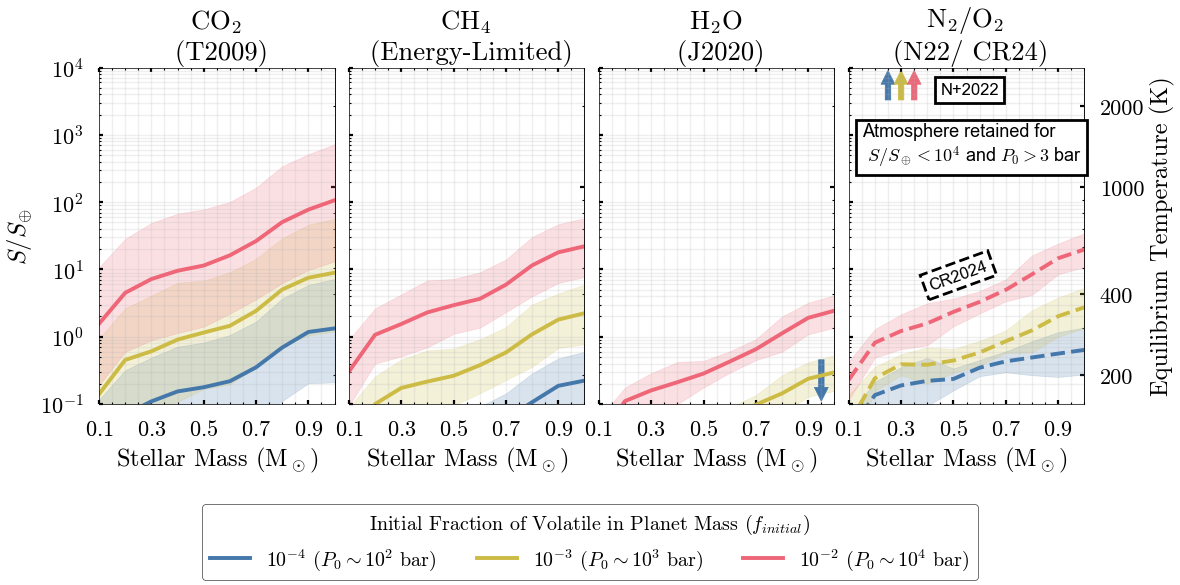

In [ ]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches



fig, axes = plt.subplots(1,4,figsize=(12,5),sharex=True,sharey=True)
axes_arr = axes  
MMWs = [44, 16, 18, 28, 28]
stellar_masses = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
colors = ['C0', 'C3', 'C1', 'gray']

earth_mass = 5.972e24
initial_atms = np.array([1e-4,1e-3,1e-2])*earth_mass


for n_atm,m0_atm in enumerate(initial_atms):
    for n_x, MMW in enumerate(MMWs):
        if MMW == 28:
            # if n_x != 4:
            #     if n_atm == 1:
            #         axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color='C%d'%(n_atm+3))
            #         axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
            #                                 color='C%d'%(n_atm+3),alpha=0.2)
            if n_x == 4:
                axes_arr[3].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm],ls='--')
                axes_arr[3].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)
            else:
                axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm])
                axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)
            
        else:
            axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm])
            axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)


# Conversion functions
def S_to_Teq(S):
    """Convert insolation S to equilibrium temperature T_eq."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (S * 1361 / 4 / sigma) ** 0.25

def Teq_to_S(Teq):
    """Convert equilibrium temperature T_eq back to insolation S."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (Teq**4 * sigma) / (1361/4)

for n_ax,ax in enumerate(axes_arr):
    ax.set_yscale('log')
    ax.set_xlabel('Stellar Mass (M$_\odot$)')
    ax.set_ylim(0.1,10000)
    ax.set_xlim(0.1,1)
    ax.set_xticks([0.1,0.3,0.5,0.7,0.9])
    ax.grid(True,which="both",ls="-",alpha=0.2,lw=1)
    ax.tick_params(axis='y',which='both', right=False)
    ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
    if n_ax<3:
        ax2.tick_params(axis='y',which='both',labelright=False)
    else:
        ax2.set_ylabel('Equilibrium Temperature (K)')
        ax2.set_yticks([200,400,1000,2000])
        ax2.set_yticklabels([200,400,1000,2000])
        # ax2.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        # ax2.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        # ax2.yaxis.
        



axes_arr[0].set_ylabel('$S/S_{\oplus}$')
handles = [Line2D([0], [0], color=colors[0], label='$10^{-4}$ ($P_0 \sim 10^2$ bar)'),
           Line2D([0], [0], color=colors[1], label='$10^{-3}$ ($P_0 \sim 10^3$ bar)'),
              Line2D([0], [0], color=colors[2], label='$10^{-2}$ ($P_0 \sim 10^4$ bar)')]

fig.legend(handles=handles, loc='upper center', 
           bbox_to_anchor=(0.5, -0.01), ncol=3, 
           title='Initial Fraction of Volatile in Planet Mass ($f_{initial}$)',frameon=True, 
           edgecolor='black', fontsize='x-large',title_fontsize='x-large')
# handles_WW = [Line2D([0], [0], color='gray', label=f'0.3')]

# axes_arr[2].legend(handles=handles_WW,title='Initial Fraction of H2O\n in Planet Mass',
#                    frameon=True, edgecolor='black', fontsize='x-large',title_fontsize='large')


arrow = mpatches.FancyArrowPatch((0.95, 0.5), (0.95, 0.1),
                                 mutation_scale=20,edgecolor=colors[0],facecolor=colors[0])
axes_arr[2].add_patch(arrow)

arrow = mpatches.FancyArrowPatch((0.25, 3000), (0.25, 1e4),
                                 mutation_scale=20,edgecolor=colors[0],facecolor=colors[0])
axes_arr[3].add_patch(arrow)
arrow = mpatches.FancyArrowPatch((0.3, 3000), (0.3, 1e4),
                                 mutation_scale=20,edgecolor=colors[1],facecolor=colors[1])
axes_arr[3].add_patch(arrow)
arrow = mpatches.FancyArrowPatch((0.35, 3000), (0.35, 1e4),
                                 mutation_scale=20,edgecolor=colors[2],facecolor=colors[2])
axes_arr[3].add_patch(arrow)
axes_arr[3].text(0.45,4000, 'N+2022', fontsize='large', font='arial',bbox=dict(facecolor='white', edgecolor='black', ls='-',lw=2))

axes_arr[3].text(0.15,400, 'Atmosphere retained for \n $S/S_\oplus<10^4$ and $P_0>3$ bar', 
                 fontsize=13, font='arial',zorder=10,bbox=dict(facecolor='white', edgecolor='black', ls='-',lw=2))

axes_arr[3].text(0.4,5, 'CR2024', fontsize='large', font='arial',bbox=dict(facecolor='white', edgecolor='black', ls='--',lw=2),rotation=20)

# fig.suptitle('Cosmic Shoreline for Earth-Mass Planets', fontsize='xx-large')
axes_arr[0].set_title('CO$_2$ \n (T2009)')
axes_arr[1].set_title('CH$_4$ \n (Energy-Limited)')
axes_arr[2].set_title('H$_2$O \n (J2020)')
axes_arr[3].set_title('N$_2$/O$_2$ \n (N22/ CR24)')




fig.tight_layout(w_pad=0)

fig.savefig('./figures/Cosmic_Shoreline_stmass.pdf',bbox_inches='tight')

In [ ]:
CS_insol_001 = np.load('./data-montecarlo/CS_insol_001_st_vesc_2age_dists.npy')
CS_insol_01 = np.load('./data-montecarlo/CS_insol_01_st_vesc_2age_dists.npy')
CS_insol_05 = np.load('./data-montecarlo/CS_insol_05_st_vesc_2age_dists.npy')

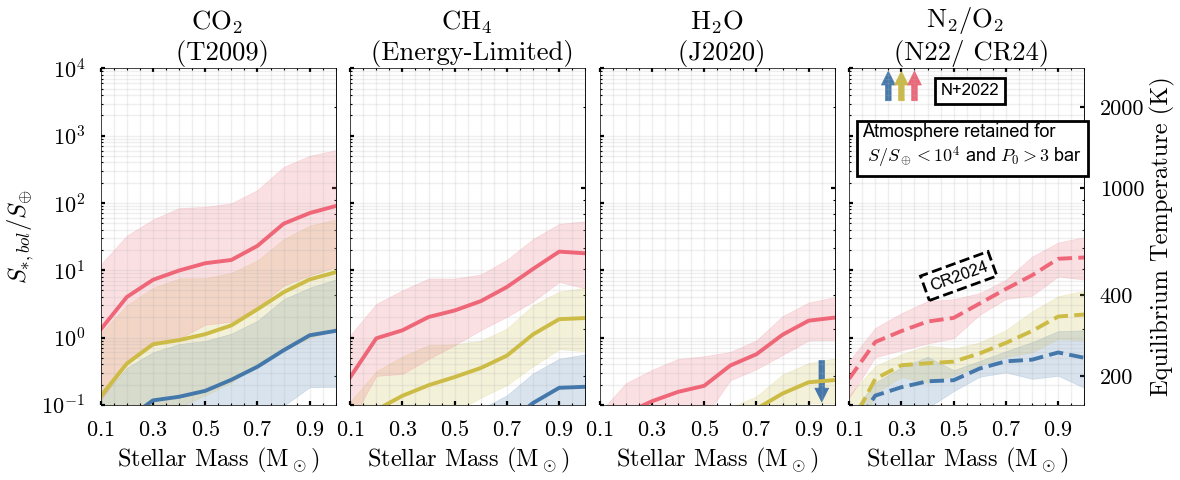

In [ ]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches



fig, axes = plt.subplots(1,4,figsize=(12,5),sharex=True,sharey=True)
axes_arr = axes  
MMWs = [44, 16, 18, 28, 28]
stellar_masses = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
colors = ['C0', 'C3', 'C1', 'gray']

earth_mass = 5.972e24
initial_atms = np.array([1e-4,1e-3,1e-2])*earth_mass


for n_atm,m0_atm in enumerate(initial_atms):
    for n_x, MMW in enumerate(MMWs):
        if MMW == 28:
            # if n_x != 4:
            #     if n_atm == 1:
            #         axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color='C%d'%(n_atm+3))
            #         axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
            #                                 color='C%d'%(n_atm+3),alpha=0.2)
            if n_x == 4:
                axes_arr[3].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm],ls='--')
                axes_arr[3].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)
            else:
                axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm])
                axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)
            
        else:
            axes_arr[n_x].plot(stellar_masses,CS_insol_01[n_x,:,n_atm],color=colors[n_atm])
            axes_arr[n_x].fill_between(stellar_masses,CS_insol_001[n_x,:,n_atm],CS_insol_05[n_x,:,n_atm],
                                    color=colors[n_atm],alpha=0.2)


# Conversion functions
def S_to_Teq(S):
    """Convert insolation S to equilibrium temperature T_eq."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (S * 1361 / 4 / sigma) ** 0.25

def Teq_to_S(Teq):
    """Convert equilibrium temperature T_eq back to insolation S."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (Teq**4 * sigma) / (1361/4)

for n_ax,ax in enumerate(axes_arr):
    ax.set_yscale('log')
    ax.set_xlabel('Stellar Mass (M$_\odot$)')
    ax.set_ylim(0.1,10000)
    ax.set_xlim(0.1,1)
    ax.set_xticks([0.1,0.3,0.5,0.7,0.9])
    ax.grid(True,which="both",ls="-",alpha=0.2,lw=1)
    ax.tick_params(axis='y',which='both', right=False)
    ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
    if n_ax<3:
        ax2.tick_params(axis='y',which='both',labelright=False)
    else:
        ax2.set_ylabel('Equilibrium Temperature (K)')
        ax2.set_yticks([200,400,1000,2000])
        ax2.set_yticklabels([200,400,1000,2000])
        # ax2.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        # ax2.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
        # ax2.yaxis.
        



axes_arr[0].set_ylabel('$S_{*,bol}/S_{\oplus}$')
handles = [Line2D([0], [0], color=colors[0], label='$10^{-4}$ ($P_0 \sim 10^2$ bar)'),
           Line2D([0], [0], color=colors[1], label='$10^{-3}$ ($P_0 \sim 10^3$ bar)'),
              Line2D([0], [0], color=colors[2], label='$10^{-2}$ ($P_0 \sim 10^4$ bar)')]

# fig.legend(handles=handles, loc='upper center', 
#            bbox_to_anchor=(0.5, -0.01), ncol=3, 
#            title='Initial Fraction of Volatile in Planet Mass ($f_{initial}$)',frameon=True, 
#            edgecolor='black', fontsize='x-large',title_fontsize='x-large')
# handles_WW = [Line2D([0], [0], color='gray', label=f'0.3')]

# axes_arr[2].legend(handles=handles_WW,title='Initial Fraction of H2O\n in Planet Mass',
#                    frameon=True, edgecolor='black', fontsize='x-large',title_fontsize='large')


arrow = mpatches.FancyArrowPatch((0.95, 0.5), (0.95, 0.1),
                                 mutation_scale=20,edgecolor=colors[0],facecolor=colors[0])
axes_arr[2].add_patch(arrow)

arrow = mpatches.FancyArrowPatch((0.25, 3000), (0.25, 1e4),
                                 mutation_scale=20,edgecolor=colors[0],facecolor=colors[0])
axes_arr[3].add_patch(arrow)
arrow = mpatches.FancyArrowPatch((0.3, 3000), (0.3, 1e4),
                                 mutation_scale=20,edgecolor=colors[1],facecolor=colors[1])
axes_arr[3].add_patch(arrow)
arrow = mpatches.FancyArrowPatch((0.35, 3000), (0.35, 1e4),
                                 mutation_scale=20,edgecolor=colors[2],facecolor=colors[2])
axes_arr[3].add_patch(arrow)
axes_arr[3].text(0.45,4000, 'N+2022', fontsize='large', font='arial',bbox=dict(facecolor='white', edgecolor='black', ls='-',lw=2))

axes_arr[3].text(0.15,400, 'Atmosphere retained for \n $S/S_\oplus<10^4$ and $P_0>3$ bar', 
                 fontsize=13, font='arial',zorder=10,bbox=dict(facecolor='white', edgecolor='black', ls='-',lw=2))

axes_arr[3].text(0.4,5, 'CR2024', fontsize='large', font='arial',bbox=dict(facecolor='white', edgecolor='black', ls='--',lw=2),rotation=20)

# fig.suptitle('Cosmic Shoreline for Earth-Mass Planets', fontsize='xx-large')
axes_arr[0].set_title('CO$_2$ \n (T2009)')
axes_arr[1].set_title('CH$_4$ \n (Energy-Limited)')
axes_arr[2].set_title('H$_2$O \n (J2020)')
axes_arr[3].set_title('N$_2$/O$_2$ \n (N22/ CR24)')




fig.tight_layout(w_pad=0)

fig.savefig('./figures/Cosmic_Shoreline_stmass_2age_dists.pdf',bbox_inches='tight')

## 2.2 Cosmic Shoreline: Planetary Mass

In [3]:
rmr = RMRelation()
mds = rmr.predict_mass(radius=(1.5))
mds

Mass distribution
size: 5000
is bimodal: True

Median: 3.81,
64% limits: [2.3 4.1],
95% limits: [1.4 4.6]

Distribution model:
  0.18 × T(m=1.87, σ=0.35, λ=3.97)
+ 0.82 × T(m=3.87, σ=0.23, λ=2.44)

In [4]:
cs.M_R_fit(2.2,x_M_or_R='M')**3/1.5**3


0.5712661833643908

In [5]:
df = pd.read_csv('./exoplanets_data/TSM/NASAExoArchive_2025-03-20_aggregate.csv',keep_default_na=True,low_memory=False)

# make the minimum mass from RV as the real mass
df['pl_masse']=df['pl_bmasse']
df['pl_masseerr2']=df['pl_bmasseerr2']
df['pl_masseerr1']=df['pl_bmasseerr1']


#  remove maximum mass
df['pl_masse'] = np.where(df['pl_bmasselim']==1, np.nan, df['pl_masse'])

# calculated the mass from radius assuming earth-like composition
masse_calc = cs.M_R_fit(df['pl_rade'].to_numpy(),x_M_or_R='R')
df['pl_masse_calc'] = np.where(df['pl_masse'].isna(),masse_calc,df['pl_masse'])
df['pl_g'] = 9.81*df['pl_masse']/(df['pl_rade'])**2
df['pl_rho_ratio'] = cs.M_R_fit(df['pl_masse'].to_numpy(),x_M_or_R='M')**3/df['pl_rade']**3


# remove planets above radius valley (Ho and Van Eylen 2024) (applied to 0.6-1.4 M_odot)
# Mask for planets with st_mass < 0.6: exclude those with pl_rade > 1.5 if pl_masse is NaN
mask_low_mass = (df['st_mass'] < 0.6) & (((df['pl_rade']<1.5) & df['pl_masse'].isna())| ((df['pl_rho_ratio']>0.6) & (df['pl_masse']<10)))

# Mask for rows with 0.6 <= st_mass < 1.4 that satisfy the filter condition
mask_middle = (
    (df['st_mass'] >= 0.6) & (df['st_mass'] < 1.4) &
    (np.log10(df['pl_rade']) < (-0.11 * np.log10(df['pl_orbper']) + 0.37))
)

# Combine the masks
mask = (mask_low_mass | mask_middle)

# Apply the combined mask to the DataFrame
df_rocks = df[mask]

# remove planets with mass < 0.5 M_earth

# calculate escape velocity
earth_mass = 5.972e24
G = 6.67430e-11
earth_radius = 6.371e6

df_rocks['pl_vesc'] = np.sqrt(2*G*earth_mass*df_rocks['pl_masse_calc']/(df_rocks['pl_rade']*earth_radius))/(1e3)


/home/xuanji/ipykernel_3898245/2179914354.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocks['pl_vesc'] = np.sqrt(2*G*earth_mass*df_rocks['pl_masse_calc']/(df_rocks['pl_rade']*earth_radius))/(1e3)


Text(0, 0.5, 'Planet Radius (R$_\\oplus$)')

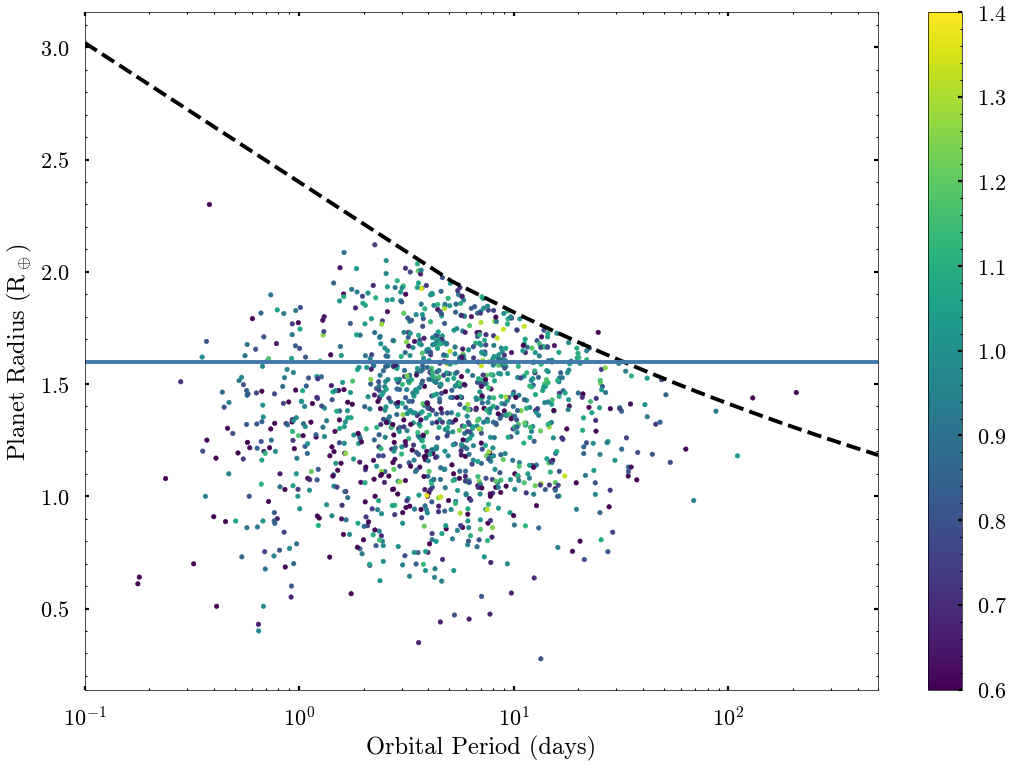

In [6]:
plt.scatter(df_rocks['pl_orbper'],df_rocks['pl_rade'],c=df_rocks['st_mass'],s=10,vmin=0.6,vmax=1.4)
orbper = np.linspace(0.1,500,100)
plt.plot(orbper,10**(-0.11*np.log10(orbper)+0.37),color='k',ls='--')
plt.axhline(1.6)
plt.xscale('log')
plt.xlim(0.1,500)
plt.colorbar()
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (R$_\oplus$)')

In [7]:
# Read the file
df_STSCI_table = pd.read_csv('./exoplanets_data/STSCI_Targets_v2', 
                 skiprows=1,  # Skip the header row
                 names=['Planet_Name', 'Radius', 'Mass', 'Period', 'K_mag', 'T_eff', 'a/R*', 'Rp/R*', 'Teq', 'Priority_Metric'])

df_STSCI_table['Planet_Name']

df_STSCI = df_rocks[df_rocks['pl_name'].isin(df_STSCI_table['Planet_Name'])]

In [8]:
# JWST_Transit_list = 

ds_JWST_transit_list = pd.read_csv('./exoplanets_data/trexolists.csv').Target
df_JWST_transit = df_rocks[df_rocks['hostname'].isin(ds_JWST_transit_list)]

ds_JWST_direct_list = pd.read_csv('./exoplanets_data/diexolists.csv').Target
df_JWST_direct = df_rocks[df_rocks['hostname'].isin(ds_JWST_direct_list)]


In [9]:
TESS_ESM_targets = [
    'TOI-4670.01', 'TOI-5205 b', 'HD189733 b', 'Kepler-1935 b', 'WASP-76 b', 'WASP-33 b', 'TOI-706.01',
    'TOI-5023.01', 'TOI-6137.01', 'HD209458 b', 'KELT-7 b', 'KELT-20 b', 'TOI-5311.01', 'TOI-6626.01',
    'TOI-6801.01', 'WASP-77A b', 'HAT-P-32 b', 'WASP-189 b', 'TOI-6508.01', 'TOI-519 b', 'TOI-507.01',
    'WASP-43 b', 'WASP-19 b', 'WASP-18 b', 'TOI-6601.01', 'TOI-1130 c', 'TOI-6055.01', 'K2-31 b',
    'KELT-4A b', 'WASP-121 b', 'TOI-2134 c', 'TOI-4860 b', 'HAT-P-20 b', 'HIP65A b', 'LTT9779 b',
    'TOI-6093.01', 'TOI-5579.01', 'TOI-2640.01', 'TOI-2341.01', 'TOI-1408 b', 'TOI-1254.01',
    'TOI-906.01', 'TOI-5575.01', 'TOI-5695.01', 'HAT-P-3 b', 'TOI-564 b', 'TOI-5019.01', 'TOI-5179.01',
    'K2-387 b', 'TOI-674 b', 'TOI-6110.01', 'HD149026 b', 'TOI-1954.01', 'TOI-5907.01', 'TOI-1104.01',
    'WASP-132 b', 'WASP-29 b', 'TOI-2641 b', 'TOI-6360.01', 'TOI-6010.01', 'TOI-4506.01', 'GJ436 b',
    'TOI-5800.01', 'Kepler-1979 b', 'TOI-851.01', 'TOI-1546.01', 'TOI-1231 b', 'AU Mic b', 'TOI-5938.01',
    'K2-266 b', 'TOI-849 b', 'TOI-5738.02', 'TOI-620 b', 'TOI-1130 b', 'Kepler-1907 c', 'TOI-332 b',
    'TOI-4632.01', 'AU Mic c', 'TOI-5486.01', 'TOI-1252.01', 'TOI-1293.01', 'TOI-2088.01', 'HD73583 b',
    'TOI-2768.01', 'TOI-824 b', 'TOI-5345.01', 'TOI-1468 c', 'Kepler-283 c', 'HD219134 b', 'Kepler-1862 b',
    '55 Cnc e', 'TOI-2260 b', 'TOI-4336A b', 'GJ1214 b', 'TOI-6940.01', 'Kepler-24 e', 'K2-370 b',
    'TOI-2324.01', 'TOI-5713.01', 'HD219134 c', 'pi Men c', 'TOI-5955.01', 'HD213885 b', 'TOI-539.01',
    'TOI-1452 b', 'TOI-277 b', 'TOI-2427 b', 'HR858 b', 'HD3167 b', 'TOI-6260.01', 'TOI-6002.01',
    'GJ3090 b', 'TOI-6717.01', 'TOI-1075 b', 'K2-100 b', 'HD80653 b', 'TRAPPIST-1 c', 'GJ486 b',
    'LHS3844 b', 'TOI-6255.01', 'Kepler-1984 b', 'TOI-561 b', 'Gliese 12 b', 'HD260655 b', 'GJ806 b',
    'GJ367 b', 'TOI-431 b', 'TOI-1444 b', 'TOI-6714.01', 'GJ1132 b', 'TOI-4552.01', 'TOI-1263.01',
    'K2-141 b', 'TOI-801.01', 'TRAPPIST-1 d', 'L98-59 c', 'TOI-6324.01', 'TOI-500 b', 'TOI-1807 b',
    'K2-183 b', 'LP890-9 c', 'LTT1445A c', 'GJ1252 b', 'TOI-864.01', 'TOI-1860 b', 'Kepler-1107 b'
]

df_ESM = df_rocks[df_rocks['pl_name'].isin(TESS_ESM_targets)]

In [10]:
TESS_TSM_targets = [
    'TOI-6508.01', 'WASP-107 b', 'HD189733 b', 'HD209458 b', 'HAT-P-67 b', 'WASP-33 b', 'TOI-4670.01',
    'TOI-5268.01', 'WASP-69 b', 'WASP-127 b', 'TOI-4597.01', 'KELT-20 b', 'TOI-6601.01', 'TOI-6368.01',
    'TOI-1420 b', 'WASP-193 b', 'WASP-76 b', 'WASP-121 b', 'TOI-5311.01', 'TOI-2455.01', 'WASP-39 b', 'KELT-11 b',
    'TOI-5806.01', 'WASP-189 b', 'TOI-1861.01', 'TOI-6626.01', 'TOI-7003.01', 'WASP-94A b', 'HAT-P-32 b',
    'WASP-178 b', 'TOI-2134 c', 'K2-141 c', 'HAT-P-26 b', 'WASP-166 b', 'LTT9779 b', 'TOI-906.01', 'TOI-5575.01',
    'TOI-3884 b', 'DSTucA b', 'HD149026 b', 'TOI-1254.01', 'TOI-5179.01', 'TOI-5579.01', 'TOI-6894.01',
    'TOI-1136 d', 'TOI-659.01', 'TOI-1954.01', 'TOI-6093.01', 'TOI-1104.01', 'GJ3470 b', 'TOI-1135 b',
    'TOI-1264.01', 'TOI-6360.01', 'TOI-2226.01', 'Kepler-16 b', 'TOI-674 b', 'HD332231 b', 'TOI-4425.01',
    'TOI-570.01', 'TOI-6010.01', 'TOI-4506.01', 'GJ436 b', 'TOI-5800.01', 'TOI-1252.01', 'TOI-851.01',
    'TOI-1546.01', 'TOI-1231 b', 'AU Mic b', 'HD191939 b', 'K2-266 b', 'TOI-5951.01', 'TOI-6985.01', 'AU Mic c',
    'TOI-5140.01', 'TOI-3350.01', 'TOI-1293.01', 'TOI-5724.01', 'HD136352 c', 'TOI-4537.01', 'TOI-824 b',
    'TOI-4340.01', 'TOI-4632.01', 'HD191939 d', 'HD73344 b', 'HD93963A c', 'TOI-2513.01', 'TOI-4336A b', 'GJ1214 b',
    'pi Men c', 'HR858 b', '55 Cnc e', 'TOI-6260.01', 'TOI-1468 c', 'L98-59 d', 'HD219134 b', 'HR858 c', 'HD3167 b', 'TOI-2260 b',
    'LHS1140 b', 'GJ3090 b', 'HD63433 b', 'TOI-5955.01', 'K2-370 b', 'TOI-2324.01', 'TOI-6002.01', 'HD219134 c',
    'TOI-544 b', 'HD86226 c', 'TOI-4644.01', 'TOI-539.01', 'TOI-5713.01', 'HD260655 c', 'HD136352 b', 'TOI-1416 b',
    'TOI-1242.01', 'TOI-2590.01', 'TRAPPIST-1 d', 'LTT1445A c', 'GJ806 b', 'TOI-6255.01', 'K2-137 b', 'TOI-561 b',
    'TRAPPIST-1 c', 'TOI-540 b', 'LHS3844 b', 'GJ367 b', 'TOI-1807 b', 'TOI-801.01', 'TRAPPIST-1 e', 'SPECULOOS-3 b',
    'TOI-6324.01', 'TOI-4307.02', 'TOI-431 b', 'TOI-1444 b', 'TRAPPIST-1 f', 'L98-59 b', 'GJ1252 b', 'TOI-500 b',
    'TOI-1860 b', 'K2-223 b', 'TRAPPIST-1 h', 'GJ486 b', 'TOI-6662.01', 'TOI-864.01', 'K2-141 b', 'K2-157 b']

df_TSM = df_rocks[df_rocks['pl_name'].isin(TESS_TSM_targets)]

In [11]:
# Cosmich shoreline fitted from Fig2 of Zahnle and Catling 2017

x1 = -0.6640000000000001
y1 = -5.816347826086957
x2 = 1.7119999999999997
y2 = 3.81019397993311

k_cs = (y2-y1)/(x2-x1)
b_cs = y2 - k_cs*x2

# v = np.linspace(0.1,200)

# plt.loglog([10**x1, 10**x2], [10**y1, 10**y2], 'k-', label='Cosmich shoreline')
# plt.loglog(v,10**(k_cs*np.log10(v)+b_cs), 'r--')



In [12]:
CS_insol_001 = np.load('./data-montecarlo/CS_insol_001_pl_vesc.npy')
CS_insol_01 = np.load('./data-montecarlo/CS_insol_01_pl_vesc.npy')
CS_insol_05 = np.load('./data-montecarlo/CS_insol_05_pl_vesc.npy')

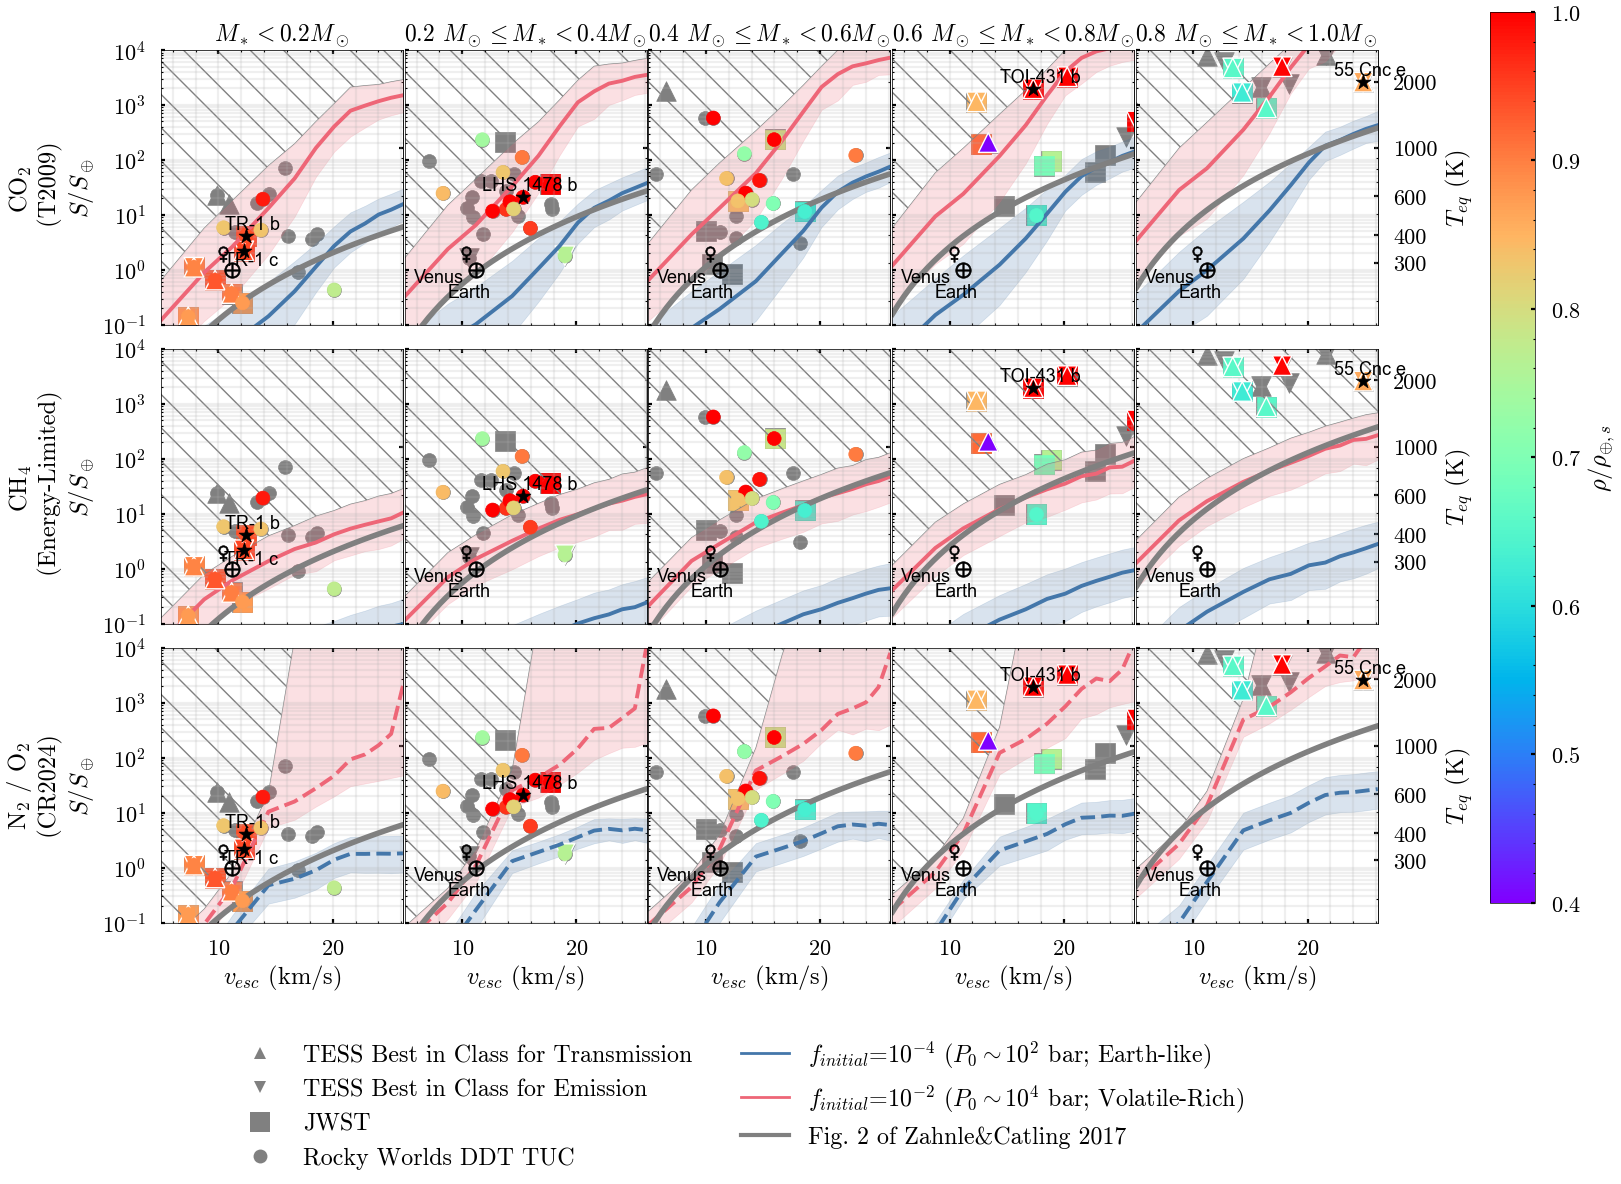

In [13]:
from matplotlib.colors import LogNorm

cs = CosmicShoreline()
earth_mass = 5.972e24  # in kg



# Initialize figure for the new plot
fig2, axes = plt.subplots(3, 5, figsize=(15,10),sharex=True,sharey=True)

# Define atmospheres and MMWs before using them

atmospheres = ['CO2', 'CH4', 'N2+O2']
MMWs = {'CO2': 44, 'CH4': 16, 'N2+O2': 28}

f_initial_values = [1e-4, 1e-3, 1e-2]
colors = ['C0', 'C3', 'C1']

pl_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_rades = cs.M_R_fit(pl_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*pl_masses*earth_mass/(pl_rades*6.371e6))/1e3



# Stellar mass fixed at 1 Solar mass
st_mass_values = [0.1, 0.3, 0.5, 0.7, 1]
st_mass_labels = ['$M_*<0.2 M_\odot$',
                  '0.2 $M_\odot \leq M_* < 0.4 M_\odot$',
                  '0.4 $M_\odot \leq M_* < 0.6 M_\odot$',
                  '0.6 $M_\odot \leq M_* < 0.8 M_\odot$',
                  '0.8 $M_\odot \leq M_* < 1.0 M_\odot$']

texts = []

for n2, st_mass in zip(range(len(st_mass_values)),st_mass_values):
    if n2 == 0:
        df_JWST_transit_sub = df_JWST_transit[df_JWST_transit['st_mass']<0.2]
        df_JWST_direct_sub = df_JWST_direct[df_JWST_direct['st_mass']<0.2]
        df_TSM_sub = df_TSM[df_TSM['st_mass']<0.2]
        df_ESM_sub = df_ESM[df_ESM['st_mass']<0.2]
        df_STSCI_sub = df_STSCI[df_STSCI['st_mass']<0.2]
        df_rocks_sub = df_rocks[df_rocks['st_mass']<0.2]
    elif n2 == 1:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.2) & (df_JWST_transit['st_mass']<0.4)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.2) & (df_JWST_direct['st_mass']<0.4)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.2) & (df_TSM['st_mass']<0.4)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.2) & (df_ESM['st_mass']<0.4)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.2) & (df_STSCI['st_mass']<0.4)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.2) & (df_rocks['st_mass']<0.4)]
    elif n2 == 2:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.4) & (df_JWST_transit['st_mass']<0.6)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.4) & (df_JWST_direct['st_mass']<0.6)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.4) & (df_TSM['st_mass']<0.6)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.4) & (df_ESM['st_mass']<0.6)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.4) & (df_STSCI['st_mass']<0.6)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.4) & (df_rocks['st_mass']<0.6)]
    elif n2 == 3:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.6) & (df_JWST_transit['st_mass']<0.8)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.6) & (df_JWST_direct['st_mass']<0.8)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.6) & (df_TSM['st_mass']<0.8)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.6) & (df_ESM['st_mass']<0.8)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.6) & (df_STSCI['st_mass']<0.8)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.6) & (df_rocks['st_mass']<0.8)]
    else:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.8)&(df_JWST_transit['st_mass']<1.0)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.8)&(df_JWST_direct['st_mass']<1.0)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.8)&(df_TSM['st_mass']<1.0)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.8)&(df_ESM['st_mass']<1.0)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.8)&(df_STSCI['st_mass']<1.0)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.8) & (df_rocks['st_mass']<1.0)]

    for n1, atm in enumerate(atmospheres):
        ax=axes[n1,n2]
    
        ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=200,label='TSM',zorder=3,edgecolors='w',linewidths=1,
                    c = df_TSM_sub['pl_rho_ratio'],vmin=0.4,vmax=1.0,cmap="rainbow")
        ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=200,label='ESM',zorder=2,edgecolors='w',linewidths=1,
                    c = df_ESM_sub['pl_rho_ratio'],vmin=0.4,vmax=1.0,cmap="rainbow")
        ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=200,label='JWST Cycle3',zorder=1,
                    c = df_JWST_transit_sub['pl_rho_ratio'],vmin=0.4,vmax=1.0,cmap="rainbow")
        ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='s',s=200,label='JWST Cycle3',zorder=1,
                     c = df_JWST_direct_sub['pl_rho_ratio'],vmin=0.4,vmax=1.0,cmap="rainbow")

        c_ax = ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], c=df_STSCI_sub['pl_rho_ratio'],
                    marker='o',s=100,label='JWST Cycle3',zorder=10,vmin=0.4,vmax=1.0,cmap="rainbow")
        # ax.scatter(df_rocks_sub['pl_vesc'], df_rocks_sub['pl_insol'], marker='o',s=50,label='Rocky Planets',zorder=9,
                    # c = df_rocks_sub['pl_rho_ratio'],vmin=0.4,vmax=1.0,cmap="rainbow")
        
        ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=200,zorder=0,c='gray')
        ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=200,zorder=0,c='gray')
        ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=200,zorder=0,c='gray')
        ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='s',s=200,zorder=0,c='gray')
        ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], marker='o',s=100,zorder=0,c='gray')
        # ax.scatter(df_rocks_sub['pl_vesc'], df_rocks_sub['pl_insol'], marker='o',s=50,zorder=0,c='gray')


        # for i, txt in enumerate(df_STSCI_sub['Planet_Name']):
        #     texts.append(ax.annotate(txt, (df_STSCI_sub['pl_vesc'].values[i], df_STSCI_sub['pl_insol'].values[i]), 
        #                 textcoords="offset points", xytext=(5,5), ha='center',fontsize=13, rotation=45))

        
        
        # ax.plot(pl_v_esc, min_S_for_pl_mass, color=color, alpha=0.3)
        # plot solar system planets
        planets = ["Mercury", "Venus", "Earth", "Mars", "55 Cnc e", "LHS 1478 b", "TRAPPIST-1 b", "TRAPPIST-1 c","TOI-431 b"]
        pl_vesc = [4.25, 10.36, 11.19, 5.03, 23.09, 15.32, 12.41, 12.78, 17.3236]  # in km/s
        insolation_relative_to_earth = [6.67, 1.91, 1.00, 0.43, 2441, 23.37, 4.15, 2.27, 1970.761]
        for planet, esc_vel, insolation in zip(planets, pl_vesc, insolation_relative_to_earth):
            if planet in df_rocks['pl_name'].values:
                esc_vel = df_rocks[df_rocks['pl_name']==planet]['pl_vesc'].values[0]
                insolation = df_rocks[df_rocks['pl_name']==planet]['pl_insol'].values[0]
                if planet == "TRAPPIST-1 b":
                    planet = 'TR-1 b'
                elif planet == "TRAPPIST-1 c":
                    planet = 'TR-1 c'
            if planet == "55 Cnc e":
                if n2 ==4:
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == "LHS 1478 b":
                if n2 ==1:
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet[0] == 'T':
                if n2 ==0 and planet[1] == 'R':
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    if planet[-1] == 'b':
                        texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                                 xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
                    else:
                        texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                                 xytext=(5,-10), ha='center',zorder=15,fontsize=13, font='arial'))
                elif n2 ==3 and planet[1] == 'O':
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == 'Venus':
                ax.scatter(esc_vel, insolation,marker='$♀$',color='black',zorder=10)
                if n2>0:
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(-20,-20), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == 'Earth':
                ax.scatter(esc_vel, insolation,marker='$⊕$',color='black',zorder=10)
                if n2>0:
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(-5,-20), ha='center',zorder=15,fontsize=13, font='arial'))

        # ax.set_ylim(1, 4e4)
        ax.set_xscale('linear')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        ax.set_xlim(min(pl_v_esc), max(pl_v_esc))
        ax.set_ylim(0.1, 1e4)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        axes[n1,0].set_ylabel('%s \n S/S_\oplus'%atm)

planet_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_radiuse_values = cs.M_R_fit(planet_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*planet_masses*earth_mass/(pl_radiuse_values*6.371e6))/1e3
stellar_mass_range = [[0.1,0.2], [0.2,0.4], [0.4,0.6], [0.6,0.8], [0.8,1.0]]
for n_x, MMW in enumerate(MMWs):
    for n_st, stellar_mass in enumerate(stellar_mass_range):
        if n_x == 2:
            ls ='--'
        else:
            ls = '-'
        axes[n_x,n_st].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,0],color=colors[0],ls=ls)
        axes[n_x,n_st].fill_between(pl_v_esc ,CS_insol_001[n_x,n_st,:,0],CS_insol_05[n_x,n_st,:,0],
                                   color=colors[0],alpha=0.2)
        axes[n_x,n_st].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,1],color=colors[2],ls=ls)
        axes[n_x,n_st].fill_between(pl_v_esc,CS_insol_001[n_x,n_st,:,1],CS_insol_05[n_x,n_st,:,1],
                                   color=colors[2],alpha=0.2)
        axes[n_x,n_st].fill_between(pl_v_esc ,CS_insol_05[n_x,n_st,:,1],1e4*np.ones_like(pl_v_esc),
                                   hatch='\\',facecolor='none',edgecolor='gray')

for ax in axes[-1,:]:
    ax.set_xlabel('$v_{esc}$ (km/s)')
for n2,ax in enumerate(axes[0,:]):
    ax.set_title(f'{st_mass_labels[n2]}',fontsize=17)

# L_xuv1 = cs.calculate_L_XUV(0.1,3e9)
# L_bol1 = 3.846e26*10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# F_xuv1 = L_xuv1/L_bol1

# L_xuv2 = cs.calculate_L_XUV(0.3,3e9)
# L_bol2 = 3.846e26*10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# F_xuv2 = L_xuv2/L_bol2

# L_xuv3 = cs.calculate_L_XUV(0.5,3e9)
# L_bol3 = 3.846e26*10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# F_xuv3 = L_xuv3/L_bol3

# L_xuv4 = cs.calculate_L_XUV(1,3e9)
# L_bol4 = 3.846e26*10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# F_xuv4 = L_xuv4/L_bol4

# F_bol1 = 10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# F_xuv1 = F_bol1**(-0.6)

# F_bol2 = 10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# F_xuv2 = F_bol2**(-0.6)

# F_bol3 = 10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# F_xuv3 = F_bol3**(-0.6)

# F_bol4 = 10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# F_xuv4 = F_bol4**(-0.6)



v_arr = np.linspace(5, 30)
for n_ax in range(5):
    for ax in axes[:,n_ax]:
        factor = 10**cs.L_bol_interpolator_B15((st_mass_values[n_ax],np.log10(3e9)))
        ax.plot(v_arr, factor**0.6*10**(k_cs*np.log10(v_arr)+b_cs), color='gray', lw=4)


custom_lines = [plt.Line2D([0], [0], linestyle = '',marker='^', color='gray', markersize=8),
                plt.Line2D([0], [0], linestyle = '', marker='v', color='gray', markersize=8),
                plt.Line2D([0], [0], linestyle = '', marker='s', color='gray', markersize=15),
                plt.Line2D([0], [0], linestyle = '', marker='o', color='gray', markersize=10)]

legend_labels = ['TESS Best in Class for Transmission','TESS Best in Class for Emission','JWST','Rocky Worlds DDT TUC']

custom_lines += [plt.Line2D([0], [0], color=color, lw=2) for color in [colors[0],colors[2]]]
legend_labels += [('$f_{initial}$='+'%s'%(fc_0)+
                   r' ($P_0\sim$%s bar; %s)')%(P0,text1) 
                   for fc_0,P0,text1 in zip(['$10^{-4}$','$10^{-2}$'],['$10^2$','$10^4$'],
                                                        ['Earth-like','Volatile-Rich'],)]

# custom_lines += [plt.Line2D([0], [0], color='black', linestyle=style, lw=2) for style in ['-','--']]
# legend_labels += ['Jackson2012+Guinan2016','Selsis2007']

custom_lines += [plt.Line2D([0], [0], color='gray', lw=3)]
legend_labels += ['Fig. 2 of Zahnle&Catling 2017']

axes[0,0].set_ylabel('CO$_2$ \n (T2009)\n'+ r'$S/S_\oplus$')
axes[1,0].set_ylabel('CH$_4$ \n (Energy-Limited)\n' +r'$S/S_\oplus$')
axes[2,0].set_ylabel('N$_2$ $/$ O$_2$\n (CR2024) \n'+ r'$S/S_\oplus$')



fig2.legend(custom_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2,fontsize='xx-large')

# Conversion functions
def S_to_Teq(S):
    """Convert insolation S to equilibrium temperature T_eq."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (S * 1361 / 4 / sigma) ** 0.25

def Teq_to_S(Teq):
    """Convert equilibrium temperature T_eq back to insolation S."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (Teq**4 * sigma) / (1361/4)

for n in range(3):
    axes_row = axes[n,:]
    for n_ax,ax in enumerate(axes_row):
        ax.tick_params(axis='y',which='both', right=False)
        ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
        if n_ax<4:
            ax2.tick_params(axis='y',which='both',labelright=False)
        else:
            ax2.set_ylabel('$T_{eq}$ (K)')
            ax2.set_yticks([300,400,600,1000,2000])
            ax2.set_yticklabels(['300','400','600','1000','2000'])
# fig2.suptitle(f'Cosmic Shorelines')
# adjust_text(texts)

plt.tight_layout(w_pad=0.,h_pad=0.)



cbar_ax=fig2.add_axes([1.0, 0.1, 0.03, 0.9])
cbar_ax.set_axis_off()
cba = plt.colorbar(c_ax, ax=cbar_ax,fraction=0.99, pad=0.1)
cba.set_label(r'$\rho$/$\rho_{\oplus,s}$')


fig2.savefig('./figures/CS_vesp_vs_insol_exoplanets.pdf',bbox_inches='tight')

In [14]:
CS_insol_001 = np.load('./data-montecarlo/CS_insol_001_pl_vesc_2age_dists.npy')
CS_insol_01 = np.load('./data-montecarlo/CS_insol_01_pl_vesc_2age_dists.npy')
CS_insol_05 = np.load('./data-montecarlo/CS_insol_05_pl_vesc_2age_dists.npy')

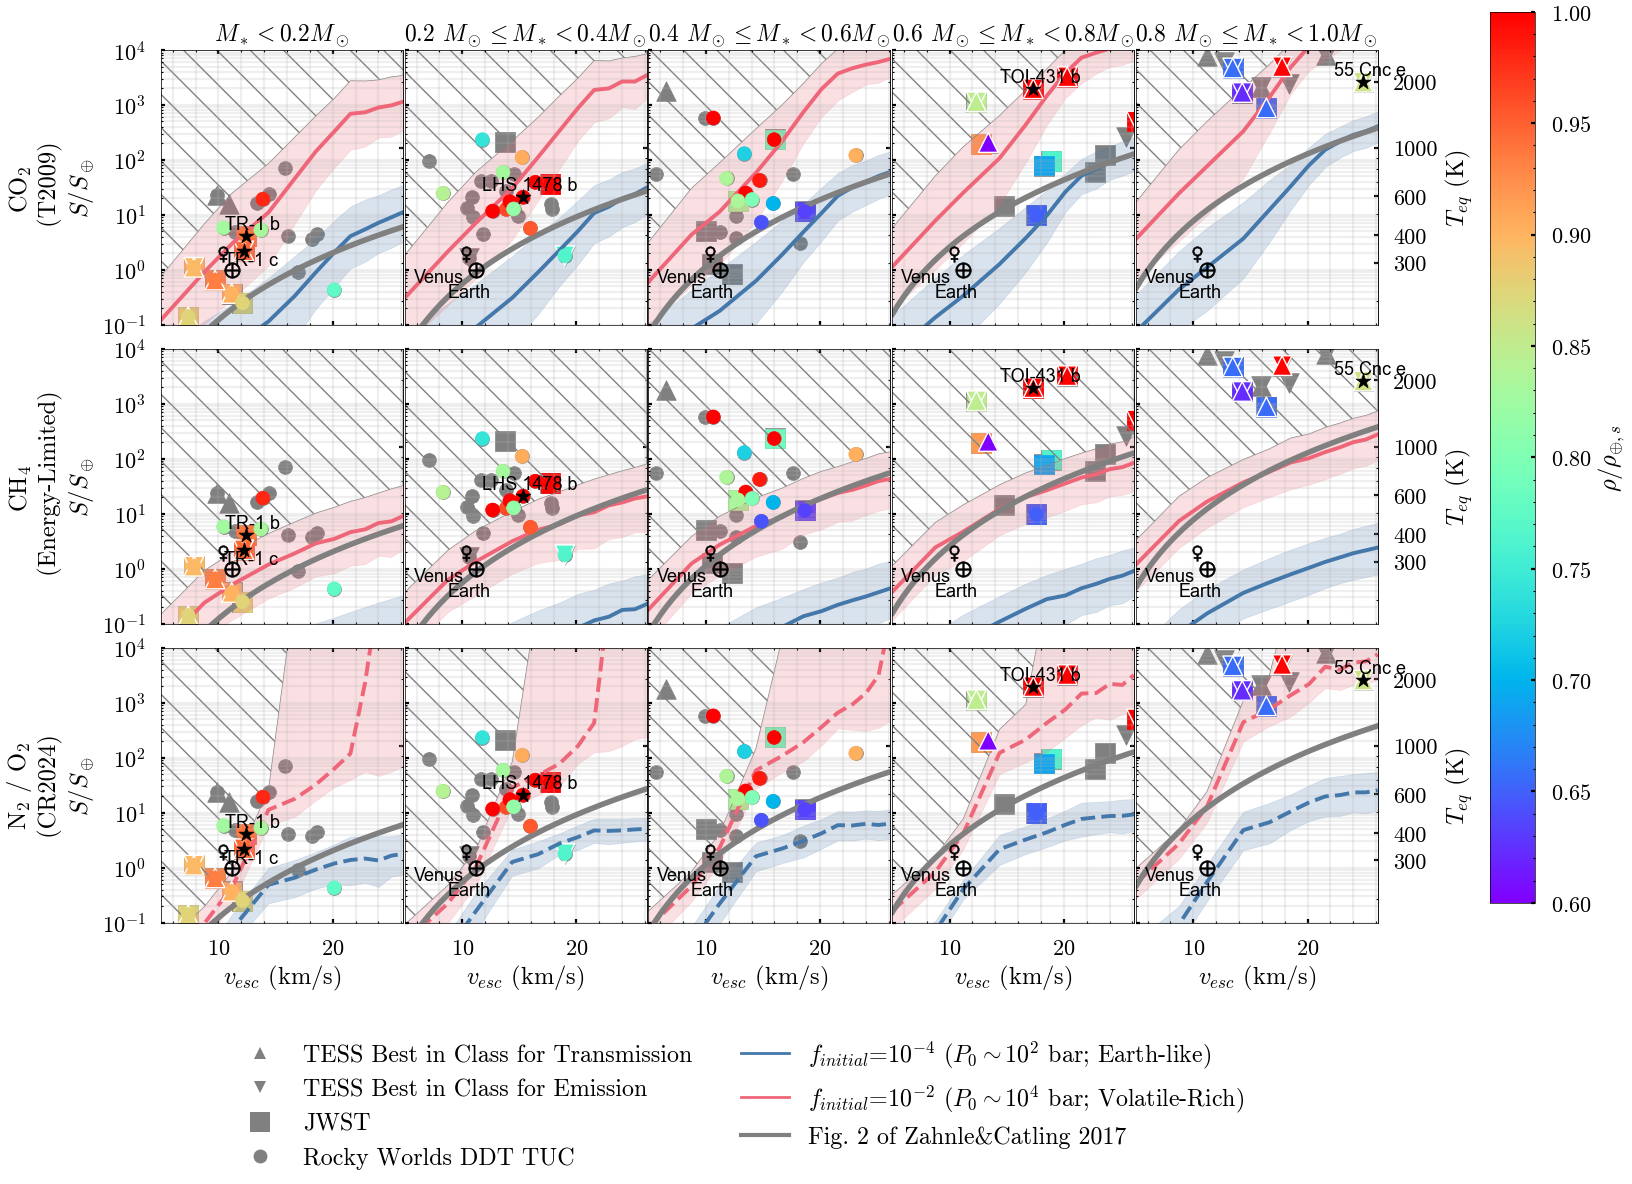

In [15]:
from matplotlib.colors import LogNorm

cs = CosmicShoreline()
earth_mass = 5.972e24  # in kg



# Initialize figure for the new plot
fig2, axes = plt.subplots(3, 5, figsize=(15,10),sharex=True,sharey=True)

# Define atmospheres and MMWs before using them

atmospheres = ['CO2', 'CH4', 'N2+O2']
MMWs = {'CO2': 44, 'CH4': 16, 'N2+O2': 28}

f_initial_values = [1e-4, 1e-3, 1e-2]
colors = ['C0', 'C3', 'C1']

pl_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_rades = cs.M_R_fit(pl_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*pl_masses*earth_mass/(pl_rades*6.371e6))/1e3



# Stellar mass fixed at 1 Solar mass
st_mass_values = [0.1, 0.3, 0.5, 0.7, 1]
st_mass_labels = ['$M_*<0.2 M_\odot$',
                  '0.2 $M_\odot \leq M_* < 0.4 M_\odot$',
                  '0.4 $M_\odot \leq M_* < 0.6 M_\odot$',
                  '0.6 $M_\odot \leq M_* < 0.8 M_\odot$',
                  '0.8 $M_\odot \leq M_* < 1.0 M_\odot$']

texts = []

for n2, st_mass in zip(range(len(st_mass_values)),st_mass_values):
    if n2 == 0:
        df_JWST_transit_sub = df_JWST_transit[df_JWST_transit['st_mass']<0.2]
        df_JWST_direct_sub = df_JWST_direct[df_JWST_direct['st_mass']<0.2]
        df_TSM_sub = df_TSM[df_TSM['st_mass']<0.2]
        df_ESM_sub = df_ESM[df_ESM['st_mass']<0.2]
        df_STSCI_sub = df_STSCI[df_STSCI['st_mass']<0.2]
        df_rocks_sub = df_rocks[df_rocks['st_mass']<0.2]
    elif n2 == 1:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.2) & (df_JWST_transit['st_mass']<0.4)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.2) & (df_JWST_direct['st_mass']<0.4)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.2) & (df_TSM['st_mass']<0.4)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.2) & (df_ESM['st_mass']<0.4)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.2) & (df_STSCI['st_mass']<0.4)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.2) & (df_rocks['st_mass']<0.4)]
    elif n2 == 2:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.4) & (df_JWST_transit['st_mass']<0.6)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.4) & (df_JWST_direct['st_mass']<0.6)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.4) & (df_TSM['st_mass']<0.6)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.4) & (df_ESM['st_mass']<0.6)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.4) & (df_STSCI['st_mass']<0.6)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.4) & (df_rocks['st_mass']<0.6)]
    elif n2 == 3:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.6) & (df_JWST_transit['st_mass']<0.8)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.6) & (df_JWST_direct['st_mass']<0.8)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.6) & (df_TSM['st_mass']<0.8)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.6) & (df_ESM['st_mass']<0.8)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.6) & (df_STSCI['st_mass']<0.8)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.6) & (df_rocks['st_mass']<0.8)]
    else:
        df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.8)&(df_JWST_transit['st_mass']<1.0)]
        df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.8)&(df_JWST_direct['st_mass']<1.0)]
        df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.8)&(df_TSM['st_mass']<1.0)]
        df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.8)&(df_ESM['st_mass']<1.0)]
        df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.8)&(df_STSCI['st_mass']<1.0)]
        df_rocks_sub = df_rocks[(df_rocks['st_mass']>=0.8) & (df_rocks['st_mass']<1.0)]

    for n1, atm in enumerate(atmospheres):
        ax=axes[n1,n2]
    
        ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=200,label='TSM',zorder=3,edgecolors='w',linewidths=1,
                    c = df_TSM_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
        ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=200,label='ESM',zorder=2,edgecolors='w',linewidths=1,
                    c = df_ESM_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
        ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=200,label='JWST Cycle3',zorder=1,
                    c = df_JWST_transit_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
        ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='s',s=200,label='JWST Cycle3',zorder=1,
                     c = df_JWST_direct_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")

        c_ax = ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], c=df_STSCI_sub['pl_rho_ratio'],
                    marker='o',s=100,label='JWST Cycle3',zorder=10,vmin=0.6,vmax=1.0,cmap="rainbow")
        # ax.scatter(df_rocks_sub['pl_vesc'], df_rocks_sub['pl_insol'], marker='o',s=50,label='Rocky Planets',zorder=9,
                    # c = df_rocks_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
        
        ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=200,zorder=0,c='gray')
        ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=200,zorder=0,c='gray')
        ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=200,zorder=0,c='gray')
        ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='s',s=200,zorder=0,c='gray')
        ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], marker='o',s=100,zorder=0,c='gray')
        # ax.scatter(df_rocks_sub['pl_vesc'], df_rocks_sub['pl_insol'], marker='o',s=50,zorder=0,c='gray')


        # for i, txt in enumerate(df_STSCI_sub['Planet_Name']):
        #     texts.append(ax.annotate(txt, (df_STSCI_sub['pl_vesc'].values[i], df_STSCI_sub['pl_insol'].values[i]), 
        #                 textcoords="offset points", xytext=(5,5), ha='center',fontsize=13, rotation=45))

        
        
        # ax.plot(pl_v_esc, min_S_for_pl_mass, color=color, alpha=0.3)
        # plot solar system planets
        planets = ["Mercury", "Venus", "Earth", "Mars", "55 Cnc e", "LHS 1478 b", "TRAPPIST-1 b", "TRAPPIST-1 c","TOI-431 b"]
        pl_vesc = [4.25, 10.36, 11.19, 5.03, 23.09, 15.32, 12.41, 12.78, 17.3236]  # in km/s
        insolation_relative_to_earth = [6.67, 1.91, 1.00, 0.43, 2441, 23.37, 4.15, 2.27, 1970.761]
        for planet, esc_vel, insolation in zip(planets, pl_vesc, insolation_relative_to_earth):
            if planet in df_rocks['pl_name'].values:
                esc_vel = df_rocks[df_rocks['pl_name']==planet]['pl_vesc'].values[0]
                insolation = df_rocks[df_rocks['pl_name']==planet]['pl_insol'].values[0]
                if planet == "TRAPPIST-1 b":
                    planet = 'TR-1 b'
                elif planet == "TRAPPIST-1 c":
                    planet = 'TR-1 c'
            if planet == "55 Cnc e":
                if n2 ==4:
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == "LHS 1478 b":
                if n2 ==1:
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet[0] == 'T':
                if n2 ==0 and planet[1] == 'R':
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    if planet[-1] == 'b':
                        texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                                 xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
                    else:
                        texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                                 xytext=(5,-10), ha='center',zorder=15,fontsize=13, font='arial'))
                elif n2 ==3 and planet[1] == 'O':
                    ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == 'Venus':
                ax.scatter(esc_vel, insolation,marker='$♀$',color='black',zorder=10)
                if n2>0:
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(-20,-20), ha='center',zorder=15,fontsize=13, font='arial'))
            elif planet == 'Earth':
                ax.scatter(esc_vel, insolation,marker='$⊕$',color='black',zorder=10)
                if n2>0:
                    texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
                                             xytext=(-5,-20), ha='center',zorder=15,fontsize=13, font='arial'))

        # ax.set_ylim(1, 4e4)
        ax.set_xscale('linear')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        ax.set_xlim(min(pl_v_esc), max(pl_v_esc))
        ax.set_ylim(0.1, 1e4)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        axes[n1,0].set_ylabel('%s \n S/S_\oplus'%atm)

planet_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_radiuse_values = cs.M_R_fit(planet_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*planet_masses*earth_mass/(pl_radiuse_values*6.371e6))/1e3
stellar_mass_range = [[0.1,0.2], [0.2,0.4], [0.4,0.6], [0.6,0.8], [0.8,1.0]]
for n_x, MMW in enumerate(MMWs):
    for n_st, stellar_mass in enumerate(stellar_mass_range):
        if n_x == 2:
            ls ='--'
        else:
            ls = '-'
        axes[n_x,n_st].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,0],color=colors[0],ls=ls)
        axes[n_x,n_st].fill_between(pl_v_esc ,CS_insol_001[n_x,n_st,:,0],CS_insol_05[n_x,n_st,:,0],
                                   color=colors[0],alpha=0.2)
        axes[n_x,n_st].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,1],color=colors[2],ls=ls)
        axes[n_x,n_st].fill_between(pl_v_esc,CS_insol_001[n_x,n_st,:,1],CS_insol_05[n_x,n_st,:,1],
                                   color=colors[2],alpha=0.2)
        axes[n_x,n_st].fill_between(pl_v_esc ,CS_insol_05[n_x,n_st,:,1],1e4*np.ones_like(pl_v_esc),
                                   hatch='\\',facecolor='none',edgecolor='gray')

for ax in axes[-1,:]:
    ax.set_xlabel('$v_{esc}$ (km/s)')
for n2,ax in enumerate(axes[0,:]):
    ax.set_title(f'{st_mass_labels[n2]}',fontsize=17)

# L_xuv1 = cs.calculate_L_XUV(0.1,3e9)
# L_bol1 = 3.846e26*10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# F_xuv1 = L_xuv1/L_bol1

# L_xuv2 = cs.calculate_L_XUV(0.3,3e9)
# L_bol2 = 3.846e26*10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# F_xuv2 = L_xuv2/L_bol2

# L_xuv3 = cs.calculate_L_XUV(0.5,3e9)
# L_bol3 = 3.846e26*10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# F_xuv3 = L_xuv3/L_bol3

# L_xuv4 = cs.calculate_L_XUV(1,3e9)
# L_bol4 = 3.846e26*10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# F_xuv4 = L_xuv4/L_bol4

# F_bol1 = 10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# F_xuv1 = F_bol1**(-0.6)

# F_bol2 = 10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# F_xuv2 = F_bol2**(-0.6)

# F_bol3 = 10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# F_xuv3 = F_bol3**(-0.6)

# F_bol4 = 10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# F_xuv4 = F_bol4**(-0.6)



v_arr = np.linspace(5, 30)
for n_ax in range(5):
    for ax in axes[:,n_ax]:
        factor = 10**cs.L_bol_interpolator_B15((st_mass_values[n_ax],np.log10(3e9)))
        ax.plot(v_arr, factor**0.6*10**(k_cs*np.log10(v_arr)+b_cs), color='gray', lw=4)


custom_lines = [plt.Line2D([0], [0], linestyle = '',marker='^', color='gray', markersize=8),
                plt.Line2D([0], [0], linestyle = '', marker='v', color='gray', markersize=8),
                plt.Line2D([0], [0], linestyle = '', marker='s', color='gray', markersize=15),
                plt.Line2D([0], [0], linestyle = '', marker='o', color='gray', markersize=10)]

legend_labels = ['TESS Best in Class for Transmission','TESS Best in Class for Emission','JWST','Rocky Worlds DDT TUC']

custom_lines += [plt.Line2D([0], [0], color=color, lw=2) for color in [colors[0],colors[2]]]
legend_labels += [('$f_{initial}$='+'%s'%(fc_0)+
                   r' ($P_0\sim$%s bar; %s)')%(P0,text1) 
                   for fc_0,P0,text1 in zip(['$10^{-4}$','$10^{-2}$'],['$10^2$','$10^4$'],
                                                        ['Earth-like','Volatile-Rich'],)]

# custom_lines += [plt.Line2D([0], [0], color='black', linestyle=style, lw=2) for style in ['-','--']]
# legend_labels += ['Jackson2012+Guinan2016','Selsis2007']

custom_lines += [plt.Line2D([0], [0], color='gray', lw=3)]
legend_labels += ['Fig. 2 of Zahnle&Catling 2017']

axes[0,0].set_ylabel('CO$_2$ \n (T2009)\n'+ r'$S/S_\oplus$')
axes[1,0].set_ylabel('CH$_4$ \n (Energy-Limited)\n' +r'$S/S_\oplus$')
axes[2,0].set_ylabel('N$_2$ $/$ O$_2$\n (CR2024) \n'+ r'$S/S_\oplus$')



fig2.legend(custom_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2,fontsize='xx-large')

# Conversion functions
def S_to_Teq(S):
    """Convert insolation S to equilibrium temperature T_eq."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (S * 1361 / 4 / sigma) ** 0.25

def Teq_to_S(Teq):
    """Convert equilibrium temperature T_eq back to insolation S."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (Teq**4 * sigma) / (1361/4)

for n in range(3):
    axes_row = axes[n,:]
    for n_ax,ax in enumerate(axes_row):
        ax.tick_params(axis='y',which='both', right=False)
        ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
        if n_ax<4:
            ax2.tick_params(axis='y',which='both',labelright=False)
        else:
            ax2.set_ylabel('$T_{eq}$ (K)')
            ax2.set_yticks([300,400,600,1000,2000])
            ax2.set_yticklabels(['300','400','600','1000','2000'])
# fig2.suptitle(f'Cosmic Shorelines')
# adjust_text(texts)

plt.tight_layout(w_pad=0.,h_pad=0.)



cbar_ax=fig2.add_axes([1.0, 0.1, 0.03, 0.9])
cbar_ax.set_axis_off()
cba = plt.colorbar(c_ax, ax=cbar_ax,fraction=0.99, pad=0.1)
cba.set_label(r'$\rho$/$\rho_{\oplus,s}$')


fig2.savefig('./figures/CS_vesp_vs_insol_exoplanets_age_2dists.pdf',bbox_inches='tight')

In [16]:
# CS_insol_001 = np.load('data-montecarlo/CS_V2_insol_001_pl_vesc_slides.npy')
# CS_insol_01 = np.load('data-montecarlo/CS_V2_insol_01_pl_vesc_slides.npy')
# CS_insol_05 = np.load('data-montecarlo/CS_V2_insol_05_pl_vesc_slides.npy')

In [96]:
# from matplotlib.colors import LogNorm

# cs = CosmicShoreline()
# earth_mass = 5.972e24  # in kg



# # Initialize figure for the new plot
# fig2, axes = plt.subplots(3, 1, figsize=(10,10),sharex=True,sharey=True)

# # Define atmospheres and MMWs before using them

# atmospheres = ['CO2', 'CH4', 'N2+O2']
# MMWs = {'CO2': 44, 'CH4': 16, 'N2+O2': 28}

# f_initial_values = [1e-4, 1e-3, 1e-2]
# colors = ['C0', 'C3', 'C1']

# pl_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
# pl_rades = cs.M_R_fit(pl_masses, x_M_or_R='M')
# pl_v_esc = np.sqrt(2*6.67430e-11*pl_masses*earth_mass/(pl_rades*6.371e6))/1e3



# # Stellar mass fixed at 1 Solar mass
# st_mass_values = [0.2]
# st_mass_labels = ['$M_*<0.4 M_\odot$']

# texts = []

# for n2, st_mass in zip(range(len(st_mass_values)),st_mass_values):
#     if n2 == 0:
#         df_JWST_transit_sub = df_JWST_transit[df_JWST_transit['st_mass']<0.4]
#         df_JWST_direct_sub = df_JWST_direct[df_JWST_direct['st_mass']<0.4]
#         df_TSM_sub = df_TSM[df_TSM['st_mass']<0.4]
#         df_ESM_sub = df_ESM[df_ESM['st_mass']<0.4]
#         df_STSCI_sub = df_STSCI[df_STSCI['st_mass']<0.4]
#     elif n2 == 1:
#         df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.4) & (df_JWST_transit['st_mass']<0.8)]
#         df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.4) & (df_JWST_direct['st_mass']<0.8)]
#         df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.4) & (df_TSM['st_mass']<0.8)]
#         df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.4) & (df_ESM['st_mass']<0.8)]
#         df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.4) & (df_STSCI['st_mass']<0.8)]
#     elif n2 == 2:
#         df_JWST_transit_sub = df_JWST_transit[(df_JWST_transit['st_mass']>=0.8) & (df_JWST_transit['st_mass']<1.0)]
#         df_JWST_direct_sub = df_JWST_direct[(df_JWST_direct['st_mass']>=0.8) & (df_JWST_direct['st_mass']<1.0)]
#         df_TSM_sub = df_TSM[(df_TSM['st_mass']>=0.8) & (df_TSM['st_mass']<1.0)]
#         df_ESM_sub = df_ESM[(df_ESM['st_mass']>=0.8) & (df_ESM['st_mass']<1.0)]
#         df_STSCI_sub = df_STSCI[(df_STSCI['st_mass']>=0.8) & (df_STSCI['st_mass']<1.0)]
    
#     for n1, atm in enumerate(atmospheres):
#         ax=axes[n1]
    
#         ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=200,label='TSM',zorder=3,edgecolors='w',linewidths=1,
#                     c = df_TSM_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
#         ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=200,label='ESM',zorder=2,edgecolors='w',linewidths=1,
#                     c = df_ESM_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
#         ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=200,label='JWST Cycle3',zorder=1,
#                     c = df_JWST_transit_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")
#         ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='>',s=200,label='JWST Cycle3',zorder=1,
#                      c = df_JWST_direct_sub['pl_rho_ratio'],vmin=0.6,vmax=1.0,cmap="rainbow")

#         c_ax = ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], c=df_STSCI_sub['pl_rho_ratio'],
#                     marker='o',s=100,label='JWST Cycle3',zorder=10,vmin=0.6,vmax=1.0,cmap="rainbow")
        
#         ax.scatter(df_TSM_sub['pl_vesc'], df_TSM_sub['pl_insol'],marker='^',s=100,zorder=0,c='gray')
#         ax.scatter(df_ESM_sub['pl_vesc'], df_ESM_sub['pl_insol'],marker='v',s=100,zorder=0,c='gray')
#         ax.scatter(df_JWST_transit_sub['pl_vesc'], df_JWST_transit_sub['pl_insol'], marker='s',s=100,zorder=0,c='gray')
#         ax.scatter(df_JWST_direct_sub['pl_vesc'], df_JWST_direct_sub['pl_insol'], marker='>',s=100,zorder=0,c='gray')
#         ax.scatter(df_STSCI_sub['pl_vesc'], df_STSCI_sub['pl_insol'], marker='o',s=100,zorder=0,c='gray')

#         # for i, txt in enumerate(df_STSCI_sub['Planet_Name']):
#         #     texts.append(ax.annotate(txt, (df_STSCI_sub['pl_vesc'].values[i], df_STSCI_sub['pl_insol'].values[i]), 
#         #                 textcoords="offset points", xytext=(5,5), ha='center',fontsize=13, rotation=45))

        
        
#         # ax.plot(pl_v_esc, min_S_for_pl_mass, color=color, alpha=0.3)
#         # plot solar system planets
#         planets = ["Mercury", "Venus", "Earth", "Mars", "55 Cnc e", "LHS 1478 b", "TRAPPIST-1 b", "TRAPPIST-1 c","TOI-431 b"]
#         pl_vesc = [4.25, 10.36, 11.19, 5.03, 23.09, 15.32, 12.41, 12.78, 17.3236]  # in km/s
#         insolation_relative_to_earth = [6.67, 1.91, 1.00, 0.43, 2441, 23.37, 4.15, 2.27, 1970.761]
#         for planet, esc_vel, insolation in zip(planets, pl_vesc, insolation_relative_to_earth):
#             if planet in df_rocks['pl_name'].values:
#                 esc_vel = df_rocks[df_rocks['pl_name']==planet]['pl_vesc'].values[0]
#                 insolation = df_rocks[df_rocks['pl_name']==planet]['pl_insol'].values[0]
#                 if planet == "TRAPPIST-1 b":
#                     planet = 'TR-1 b'
#                 elif planet == "TRAPPIST-1 c":
#                     planet = 'TR-1 c'
#             if planet == "55 Cnc e":
#                 if n2 ==4:
#                     ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
#                     texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                              xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
#             elif planet == "LHS 1478 b":
#                 if n2 ==1:
#                     ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
#                     texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                              xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
#             elif planet[0] == 'T':
#                 if n2 ==0 and planet[1] == 'R':
#                     ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
#                     if planet[-1] == 'b':
#                         texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                                  xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
#                     else:
#                         texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                                  xytext=(5,-10), ha='center',zorder=15,fontsize=13, font='arial'))
#                 elif n2 ==3 and planet[1] == 'O':
#                     ax.scatter(esc_vel, insolation,marker='*',color='black',zorder=10)
#                     texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                              xytext=(5,5), ha='center',zorder=15,fontsize=13, font='arial'))
#             elif planet == 'Venus':
#                 ax.scatter(esc_vel, insolation,marker='$♀$',color='black',zorder=10)
#                 if n2>0:
#                     texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                              xytext=(-20,-20), ha='center',zorder=15,fontsize=13, font='arial'))
#             elif planet == 'Earth':
#                 ax.scatter(esc_vel, insolation,marker='$⊕$',color='black',zorder=10)
#                 if n2>0:
#                     texts.append(ax.annotate(planet, (esc_vel, insolation), textcoords="offset points", 
#                                              xytext=(-5,-20), ha='center',zorder=15,fontsize=13, font='arial'))

#         # ax.set_ylim(1, 4e4)
#         ax.set_xscale('linear')
#         ax.set_yscale('log')
#         # ax.set_xscale('log')
#         ax.set_xlim(5,20)
#         ax.set_ylim(0.1, 1e3)
#         ax.grid(True, which="both", ls="-", alpha=0.2)
#         axes[n1].set_ylabel('%s \n S/S_\oplus'%atm)

# planet_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
# pl_radiuse_values = cs.M_R_fit(planet_masses, x_M_or_R='M')
# pl_v_esc = np.sqrt(2*6.67430e-11*planet_masses*earth_mass/(pl_radiuse_values*6.371e6))/1e3
# stellar_mass_range = [[0.1,0.4]]
# for n_x, MMW in enumerate(MMWs):
#     for n_st, stellar_mass in enumerate(stellar_mass_range):
#         if n_x == 2:
#             ls ='--'
#         else:
#             ls = '-'
#         axes[n_x].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,0],color=colors[0],ls=ls)
#         axes[n_x].fill_between(pl_v_esc ,CS_insol_001[n_x,n_st,:,0],CS_insol_05[n_x,n_st,:,0],
#                                    color=colors[0],alpha=0.2)
#         axes[n_x].plot(pl_v_esc ,CS_insol_01[n_x,n_st,:,1],color=colors[2],ls=ls)
#         axes[n_x].fill_between(pl_v_esc,CS_insol_001[n_x,n_st,:,1],CS_insol_05[n_x,n_st,:,1],
#                                    color=colors[2],alpha=0.2)
#         axes[n_x].fill_between(pl_v_esc ,CS_insol_05[n_x,n_st,:,1],1e4*np.ones_like(pl_v_esc),
#                                    hatch='\\',facecolor='none',edgecolor='gray')

# axes[-1].set_xlabel('$v_{esc}$ (km/s)',fontsize=30)
# axes[0].set_title(f'{st_mass_labels[n2]}',fontsize=30)

# # L_xuv1 = cs.calculate_L_XUV(0.1,3e9)
# # L_bol1 = 3.846e26*10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# # F_xuv1 = L_xuv1/L_bol1

# # L_xuv2 = cs.calculate_L_XUV(0.3,3e9)
# # L_bol2 = 3.846e26*10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# # F_xuv2 = L_xuv2/L_bol2

# # L_xuv3 = cs.calculate_L_XUV(0.5,3e9)
# # L_bol3 = 3.846e26*10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# # F_xuv3 = L_xuv3/L_bol3

# # L_xuv4 = cs.calculate_L_XUV(1,3e9)
# # L_bol4 = 3.846e26*10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# # F_xuv4 = L_xuv4/L_bol4

# # F_bol1 = 10**cs.L_bol_interpolator_B15((0.1,np.log10(3e9)))
# # F_xuv1 = F_bol1**(-0.6)

# # F_bol2 = 10**cs.L_bol_interpolator_B15((0.3,np.log10(3e9)))
# # F_xuv2 = F_bol2**(-0.6)

# # F_bol3 = 10**cs.L_bol_interpolator_B15((0.5,np.log10(3e9)))
# # F_xuv3 = F_bol3**(-0.6)

# # F_bol4 = 10**cs.L_bol_interpolator_B15((1,np.log10(3e9)))
# # F_xuv4 = F_bol4**(-0.6)



# v_arr = np.linspace(5, 30)
# for n_ax in range(3):
#     ax = axes[n_ax]
#     factor = 10**cs.L_bol_interpolator_B15((st_mass_values[0],np.log10(3e9)))
#     ax.plot(v_arr, factor**0.6*10**(k_cs*np.log10(v_arr)+b_cs), color='gray', lw=4)


# custom_lines = [plt.Line2D([0], [0], linestyle = '',marker='^', color='gray', markersize=8),
#                 plt.Line2D([0], [0], linestyle = '', marker='v', color='gray', markersize=8),
#                 plt.Line2D([0], [0], linestyle = '', marker='s', color='gray', markersize=15),
#                 plt.Line2D([0], [0], linestyle = '', marker='o', color='gray', markersize=10)]

# legend_labels = ['TESS Best in Class for Transmission','TESS Best in Class for Emission','JWST','Rocky Worlds DDT TUC']

# custom_lines += [plt.Line2D([0], [0], color=color, lw=2) for color in [colors[0],colors[2]]]
# legend_labels += [('$f_{initial}$='+'%s'%(fc_0)+
#                    r' ($P_0\sim$%s bar; %s)')%(P0,text1) 
#                    for fc_0,P0,text1 in zip(['$10^{-4}$','$10^{-2}$'],['$10^2$','$10^4$'],
#                                                         ['Earth-like','Volatile-Rich'],)]

# # custom_lines += [plt.Line2D([0], [0], color='black', linestyle=style, lw=2) for style in ['-','--']]
# # legend_labels += ['Jackson2012+Guinan2016','Selsis2007']

# custom_lines += [plt.Line2D([0], [0], color='gray', lw=3)]
# legend_labels += ['Fig. 2 of Zahnle&Catling 2017']

# axes[0].set_ylabel('CO$_2$ \n'+ r'$S/S_\oplus$',fontsize=25)
# axes[1].set_ylabel('CH$_4$ \n (Energy-Limited)\n' +r'$S/S_\oplus$',fontsize=25)
# axes[2].set_ylabel('N$_2$ $/$ O$_2$ \n'+ r'$S/S_\oplus$',fontsize=25)



# fig2.legend(custom_lines, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2,fontsize='xx-large')

# # Conversion functions
# def S_to_Teq(S):
#     """Convert insolation S to equilibrium temperature T_eq."""
#     # Constants
#     sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
#     return (S * 1361 / 4 / sigma) ** 0.25

# def Teq_to_S(Teq):
#     """Convert equilibrium temperature T_eq back to insolation S."""
#     # Constants
#     sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
#     return (Teq**4 * sigma) / (1361/4)

# for n in range(3):
#     ax= axes[n]
#     ax.tick_params(axis='y',which='both', right=False)
#     ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
#     ax2.set_ylabel('$T_{eq}$ (K)',fontsize=25)
#     ax2.set_yticks([200, 300,400,600,1000,2000])
#     ax2.set_yticklabels(['200','300','400','600','1000','2000'])
# # fig2.suptitle(f'Cosmic Shorelines')
# # adjust_text(texts)

# plt.tight_layout(w_pad=0.,h_pad=0.)



# cbar_ax=fig2.add_axes([1.0, 0.1, 0.03, 0.9])
# cbar_ax.set_axis_off()
# cba = plt.colorbar(c_ax, ax=cbar_ax,fraction=0.99, pad=0.1)
# cba.set_label(r'$\rho$/$\rho_{\oplus,s}$', fontsize=25)


# fig2.savefig('./figures/CS_vesp_vs_insol_exoplanets.pdf',bbox_inches='tight')



In [97]:
# for item in df_rocks.to_dict(orient='records'):
#     if item['pl_vesc'] > 15 and item['pl_vesc'] < 17 and item['pl_insol']>100 and item['pl_insol']<500 and item['st_mass']>0.4 and item['st_mass']<0.6:
#         print(item['pl_name'])
#         print(item['pl_vesc'])
#         print(item['pl_insol'])
#         plt.plot(item['pl_vesc'],item['pl_insol'],'o')

# plt.xlim(0,30)
# plt.ylim(1e-1,1e4)
# plt.xscale('linear')
# plt.yscale('log')

## 2.3 Table generation

In [98]:
CS_insol_001_tb = np.load('./data-montecarlo/CS_V2_insol_001_pl_vesc.npy')
CS_insol_01_tb = np.load('./data-montecarlo/CS_V2_insol_01_pl_vesc.npy')
CS_insol_05_tb = np.load('./data-montecarlo/CS_V2_insol_05_pl_vesc.npy')

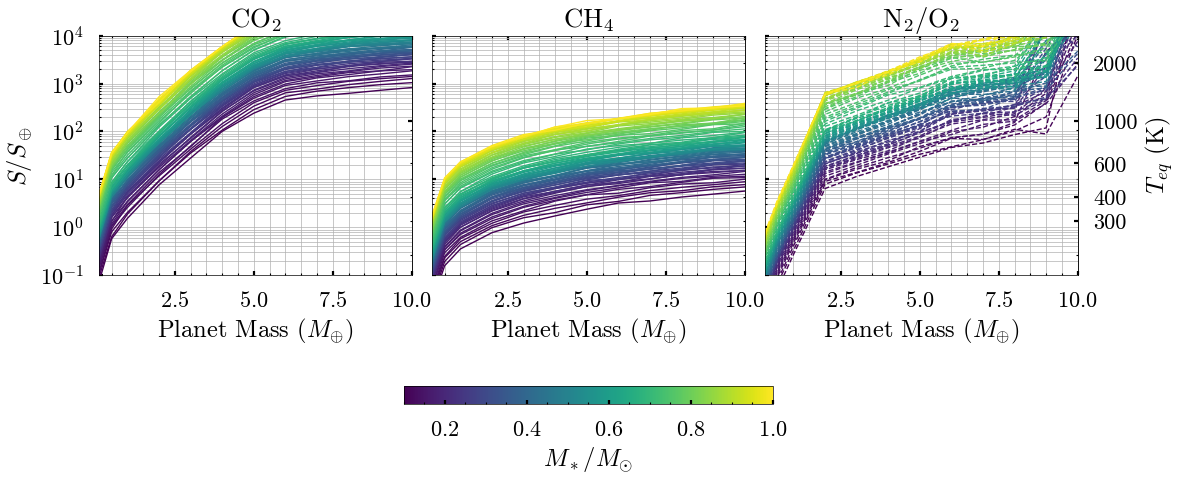

In [99]:
import matplotlib as mpl

MMWs = [44, 16, 28]
planet_masses = [0.1,0.5,1,2,3,4,5,6,7,8,9,10]
# stellar_mass_range = [[0.1,0.2], [0.2,0.4], [0.4,0.6], [0.6,0.8],[0.8,1.0]]
stellar_mass_range = [[x, x+0.01] for x in np.arange(0.1,1.001,0.01)]

pl_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_rades = cs.M_R_fit(pl_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*pl_masses*cs.earth_mass/(pl_rades*6.371e6))/1e3


fig, axes = plt.subplots(1, 3, figsize=(12,5),sharex=True,sharey=True)

colors = mpl.cm.viridis(np.linspace(0,1,len(stellar_mass_range)))
ls = ['-', '-', '--']
for n_x, MMW in enumerate(MMWs):
    for n_st, stellar_mass in enumerate(stellar_mass_range):
        axes[n_x].plot(pl_masses,CS_insol_01_tb[n_x,n_st,:,1],c=colors[n_st],lw=1,ls=ls[n_x])

for ax in axes:
    ax.set_yscale('log')
    ax.set_xlim(0.1,10)
    ax.set_ylim(0.1,1e4)

axes[0].set_title('CO$_2$')
axes[1].set_title('CH$_4$')
axes[2].set_title('N$_2$/O$_2$')

axes[0].set_ylabel(r'$S/S_\oplus$')
axes[0].set_xlabel('Planet Mass ($M_{\oplus}$)')
axes[1].set_xlabel('Planet Mass ($M_{\oplus}$)')
axes[2].set_xlabel('Planet Mass ($M_{\oplus}$)')

# Conversion functions
def S_to_Teq(S):
    """Convert insolation S to equilibrium temperature T_eq."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (S * 1361 / 4 / sigma) ** 0.25

def Teq_to_S(Teq):
    """Convert equilibrium temperature T_eq back to insolation S."""
    # Constants
    sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
    return (Teq**4 * sigma) / (1361/4)

for n_ax,ax in enumerate(axes):
    ax.tick_params(axis='y',which='both', right=False)
    ax2 = ax.secondary_yaxis('right', functions=(S_to_Teq, Teq_to_S))
    ax.grid(True, which="both", ls="-", lw=0.5)
    if n_ax<2:
        ax2.tick_params(axis='y',which='both',labelright=False)
    else:
        ax2.set_ylabel('$T_{eq}$ (K)')
        ax2.set_yticks([300,400,600,1000,2000])
        ax2.set_yticklabels(['300','400','600','1000','2000'])
        
fig.tight_layout(w_pad=0)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0.1, vmax=1.0), cmap='viridis'), ax=axes.ravel().tolist(), orientation='horizontal',fraction=0.05, pad=0.3)
cbar.set_label(r'$M_*/M_{\odot}$')


fig.savefig('./figures/CS_V2_insol_vs_mass.pdf',bbox_inches='tight')


In [100]:
df_combined = pd.concat([df_JWST_transit,df_JWST_direct,df_TSM,df_ESM,df_STSCI])
len(df_combined)

# Remove duplicates based on planet name
df_combined = df_combined.drop_duplicates(subset='pl_name', keep='first')

# Get the count of unique planets
unique_planets_count = len(df_combined)
print(f"Number of unique exoplanets in the combined dataset: {unique_planets_count}")

# Display the first few rows of the unique planets dataset
df_combined.head()

Number of unique exoplanets in the combined dataset: 58


Unnamed: 0     pl_name  hostname  default_flag  sy_snum  sy_pnum  \
422          422    K2-141 b    K2-141             1        1        2   
473          473     K2-18 b     K2-18             0        1        2   
3720        3720  TOI-1075 b  TOI-1075             1        1        1   
3786        3786  TOI-1416 b  TOI-1416             1        1        1   
3802        3802  TOI-1468 b  TOI-1468             1        1        2   

     discoverymethod  disc_year                                 disc_facility  \
422          Transit       2018                                            K2   
473          Transit       2015                                            K2   
3720         Transit       2022  Transiting Exoplanet Survey Satellite (TESS)   
3786         Transit       2023  Transiting Exoplanet Survey Satellite (TESS)   
3802         Transit       2022  Transiting Exoplanet Survey Satellite (TESS)   

      tran_flag  ... efficiency_kmag      ed_ESM        ESM  pl_masse  \
422           1  ...        0.931624  167.092438  14.969734      4.97   
473           1  ...        1.000000    4.145472   0.295278      8.63   
3720          1  ...        1.000000  186.987015  12.057818      9.95   
3786          1  ...        0.706964   78.694665   9.700689      3.48   
3802          1  ...        0.964359   72.879133   6.246842      3.21   

      pl_masseerr2  pl_masseerr1  pl_masse_calc       pl_g  pl_rho_ratio  \
422          -0.34          0.35           4.97  21.383141      1.064759   
473          -1.35          1.35           8.63  12.427930      0.310462   
3720         -1.30          1.36           9.95  30.429927      1.064580   
3786         -0.47          0.47           3.48  13.008230      0.654934   
3802         -0.24          0.24           3.21  19.220032      1.242821   

        pl_vesc  
422   20.293814  
473   20.340382  
3720  26.365603  
3786  16.394798  
3802  17.714198  

[5 rows x 140 columns]

In [101]:
MMWs = [44, 16, 28]
planet_masses = [0.1,0.5,1,2,3,4,5,6,7,8,9,10]
# stellar_mass_range = [[0.1,0.2], [0.2,0.4], [0.4,0.6], [0.6,0.8],[0.8,1.0]]
stellar_mass_range = [[x, x+0.01] for x in np.arange(0.1,1.001,0.01)]
st_mass0_arr = np.arange(0.1,1.001,0.01)

pl_masses = np.array([0.1,0.5,1,2,3,4,5,6,7,8,9,10])
pl_rades = cs.M_R_fit(pl_masses, x_M_or_R='M')
pl_v_esc = np.sqrt(2*6.67430e-11*pl_masses*earth_mass/(pl_rades*6.371e6))/1e3


for i, item in df_combined.iterrows():
    n_st = np.argmin(np.abs(st_mass0_arr-item['st_mass']))
    CS_insol = CS_insol_01_tb[0,n_st,:,1]
    cs_interp = scipy.interpolate.interp1d(pl_v_esc, np.log10(CS_insol), kind='linear', fill_value='extrapolate')
    pl_loginsol_cri = cs_interp(item['pl_vesc'])
    score = pl_loginsol_cri - np.log10(item['pl_insol'])
    df_combined.loc[i,'score_CO2'] = score

for i, item in df_combined.iterrows():
    n_st = np.argmin(np.abs(st_mass0_arr-item['st_mass']))
    CS_insol = CS_insol_01_tb[1,n_st,:,1]
    cs_interp = scipy.interpolate.interp1d(pl_v_esc, np.log10(CS_insol), kind='linear', fill_value='extrapolate')
    pl_loginsol_cri = cs_interp(item['pl_vesc'])
    score = pl_loginsol_cri - np.log10(item['pl_insol'])
    df_combined.loc[i,'score_CH4'] = score

for i, item in df_combined.iterrows():
    n_st = np.argmin(np.abs(st_mass0_arr-item['st_mass']))
    CS_insol = CS_insol_01_tb[2,n_st,:,1]
    cs_interp = scipy.interpolate.interp1d(pl_v_esc, np.log10(CS_insol), kind='linear', fill_value='extrapolate')
    pl_loginsol_cri = cs_interp(item['pl_vesc'])
    score = pl_loginsol_cri - np.log10(item['pl_insol'])
    df_combined.loc[i,'score_N2O2'] = score
    
    # for n_st, stellar_mass in enumerate(stellar_mass_range):
    #     axes[n_x].plot(pl_masses,CS_insol_01_tb[n_x,n_st,:,1],c=colors[n_st],lw=1,ls=ls[n_x])


In [102]:
df_targets = df_combined.sort_values('score_CO2',ascending=False)
df_targets.to_csv('./figures/CS_exoplanets.csv',index=False)
df_targets.head()


Unnamed: 0     pl_name  hostname  default_flag  sy_snum  sy_pnum  \
473          473     K2-18 b     K2-18             0        1        2   
3633        3633  LHS 1140 b  LHS 1140             1        1        2   
3803        3803  TOI-1468 c  TOI-1468             1        1        2   
4176        4176   TOI-776 c   TOI-776             1        1        2   
3798        3798  TOI-1452 b  TOI-1452             1        2        1   

     discoverymethod  disc_year                                 disc_facility  \
473          Transit       2015                                            K2   
3633         Transit       2017                                MEarth Project   
3803         Transit       2022  Transiting Exoplanet Survey Satellite (TESS)   
4176         Transit       2020  Transiting Exoplanet Survey Satellite (TESS)   
3798         Transit       2022  Transiting Exoplanet Survey Satellite (TESS)   

      tran_flag  ... pl_masse  pl_masseerr2 pl_masseerr1  pl_masse_calc  \
473           1  ...     8.63         -1.35         1.35           8.63   
3633          1  ...     5.60         -0.19         0.19           5.60   
3803          1  ...     6.64         -0.68         0.67           6.64   
4176          1  ...     6.90         -2.50         2.60           6.90   
3798          1  ...     4.82         -1.30         1.30           4.82   

           pl_g  pl_rho_ratio    pl_vesc  score_CO2  score_CH4  score_N2O2  
473   12.427930      0.310462  20.340382   3.349636   1.288438    2.549894  
3633  18.355441      0.774588  20.125418   3.172954   1.151694    2.259458  
3803  15.290360      0.518583  20.063336   2.751311   0.764358    1.913612  
4176  16.154087      0.546471  20.537122   2.728817   0.650774    1.921339  
3798  16.913890      0.765481  18.992378   2.394243   0.605855    1.591467  

[5 rows x 143 columns]

In [103]:
# Convert the DataFrame to a LaTeX table string
df_targets_print = df_targets.fillna('-')
latex_table = df_targets_print.to_latex(index=False,float_format="%.2f")

# Print the LaTeX table to the console
print(latex_table)

# Optionally, you can save it to a .tex file
with open("table_with_ranks.tex", "w") as f:
    f.write(latex_table)

\begin{tabular}{rllrrrlrlrlrlrrrrllllrrrrrrrrrrrrrrrrlllllrlllllllllllrllllrlllrlllllllllrrrrrrrrrrrrrrrrlllllllrlrlllrrrrrrrrrrrrrrrllllllllrrrrrrrrrrrrrrrrrr}
\toprule
Unnamed: 0 & pl_name & hostname & default_flag & sy_snum & sy_pnum & discoverymethod & disc_year & disc_facility & tran_flag & soltype & pl_controv_flag & pl_refname & pl_orbper & pl_orbpererr1 & pl_orbpererr2 & pl_orbperlim & pl_orbsmax & pl_orbsmaxerr1 & pl_orbsmaxerr2 & pl_orbsmaxlim & pl_rade & pl_radeerr1 & pl_radeerr2 & pl_radelim & pl_radj & pl_radjerr1 & pl_radjerr2 & pl_radjlim & pl_bmasse & pl_bmasseerr1 & pl_bmasseerr2 & pl_bmasselim & pl_bmassj & pl_bmassjerr1 & pl_bmassjerr2 & pl_bmassjlim & pl_bmassprov & pl_orbeccen & pl_orbeccenerr1 & pl_orbeccenerr2 & pl_orbeccenlim & pl_insol & pl_insolerr1 & pl_insolerr2 & pl_insollim & pl_eqt & pl_eqterr1 & pl_eqterr2 & pl_eqtlim & pl_orbincl & pl_orbinclerr1 & pl_orbinclerr2 & pl_orbincllim & ttv_flag & pl_trandur & pl_trandurerr1 & pl_trandurerr2 & pl_trandurlim &

# 3. Density Test

In [16]:
# Define the function to calculate remaining mass
earth_mass = 5.972e24  # in kg
earth_radius = 6.371e6  # in m

def Ps_solver(C0_mass, pl_teq, pl_masse, MMW, st_mass, plrade):
    if C0_mass != 0:
        f_c_magma = np.logspace(-9,0,100)
        C_tot = np.array([cs.cal_total_C_in_pl_mass_from_f_c(fc, pl_teq, pl_masse, MMW, st_mass, pl_radiuse=pl_rade) for fc in f_c_magma])
        interp = scipy.interpolate.interp1d(np.log10(C_tot), np.log10(f_c_magma), 
                                            bounds_error=False, fill_value=(-9, 0))
        f_c = 10**interp(np.log10(C0_mass/(pl_masse*earth_mass)))
        Ps, Ts = cs.Ps_Ts_from_f_c(f_c, pl_teq, pl_masse, MMW, C0_mass / (pl_masse * earth_mass),pl_radiuse=pl_rade)
    else:
        Ps = 0
    return Ps

In [ ]:
f_initial = np.logspace(-6, -2, 20)
pl_masse_arr = [1,2,10]
pl_z_atm = np.zeros((4,len(pl_masse_arr),len(f_initial)))
pl_fc = np.zeros((2,len(pl_masse_arr),len(f_initial)))
pl_tsurf = np.zeros((2,len(pl_masse_arr),len(f_initial)))
pl_m_magma = np.zeros((2,len(pl_masse_arr),len(f_initial)))
pl_psurf = np.zeros((2,len(pl_masse_arr),len(f_initial)))


MMW = 44
pl_teq = 1000
# pl_teq = 230 #test for Venus

cs = CosmicShoreline()

for n1,pl_masse in enumerate(pl_masse_arr):
    pl_rade = cs.M_R_fit(pl_masse, x_M_or_R='M', type='Earth')
    for n2, f_initial_values in enumerate(f_initial):
        C0_mass = pl_masse*earth_mass*f_initial_values
        
        f_c_magma = np.logspace(-9, 0, 50)
        C_tot = np.array([cs.cal_total_C_in_pl_mass_from_f_c(fc, pl_teq, pl_masse, MMW, 1) for fc in f_c_magma])
        interp_upp = scipy.interpolate.interp1d(np.log10(C_tot), np.log10(f_c_magma),
                                            bounds_error=False, fill_value=(-9, 0))
        f_c = 10**interp_upp(np.log10(C0_mass / (pl_masse * earth_mass)))
        pl_fc[0,n1,n2] = f_c

        C_tot = np.array([cs.cal_total_C_in_pl_mass_from_f_c(fc, pl_teq, pl_masse, MMW, 1, inversion=True) for fc in f_c_magma])
        interp_low = scipy.interpolate.interp1d(np.log10(C_tot), np.log10(f_c_magma),
                                            bounds_error=False, fill_value=(-9, 0))
        f_c = 10**interp_low(np.log10(C0_mass / (pl_masse * earth_mass)))
        pl_fc[1,n1,n2] = f_c

        Ps_upp, Ts_upp = cs.Ps_Ts_from_f_c(f_c, pl_teq, pl_masse, MMW, 1, C0_mass / (pl_masse * earth_mass))
        Ps_low, Ts_low = cs.Ps_Ts_from_f_c(f_c, pl_teq, pl_masse, MMW, 1, C0_mass / (pl_masse * earth_mass), inversion=True)
        pl_tsurf[0,n1,n2] = Ts_upp
        pl_tsurf[1,n1,n2] = Ts_low

        pl_psurf[0,n1,n2] = Ps_upp
        pl_psurf[1,n1,n2] = Ps_low

        pl_m_magma[0,n1,n2] = cs.cal_m_magma(Ts_upp,pl_masse)/(pl_masse*earth_mass)
        pl_m_magma[1,n1,n2] = cs.cal_m_magma(Ts_low,pl_masse)/(pl_masse*earth_mass)

        pl_z_atm[0,n1,n2] = cs.calculate_z_rad(pl_rade, pl_masse, 1e-6*1e5, Ps_upp, pl_teq, MMW, 
                                            T_adjust=True, g_adjust=True)/earth_radius/pl_rade
        pl_z_atm[1,n1,n2] = cs.calculate_z_rad(pl_rade, pl_masse, 1e-6*1e5, Ps_low, pl_teq, MMW,
                                            T_adjust=True, g_adjust=True, inversion=True)/earth_radius/pl_rade
        pl_z_atm[2,n1,n2] = cs.calculate_z_rad(pl_rade, pl_masse, 2e-2*1e5, Ps_upp, pl_teq, MMW,
                                            T_adjust=True, g_adjust=True)/earth_radius/pl_rade
        pl_z_atm[3,n1,n2] = cs.calculate_z_rad(pl_rade, pl_masse, 2e-2*1e5, Ps_low, pl_teq, MMW,
                                            T_adjust=True, g_adjust=True, inversion=True)/earth_radius/pl_rade

/home/xuanji/ipykernel_3898245/897926818.py:54: RuntimeWarning: divide by zero encountered in divide
  return 1/rho**(1/3)
/home/xuanji/ipykernel_3898245/897926818.py:54: RuntimeWarning: divide by zero encountered in divide
  return 1/rho**(1/3)


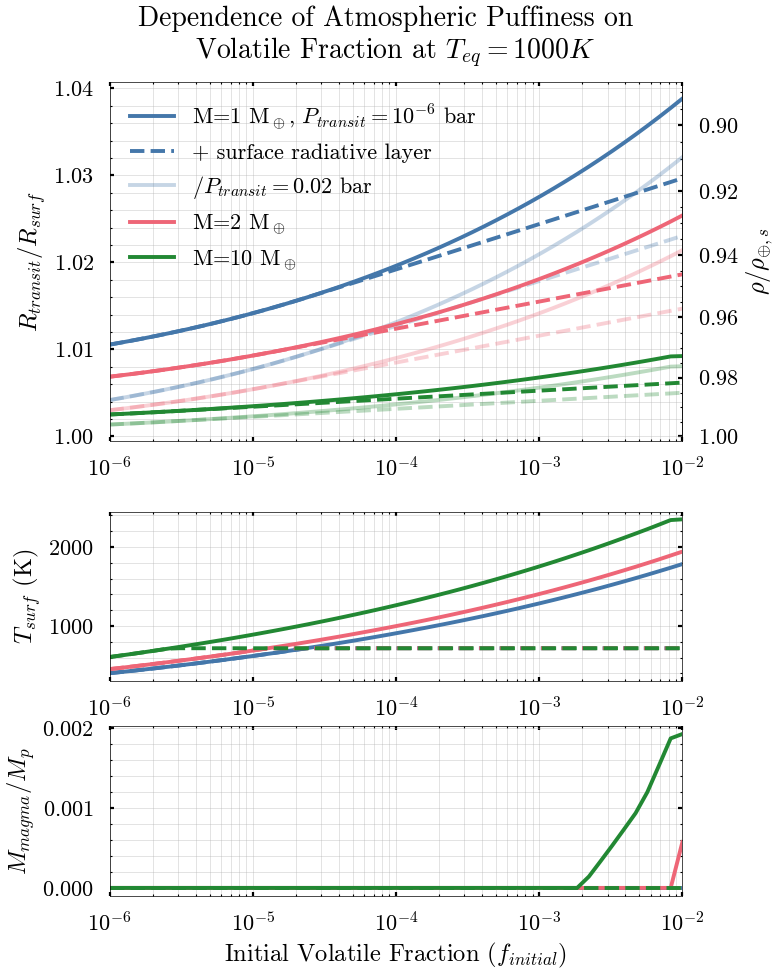

In [81]:
fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(413)
ax3 = fig.add_subplot(414)

for n1,pl_masse in enumerate(pl_masse_arr):
    if n1 == 0:
        ax1.plot(f_initial,pl_z_atm[0,n1],c=f'C{n1}',label=f'M={pl_masse} M$_\oplus$, $P_{{transit}}=10^{{-6}}$ bar')
        ax1.plot(f_initial,pl_z_atm[1,n1],c=f'C{n1}',ls='--',label=f'+ surface radiative layer')

        ax1.plot(f_initial,pl_z_atm[2,n1],c=f'C{n1}',alpha=0.3,label=f'$/P_{{transit}}=0.02$ bar')
    else:
        ax1.plot(f_initial,pl_z_atm[0,n1],c=f'C{n1}',label=f'M={pl_masse} M$_\oplus$')
        ax1.plot(f_initial,pl_z_atm[1,n1],c=f'C{n1}',ls='--')
        ax1.plot(f_initial,pl_z_atm[2,n1],c=f'C{n1}',alpha=0.3)
    ax1.plot(f_initial,pl_z_atm[3,n1],c=f'C{n1}',ls='--',alpha=0.3)

    ax2.plot(f_initial,pl_tsurf[0,n1],c=f'C{n1}')
    ax2.plot(f_initial,pl_tsurf[1,n1],c=f'C{n1}',ls='--')

    ax3.plot(f_initial,pl_m_magma[0,n1],c=f'C{n1}')
    ax3.plot(f_initial,pl_m_magma[1,n1],c=f'C{n1}',ls='--')

ax1.legend()

# ax2.set_ylim(0,3000)

# ax3.set_yscale('log')
# ax3.set_ylim(1e-3,1)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_ylabel('$R_{transit}/R_{surf}$')
ax2.set_ylabel('$T_{surf}$ (K)')
ax3.set_ylabel('$M_{magma}/M_p$')


for ax in [ax1,ax2,ax3]:
    ax.set_xlim(1e-6,1e-2)
    ax.grid(True, which="both", ls="-", alpha=0.5,lw=0.5)
ax3.set_xlabel('Initial Volatile Fraction ($f_{initial}$)')
# Conversion functions
def R_to_rho(R):
    # Constants
    
    return 1/R**3

def rho_to_R(rho):
    # Constants
    
    return 1/rho**(1/3)
ax1.tick_params(axis='y',which='both', right=False)
ax12 = ax1.secondary_yaxis('right', functions=(R_to_rho, rho_to_R))
ax12.set_ylabel(r'$\rho/\rho_{\oplus,s}$')
fig.suptitle('Dependence of Atmospheric Puffiness on \n Volatile Fraction at $T_{eq}=1000 K$',fontsize=20)

plt.tight_layout(h_pad=0)

fig.savefig('./figures/boosting_effect.pdf',bbox_inches='tight')


In [ ]:
# earth_radius = 6.371e6  # in m
# rad_1d3 = cs.calculate_z_rad(1,1,2e-2*1e5,1e7,500,44,T_adjust = True, g_adjust=True, gamma=4/3)/earth_radius
# rad_1d1 = cs.calculate_z_rad(1,1,1e-1*1e5,1e7,500,44,T_adjust = True, g_adjust=True, gamma=1.1)/earth_radius
# rad_1d3_inversion = cs.calculate_z_rad(1,1,1e-1*1e5,1e7,500,44,T_adjust = True, g_adjust=True, inversion=True, gamma=4/3)/earth_radius


# print(rad_1d3,rad_1d3_inversion,rad_1d1)

In [17]:
from scipy.stats import linregress

def plot_trend(X,y,ax,line_color='black',face_color='gray',logfit=False):

    if logfit == True:
        X = np.log10(X)
        y = np.log10(y)
    if logfit =='x':
        X = np.log10(X)
    if logfit =='y':
        y = np.log10(y)
    # Perform a simple linear regression using scipy
    slope, intercept, r_value, p_value, std_err = linregress(X, y)

    # print(min(X),max(X))
    # Function to perform bootstrap sampling and refit the model
    def bootstrap(X, y, n_bootstrap=100):
        slopes = []
        intercepts = []
        
        # Bootstrap loop: sample with replacement and fit the line
        for _ in range(n_bootstrap):
            idx = np.random.choice(range(len(X)), size=int(len(X)), replace=True)
            X_resample = X[idx]
            y_resample = y[idx]
            
            slope_b, intercept_b, _, _, _ = linregress(X_resample, y_resample)
            slopes.append(slope_b)
            intercepts.append(intercept_b)
        
        return np.array(slopes), np.array(intercepts)

    # Perform bootstrapping to estimate uncertainty
    n_bootstrap = 1000
    boot_slopes, boot_intercepts = bootstrap(X, y, n_bootstrap)

    # Get the mean and confidence intervals (95%)
    slope_mean = np.mean(boot_slopes)
    intercept_mean = np.mean(boot_intercepts)

    X_plot = np.linspace(min(X), max(X), 100)

    if logfit == False:
        ax.plot(X_plot, slope * X_plot + intercept, color=line_color,zorder=80)

        ax.fill_between(X_plot, 
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 2.5, axis=0),
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 97.5, axis=0),
                        color=face_color, alpha=0.3,zorder=100)
    elif logfit == 'x':
        ax.plot(10**X_plot, (slope * X_plot + intercept), color=line_color,zorder=80)

        ax.fill_between(10**X_plot,
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 2.5, axis=0),
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 97.5, axis=0),
                        color=face_color, alpha=0.3,zorder=100)
    elif logfit == 'y':
        ax.plot(X_plot, 10**(slope * X_plot + intercept), color=line_color,zorder=80)
        ax.fill_between(X_plot,
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 2.5, axis=0),
                        np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 97.5, axis=0),
                        color=face_color, alpha=0.3,zorder=100)
        
    else:
        ax.plot(10**X_plot, 10**(slope * X_plot + intercept), color=line_color,zorder=80)

        ax.fill_between(10**X_plot,
                        10**np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 2.5, axis=0),
                        10**np.percentile([slope_b * X_plot + intercept_b for slope_b, intercept_b in zip(boot_slopes, boot_intercepts)], 97.5, axis=0),
                        color=face_color, alpha=0.3,zorder=100)
    return slope_mean, intercept_mean, boot_slopes, boot_intercepts    

def plot_sample(sample,ax,rho_var = 'rho_ratio_lower',x_var='pl_masse',cbar_var='pl_teq',logfit=False):
    # ax.scatter(sample[x_var],sample[rho_var],
                # c=sample[cbar_var],cmap='BuPu_r',vmin=300,vmax=2000,s=20)
    sns.histplot(sample,x=x_var,y=rho_var,ax=ax,cbar=True)
    k,b,k_range,b_range = plot_trend(sample[x_var],
                sample[rho_var],
                ax,line_color='red',face_color='gray',logfit=logfit)
    plt.text(0.05,0.8,'k=%5.e'%k,transform=ax.transAxes, fontsize=20)


In [18]:
# data_no_comp = sample_generate(100,no_comp=True)   
# # data_no_comp.to_csv('./data-montecarlo/rho_data_no_comp.csv')

# data_1sigma = sample_generate(100,no_comp=False,n_sigma=1)
# # data_1sigma.to_csv('./data-montecarlo/rho_data_1sigma.csv')

# data_3sigma = sample_generate(100,no_comp=False,n_sigma=3)
# # data_3sigma.to_csv('./data-montecarlo/rho_data_3sigma.csv')

# data_uni = sample_generate(100,no_comp=False,n_sigma=0)
# # data_uni.to_csv('./data-montecarlo/rho_data_uni.csv')

# data_uni_rho = sample_generate(100,no_comp=False,n_sigma=0,sample_rho=True)
# # data_uni_rho.to_csv('./data-montecarlo/rho_data_uni_rho.csv')

In [19]:
data_no_comp = pd.read_csv('./data-montecarlo/rho_data_no_comp.csv')
data_1sigma = pd.read_csv('./data-montecarlo/rho_data_1sigma.csv')
data_3sigma = pd.read_csv('./data-montecarlo/rho_data_3sigma.csv')
data_uni = pd.read_csv('./data-montecarlo/rho_data_uni.csv')
data_uni_rho = pd.read_csv('./data-montecarlo/rho_data_uni_rho.csv')

In [20]:
data_no_comp['pl_rho_ratio_solid'] = (cs.M_R_fit(data_no_comp['pl_masse'], x_M_or_R='M', type='Earth') ** 3 /
                                         data_no_comp['pl_rade'] ** 3)

data_1sigma['pl_rho_ratio_solid'] = (cs.M_R_fit(data_1sigma['pl_masse'], x_M_or_R='M', type='Earth') ** 3 /
                                            data_1sigma['pl_rade'] ** 3)

data_3sigma['pl_rho_ratio_solid'] = (cs.M_R_fit(data_3sigma['pl_masse'], x_M_or_R='M', type='Earth') ** 3 /
                                            data_3sigma['pl_rade'] ** 3)

data_uni['pl_rho_ratio_solid'] = (cs.M_R_fit(data_uni['pl_masse'], x_M_or_R='M', type='Earth') ** 3 /
                                            data_uni['pl_rade'] ** 3)

data_uni_rho['pl_rho_ratio_solid'] = (cs.M_R_fit(data_uni_rho['pl_masse'], x_M_or_R='M', type='Earth') ** 3 /
                                            data_uni_rho['pl_rade'] ** 3)

In [21]:
df_rocks_sub = df_rocks[(df_rocks['pl_masseerr2']/df_rocks['pl_masse']<0.5)&(df_rocks['pl_masseerr1']/df_rocks['pl_masse']<0.5)]


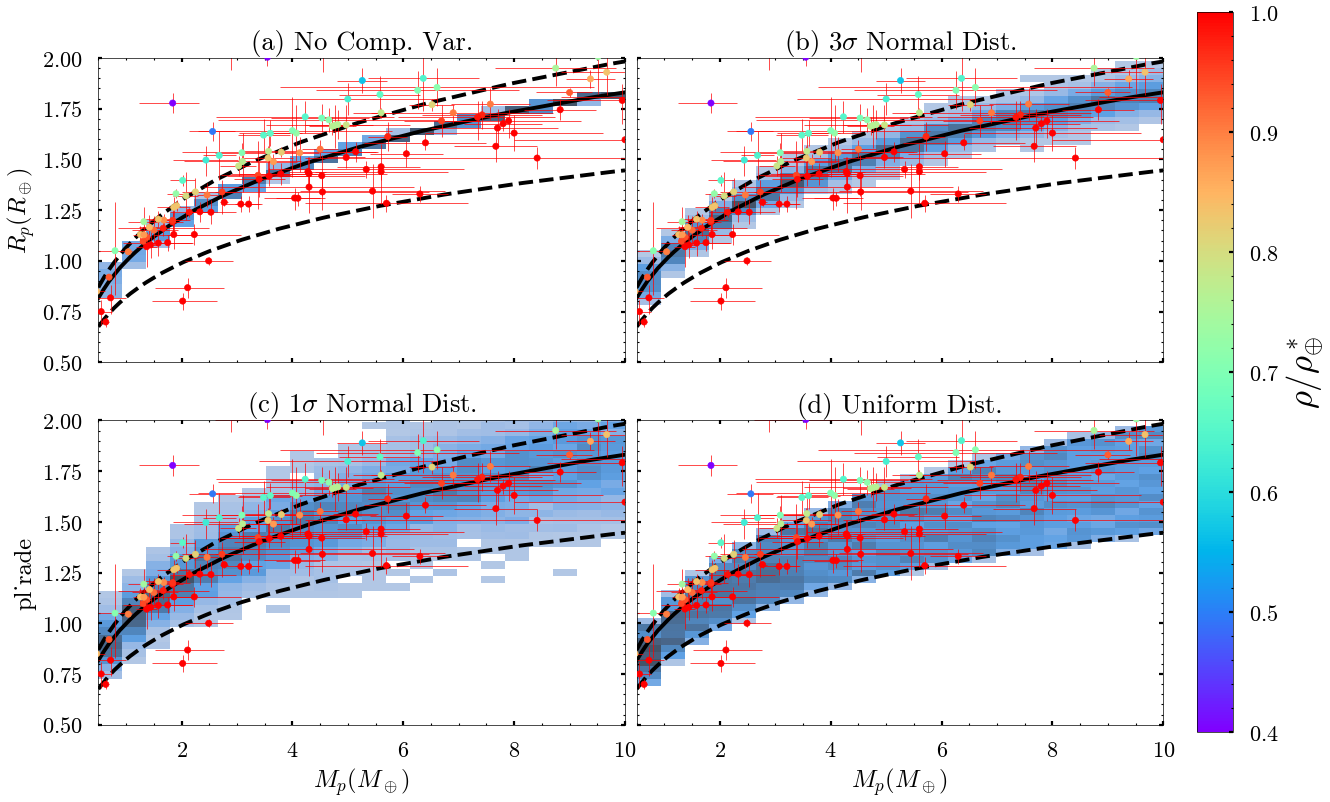

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8),sharex=True,sharey=True)

ax=axes.flatten()

sns.histplot(data_no_comp,x='pl_masse',y='pl_rade',ax=ax[0])
sns.histplot(data_3sigma,x='pl_masse',y='pl_rade',ax=ax[1])
sns.histplot(data_1sigma,x='pl_masse',y='pl_rade',ax=ax[2])
sns.histplot(data_uni,x='pl_masse',y='pl_rade',ax=ax[3])

pl_masse_arr = np.linspace(0.5,10,100)


ax[0].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='rock'),ls='--', color='black')
ax[1].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='rock'),ls='--', color='black')
ax[2].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='rock'),ls='--', color='black')
ax[3].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='rock'),ls='--', color='black')

ax[0].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='iron'),ls='--', color='black')
ax[1].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='iron'),ls='--', color='black')
ax[2].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='iron'),ls='--', color='black')
ax[3].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='iron'),ls='--', color='black')

ax[0].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='Earth'),ls='-', color='black')
ax[1].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='Earth'),ls='-', color='black')
ax[2].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='Earth'),ls='-', color='black')
ax[3].plot(pl_masse_arr,cs.M_R_fit(pl_masse_arr,x_M_or_R='M',type='Earth'),ls='-', color='black')


df_rocks_sub = df_rocks[(df_rocks['pl_masseerr2']/df_rocks['pl_masse']<0.5)&(df_rocks['pl_masseerr1']/df_rocks['pl_masse']<0.5)]

c_ax = ax[0].scatter(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],c=df_rocks_sub['pl_rho_ratio'],s=20,vmin=0.4,vmax=1.0,cmap="rainbow",zorder=10)
ax[1].scatter(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],c=df_rocks_sub['pl_rho_ratio'],s=20,vmin=0.4,vmax=1.0,cmap="rainbow",zorder=10)
ax[2].scatter(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],c=df_rocks_sub['pl_rho_ratio'],s=20,vmin=0.4,vmax=1.0,cmap="rainbow",zorder=10)
ax[3].scatter(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],c=df_rocks_sub['pl_rho_ratio'],s=20,vmin=0.4,vmax=1.0,cmap="rainbow",zorder=10)

ax[0].errorbar(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],xerr=[df_rocks_sub['pl_masseerr1'],-df_rocks_sub['pl_masseerr2']],
               yerr=[df_rocks_sub['pl_radeerr1'],-df_rocks_sub['pl_radeerr2']],fmt='none',ecolor='red',lw=0.5)
ax[1].errorbar(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],xerr=[df_rocks_sub['pl_masseerr1'],-df_rocks_sub['pl_masseerr2']],
                yerr=[df_rocks_sub['pl_radeerr1'],-df_rocks_sub['pl_radeerr2']],fmt='none',ecolor='red',lw=0.5)
ax[2].errorbar(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],xerr=[df_rocks_sub['pl_masseerr1'],-df_rocks_sub['pl_masseerr2']],
                yerr=[df_rocks_sub['pl_radeerr1'],-df_rocks_sub['pl_radeerr2']],fmt='none',ecolor='red',lw=0.5)
ax[3].errorbar(df_rocks_sub['pl_masse'],df_rocks_sub['pl_rade'],xerr=[df_rocks_sub['pl_masseerr1'],-df_rocks_sub['pl_masseerr2']],
                yerr=[df_rocks_sub['pl_radeerr1'],-df_rocks_sub['pl_radeerr2']],fmt='none',ecolor='red',lw=0.5)


for ax_i in ax:
    ax_i.set_xlim(0.5,10)
    ax_i.set_ylim(0.5,2)

ax[0].set_xlabel('$M_p(M_\oplus)$')
ax[1].set_xlabel('$M_p(M_\oplus)$')
ax[2].set_xlabel('$M_p(M_\oplus)$')
ax[3].set_xlabel('$M_p(M_\oplus)$')

ax[0].set_ylabel('$R_p(R_\oplus)$')
ax[1].set_ylabel('$R_p(R_\oplus)$')

ax[0].set_title('(a) No Comp. Var.')
ax[1].set_title('(b) 3$\sigma$ Normal Dist.')
ax[2].set_title('(c) 1$\sigma$ Normal Dist.')
ax[3].set_title('(d) Uniform Dist.')


plt.tight_layout(w_pad=0)

cbar_ax=fig.add_axes([1.001, 0.1, 0.05, 0.9])
cbar_ax.set_axis_off()
cba = plt.colorbar(c_ax, ax=cbar_ax,fraction=0.9, pad=0.5)
cba.set_label(r'$\rho$/$\rho^*_{\oplus}$',fontsize=25)


fig.savefig('./figures/MR_relation.png',bbox_inches='tight')


In [23]:
data_no_comp_plot = data_no_comp.sample(5000)
data_3sigma_plot = data_3sigma.sample(5000)
data_uni_plot = data_uni.sample(5000)

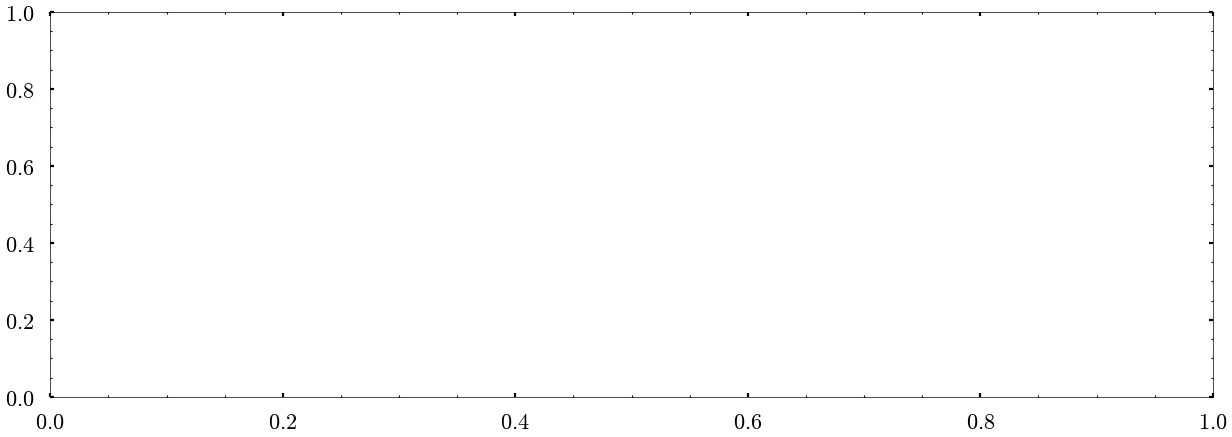

In [24]:
fig,ax=plt.subplots(1,1,figsize=(15,5))

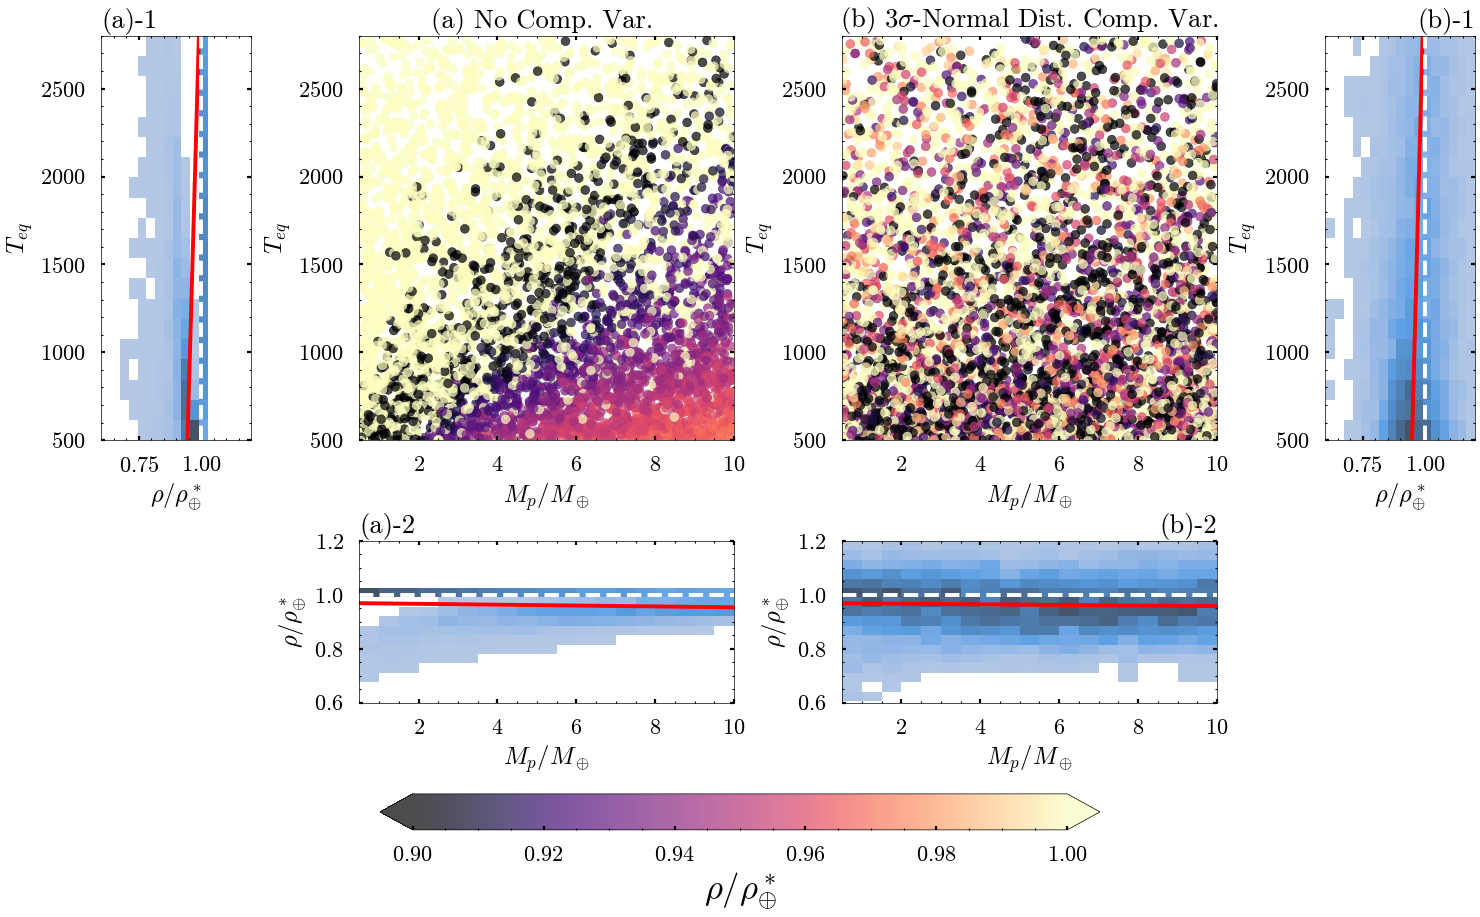

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8),width_ratios=[0.4,1,1,0.4],height_ratios=[1,0.4])

cb1 = axes[0,1].scatter(data_no_comp_plot['pl_masse'],data_no_comp_plot['pl_teq'],
                    c=data_no_comp_plot['pl_rho_ratio_lower'],
                    vmin=0.9,vmax=1.,s=40,cmap='magma',alpha=0.7)

# axes[0,1].scatter(data_no_comp_plot['pl_masse'][data_no_comp_plot['pl_rho_ratio_lower']>1],
# data_no_comp_plot['pl_teq'][data_no_comp_plot['pl_rho_ratio_lower']>1],
#                     c='gray',s=20,alpha=0.5) 




axes[0,1].set_ylabel('$T_{eq}$')
axes[0,1].set_xlabel('$M_p/M_\oplus$')


sns.histplot(data_no_comp,x='pl_rho_ratio_lower',y='pl_teq',log_scale=(False,False),ax=axes[0,0],
             bins=20,binrange=([0.5,1.2],[500,2800]))
sns.histplot(data_no_comp,x='pl_masse',y='pl_rho_ratio_lower',log_scale=(False,False),ax=axes[1,1],
             bins=20,binrange=([0,10],[0.5,1.2]))
axes[1,0].axis('off')
axes[1,3].axis('off')


axes[0,2].scatter(data_3sigma_plot['pl_masse'],data_3sigma_plot['pl_teq'],
                  c=data_3sigma_plot['pl_rho_ratio_lower'],
                    vmin=0.9,vmax=1.,s=40,cmap='magma',alpha=0.7)

axes[0,2].set_ylabel('$T_{eq}$')
axes[0,2].set_xlabel('$M_p/M_\oplus$')

sns.histplot(data_3sigma,x='pl_rho_ratio_lower',y='pl_teq',log_scale=(False,False),ax=axes[0,3],
              bins=20,binrange=([0.5,1.2],[500,2800]))
sns.histplot(data_3sigma,x='pl_masse',y='pl_rho_ratio_lower',log_scale=(False,False),ax=axes[1,2],
             bins=20,binrange=([0,10],[0.5,1.2]))

axes[0,0].set_xlim(0.6,1.2)
axes[0,3].set_xlim(0.6,1.2)
axes[1,1].set_ylim(0.6,1.2)
axes[1,2].set_ylim(0.6,1.2)

axes[0,0].set_ylim(500,2800)
axes[0,3].set_ylim(500,2800)
axes[0,1].set_ylim(500,2800)
axes[0,2].set_ylim(500,2800)

axes[0,1].set_xlim(0.5,10)
axes[0,2].set_xlim(0.5,10)
axes[1,1].set_xlim(0.5,10)
axes[1,2].set_xlim(0.5,10)


axes[0,0].set_ylabel(r'$T_{eq}$')
axes[0,0].set_xlabel(r'$\rho/\rho^*_{\oplus}$')

axes[0,3].set_ylabel(r'$T_{eq}$')
axes[0,3].set_xlabel(r'$\rho/\rho^*_{\oplus}$')

axes[1,1].set_ylabel(r'$\rho/\rho^*_{\oplus}$')
axes[1,1].set_xlabel(r'$M_p/M_\oplus$')

axes[1,2].set_ylabel(r'$\rho/\rho^*_{\oplus}$')
axes[1,2].set_xlabel(r'$M_p/M_\oplus$')

k_S_no_comp, b_S_no_comp, k_S_no_comp_range, b_S_no_comp_range = plot_trend(data_no_comp['pl_teq'],data_no_comp['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')
k_S_3sigma, b_S_3sigma, k_S_3sigma_range, b_S_3sigma_range = plot_trend(data_3sigma['pl_teq'],data_3sigma['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')
k_S_uni, b_S_uni, k_S_uni_range, b_S_uni_range = plot_trend(data_uni['pl_teq'],data_uni['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')
k_Mp_no_comp, b_Mp_no_comp, k_Mp_no_comp_range, b_Mp_no_comp_range = plot_trend(data_no_comp['pl_masse'],data_no_comp['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')
k_Mp_3sigma, b_Mp_3sigma, k_Mp_3sigma_range, b_Mp_3sigma_range = plot_trend(data_3sigma['pl_masse'],data_3sigma['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')
k_Mp_uni, b_Mp_uni, k_Mp_uni_range, b_Mp_uni_range = plot_trend(data_uni['pl_masse'],data_uni['pl_rho_ratio_lower'],
                ax,line_color='black',face_color='gray')

S_arr = np.linspace(500,2800,100)
Mp_arr = np.linspace(0.5,10,100)
axes[0,0].plot(k_S_no_comp*(S_arr)+b_S_no_comp,S_arr,ls='-',color='r')
axes[0,3].plot(k_S_3sigma*(S_arr)+b_S_3sigma,S_arr,ls='-',color='r')
axes[1,1].plot(Mp_arr,k_Mp_no_comp*Mp_arr+b_Mp_no_comp,ls='-',color='r')
axes[1,2].plot(Mp_arr,k_Mp_3sigma*Mp_arr+b_Mp_3sigma,ls='-',color='r')

# axes[0,0].fill_betweenx(S_arr, np.percentile([k_i*np.log10(S_arr)+b_i for k_i, b_i in zip(k_S_no_comp_range, b_S_no_comp_range)], 2.5, axis=0),
#                         np.percentile([k_i*np.log10(S_arr)+b_i for k_i, b_i in zip(k_S_no_comp_range, b_S_no_comp_range)], 97.5, axis=0),
#                         color='r', alpha=0.8,zorder=10)

# axes[0,3].fill_betweenx(S_arr, np.percentile([k_i*np.log10(S_arr)+b_i for k_i, b_i in zip(k_S_3sigma_range, b_S_3sigma_range)], 2.5, axis=0),
#                         np.percentile([k_i*np.log10(S_arr)+b_i for k_i, b_i in zip(k_S_3sigma_range, b_S_3sigma_range)], 97.5, axis=0),
#                         color='r', alpha=0.8,zorder=10)

# axes[1,1].fill_between(Mp_arr, np.percentile([k_i*Mp_arr+b_i for k_i, b_i in zip(k_Mp_no_comp_range, b_Mp_no_comp_range)], 2.5, axis=0),  
#                         np.percentile([k_i*Mp_arr+b_i for k_i, b_i in zip(k_Mp_no_comp_range, b_Mp_no_comp_range)], 97.5, axis=0),
#                         color='r', alpha=0.8,zorder=10)
# axes[1,2].fill_between(Mp_arr, np.percentile([k_i*Mp_arr+b_i for k_i, b_i in zip(k_Mp_3sigma_range, b_Mp_3sigma_range)], 2.5, axis=0),  
#                         np.percentile([k_i*Mp_arr+b_i for k_i, b_i in zip(k_Mp_3sigma_range, b_Mp_3sigma_range)], 97.5, axis=0),
#                         color='r', alpha=0.8,zorder=10)

axes[0,0].axvline(1,ls='--',color='w')
axes[0,3].axvline(1,ls='--',color='w')
axes[1,1].axhline(1,ls='--',color='w')
axes[1,2].axhline(1,ls='--',color='w')

axes[0,1].set_title('(a) No Comp. Var. ')
axes[0,2].set_title('(b) 3$\sigma$-Normal Dist. Comp. Var.')

axes[0,0].set_title('(a)-1', loc='left')
axes[0,3].set_title('(b)-1', loc='right')
axes[1,1].set_title('(a)-2', loc='left')
axes[1,2].set_title('(b)-2', loc='right')

plt.tight_layout(w_pad=0,h_pad=0)

cbar_ax=fig.add_axes([0.1, -0.05, 0.8, 0.05])
cbar_ax.set_axis_off()
cba = plt.colorbar(cb1, ax=cbar_ax,fraction=0.9, pad=0.5,orientation='horizontal', extend='both')
cba.set_label(r'$\rho$/$\rho^*_{\oplus}$',fontsize=25)

fig.savefig('./figures/rho_ratio_pattern.pdf',bbox_inches='tight')
fig.savefig('./figures/rho_ratio_pattern.png',bbox_inches='tight')



In [75]:
from scipy.stats import linregress
def k_bootstrap(
    X,
    y0,
    sample_sizes= np.logspace(1, 3, 10).astype(int),
    n_bootstrap=500,
    errorbar=False,
    mu_mp=0,
    mu_rp=0,
):
    """
    Evaluate how linear regression parameters vary with sample size using bootstrap.
    
    Parameters
    ----------
    X : array-like of shape (N,) or (N, d)
        Features from the original sample of size N=10000.
    y : array-like of shape (N,)
        Target/response from the original sample of size N=10000.
    sample_sizes : list of int
        List of sample sizes for which we want to test the linear model.
    n_bootstrap : int
        Number of bootstrap iterations for each sample size.
    
    Returns
    -------
    results : dict
        Dictionary keyed by sample_size, containing statistics (mean, std) for slope, intercept,
        and optionally other metrics.
    """
    
    if errorbar:
        mu_rho = np.sqrt((mu_mp)**2 + (3.7*mu_rp)**2)*y0
        rho_err = mu_rho * np.random.normal(0, 1, len(y0))
        y2 = y0 + rho_err
    

    X = np.array(X)
    y = np.array(y2)


    

    slope_mean_arr = np.zeros(len(sample_sizes))
    slope_conf_arr = np.zeros((len(sample_sizes),2))

    for i, size in enumerate(sample_sizes):
        slopes = []
        intercepts = []
        
        # Bootstrap loop: sample with replacement and fit the line
        for _ in range(n_bootstrap):
            idx = np.random.choice(range(len(X)), size=size)
            X_resample = X[idx]
            y_resample = y[idx]
            
            slope_b, intercept_b, _, _, _ = linregress(X_resample, y_resample)
            slopes.append(slope_b)
            intercepts.append(intercept_b)
        
        boot_slopes = np.array(slopes)

        # Get the mean and confidence intervals (90%)
        slope_mean = np.mean(boot_slopes)
        slope_conf = np.percentile(boot_slopes, [10,  90])
        
        slope_mean_arr[i] = slope_mean
        slope_conf_arr[i] = slope_conf
        
    return slope_mean_arr, slope_conf_arr

In [44]:
sample_size = np.logspace(1, 4, 10).astype(int)

k_lower_0sigma_mp, k_conf_lower_0sigma_mp = k_bootstrap(data_no_comp['pl_masse'],data_no_comp['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_0sigma_mp, k_conf_upper_0sigma_mp = k_bootstrap(data_no_comp['pl_masse'],data_no_comp['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_3sigma_mp, k_conf_lower_3sigma_mp = k_bootstrap(data_3sigma['pl_masse'],data_3sigma['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_3sigma_mp, k_conf_upper_3sigma_mp = k_bootstrap(data_3sigma['pl_masse'],data_3sigma['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_1sigma_mp, k_conf_lower_1sigma_mp = k_bootstrap(data_1sigma['pl_masse'],data_1sigma['pl_rho_ratio_lower'],sample_sizes=sample_size) 
k_upper_1sigma_mp, k_conf_upper_1sigma_mp = k_bootstrap(data_1sigma['pl_masse'],data_1sigma['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_uni_mp, k_conf_lower_uni_mp = k_bootstrap(data_uni['pl_masse'],data_uni['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_uni_mp, k_conf_upper_uni_mp = k_bootstrap(data_uni['pl_masse'],data_uni['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_uni_rho_mp, k_conf_lower_uni_rho_mp = k_bootstrap(data_uni_rho['pl_masse'],data_uni_rho['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_uni_rho_mp, k_conf_upper_uni_rho_mp = k_bootstrap(data_uni_rho['pl_masse'],data_uni_rho['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_0sigma_teq, k_conf_lower_0sigma_teq = k_bootstrap(data_no_comp['pl_teq'],data_no_comp['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_0sigma_teq, k_conf_upper_0sigma_teq = k_bootstrap(data_no_comp['pl_teq'],data_no_comp['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_3sigma_teq, k_conf_lower_3sigma_teq = k_bootstrap(data_3sigma['pl_teq'],data_3sigma['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_3sigma_teq, k_conf_upper_3sigma_teq = k_bootstrap(data_3sigma['pl_teq'],data_3sigma['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_1sigma_teq, k_conf_lower_1sigma_teq = k_bootstrap(data_1sigma['pl_teq'],data_1sigma['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_1sigma_teq, k_conf_upper_1sigma_teq = k_bootstrap(data_1sigma['pl_teq'],data_1sigma['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_uni_teq, k_conf_lower_uni_teq = k_bootstrap(data_uni['pl_teq'],data_uni['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_uni_teq, k_conf_upper_uni_teq = k_bootstrap(data_uni['pl_teq'],data_uni['pl_rho_ratio_upper'],sample_sizes=sample_size)

k_lower_uni_rho_teq, k_conf_lower_uni_rho_teq = k_bootstrap(data_uni_rho['pl_teq'],data_uni_rho['pl_rho_ratio_lower'],sample_sizes=sample_size)
k_upper_uni_rho_teq, k_conf_upper_uni_rho_teq = k_bootstrap(data_uni_rho['pl_teq'],data_uni_rho['pl_rho_ratio_upper'],sample_sizes=sample_size)

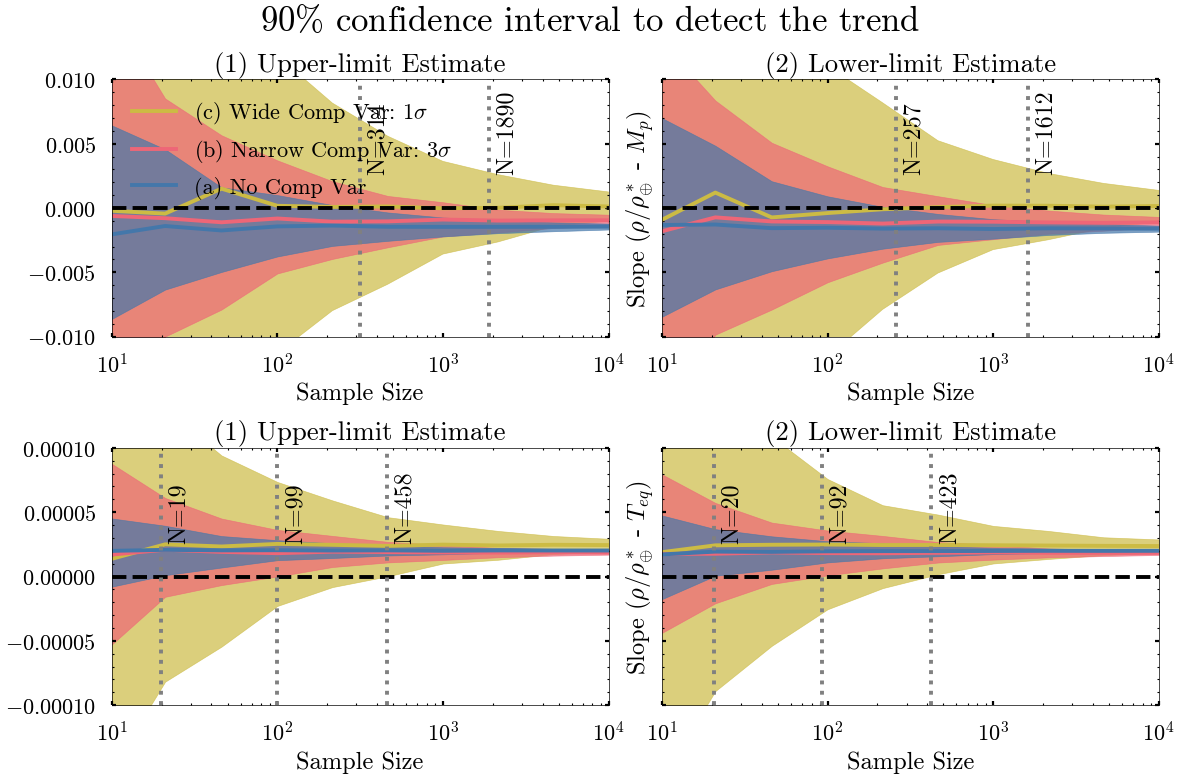

In [45]:
fig,axes = plt.subplots(2,2,figsize=(12,8),sharey='row')


axes[0,1].plot(sample_size,k_lower_1sigma_mp,label=r'(c) Wide Comp Var: 1$\sigma$',color='C3')
axes[0,1].fill_between(sample_size,k_conf_lower_1sigma_mp[:,0],k_conf_lower_1sigma_mp[:,1],alpha=0.7,color='C3')

axes[0,1].plot(sample_size,k_lower_3sigma_mp,label=r'(b) Narrow Comp Var: 3$\sigma$',color='C1')
axes[0,1].fill_between(sample_size,k_conf_lower_3sigma_mp[:,0],k_conf_lower_3sigma_mp[:,1],alpha=0.7,color='C1')

axes[0,1].plot(sample_size,k_lower_0sigma_mp,label='(a) No Comp Var',color='C0')
axes[0,1].fill_between(sample_size,k_conf_lower_0sigma_mp[:,0],k_conf_lower_0sigma_mp[:,1],alpha=0.7,color='C0')

axes[0,1].set_xscale('log')
axes[0,1].set_ylabel(r'Slope ($\rho/\rho^*_{\oplus}$ - $M_p$)')
axes[0,1].set_xlabel('Sample Size')


axes[0,0].plot(sample_size,k_upper_1sigma_mp,label=r'(c) Wide Comp Var: 1$\sigma$',color='C3')
axes[0,0].fill_between(sample_size,k_conf_upper_1sigma_mp[:,0],k_conf_upper_1sigma_mp[:,1],alpha=0.7,color='C3')

axes[0,0].plot(sample_size,k_upper_3sigma_mp,label=r'(b) Narrow Comp Var: 3$\sigma$',color='C1')
axes[0,0].fill_between(sample_size,k_conf_upper_3sigma_mp[:,0],k_conf_upper_3sigma_mp[:,1],alpha=0.7,color='C1')

axes[0,0].plot(sample_size,k_upper_0sigma_mp,label='(a) No Comp Var',color='C0')
axes[0,0].fill_between(sample_size,k_conf_upper_0sigma_mp[:,0],k_conf_upper_0sigma_mp[:,1],alpha=0.7,color='C0')

axes[0,0].set_xscale('log')
axes[0,0].set_xlabel('Sample Size')


axes[1,1].plot(sample_size,k_lower_1sigma_teq,label='(c) 1$\sigma$ Comp Var',color='C3')
axes[1,1].fill_between(sample_size,k_conf_lower_1sigma_teq[:,0],k_conf_lower_1sigma_teq[:,1],alpha=0.7,color='C3')

axes[1,1].plot(sample_size,k_lower_3sigma_teq,label='(b) 3$\sigma$ Comp Var',color='C1')
axes[1,1].fill_between(sample_size,k_conf_lower_3sigma_teq[:,0],k_conf_lower_3sigma_teq[:,1],alpha=0.7,color='C1')

axes[1,1].plot(sample_size,k_lower_0sigma_teq,label='(a) No Comp Var',color='C0')
axes[1,1].fill_between(sample_size,k_conf_lower_0sigma_teq[:,0],k_conf_lower_0sigma_teq[:,1],alpha=0.7,color='C0')

axes[1,1].set_xscale('log')
axes[1,1].set_ylabel(r'Slope ($\rho/\rho^*_{\oplus}$ - $T_{eq}$)')
axes[1,1].set_xlabel('Sample Size')


axes[1,0].plot(sample_size,k_upper_1sigma_teq,label='(c) Wide Comp Var',color='C3')
axes[1,0].fill_between(sample_size,k_conf_upper_1sigma_teq[:,0],k_conf_upper_1sigma_teq[:,1],alpha=0.7,color='C3')

axes[1,0].plot(sample_size,k_upper_3sigma_teq,label='(b) Narrow Comp Var',color='C1')
axes[1,0].fill_between(sample_size,k_conf_upper_3sigma_teq[:,0],k_conf_upper_3sigma_teq[:,1],alpha=0.7,color='C1')

axes[1,0].plot(sample_size,k_upper_0sigma_teq,label='(a) No Comp Var',color='C0')
axes[1,0].fill_between(sample_size,k_conf_upper_0sigma_teq[:,0],k_conf_upper_0sigma_teq[:,1],alpha=0.7,color='C0')

axes[1,0].set_xscale('log')
axes[1,0].set_xlabel('Sample Size')

for ax in axes.flatten():
    ax.axhline(0,ls='--',color='black')
    ax.set_xlim(10,10000)

axes[0,0].set_ylim(-0.01,0.01)
axes[1,0].set_ylim(-0.0001,0.0001)

N_0_upper_M = scipy.interpolate.interp1d(k_conf_upper_0sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_0_lower_M = scipy.interpolate.interp1d(k_conf_lower_0sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_3_upper_M = scipy.interpolate.interp1d(k_conf_upper_3sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_3_lower_M = scipy.interpolate.interp1d(k_conf_lower_3sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_1_lower_M = scipy.interpolate.interp1d(k_conf_lower_1sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_1_upper_M = scipy.interpolate.interp1d(k_conf_upper_1sigma_mp[:,1],sample_size,bounds_error=False,fill_value='extrapolate')(0)

N_0_upper_T = scipy.interpolate.interp1d(k_conf_upper_0sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_0_lower_T = scipy.interpolate.interp1d(k_conf_lower_0sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_3_upper_T = scipy.interpolate.interp1d(k_conf_upper_3sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_3_lower_T = scipy.interpolate.interp1d(k_conf_lower_3sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0) 
N_1_lower_T = scipy.interpolate.interp1d(k_conf_lower_1sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)
N_1_upper_T = scipy.interpolate.interp1d(k_conf_upper_1sigma_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)  

axes[0,0].axvline(N_0_upper_M,ls=':',color='gray')
axes[0,1].axvline(N_0_lower_M,ls=':',color='gray')
axes[0,0].axvline(N_3_upper_M,ls=':',color='gray')
axes[0,1].axvline(N_3_lower_M,ls=':',color='gray')
axes[0,0].axvline(N_1_upper_M,ls=':',color='gray')
axes[0,1].axvline(N_1_lower_M,ls=':',color='gray')

axes[1,0].axvline(N_0_upper_T,ls=':',color='gray')
axes[1,1].axvline(N_0_lower_T,ls=':',color='gray')
axes[1,0].axvline(N_3_upper_T,ls=':',color='gray')
axes[1,1].axvline(N_3_lower_T,ls=':',color='gray')
axes[1,0].axvline(N_1_upper_T,ls=':',color='gray')
axes[1,1].axvline(N_1_lower_T,ls=':',color='gray')

axes[0,0].text(N_0_upper_M*1.1,0.003,'N=%d'%N_0_upper_M,rotation=90,color='k',fontsize='xx-large')
axes[0,1].text(N_0_lower_M*1.1,0.003,'N=%d'%N_0_lower_M,rotation=90,color='k',fontsize='xx-large')
axes[0,0].text(N_3_upper_M*1.1,0.003,'N=%d'%N_3_upper_M,rotation=90,color='k',fontsize='xx-large')
axes[0,1].text(N_3_lower_M*1.1,0.003,'N=%d'%N_3_lower_M,rotation=90,color='k',fontsize='xx-large')

axes[1,0].text(N_0_upper_T*1.1,3e-5,'N=%d'%N_0_upper_T,rotation=90,color='k',fontsize='xx-large')
axes[1,1].text(N_0_lower_T*1.1,3e-5,'N=%d'%N_0_lower_T,rotation=90,color='k',fontsize='xx-large')
axes[1,0].text(N_3_upper_T*1.1,3e-5,'N=%d'%N_3_upper_T,rotation=90,color='k',fontsize='xx-large')
axes[1,1].text(N_3_lower_T*1.1,3e-5,'N=%d'%N_3_lower_T,rotation=90,color='k',fontsize='xx-large')
axes[1,0].text(N_1_upper_T*1.1,3e-5,'N=%d'%N_1_upper_T,rotation=90,color='k',fontsize='xx-large')
axes[1,1].text(N_1_lower_T*1.1,3e-5,'N=%d'%N_1_lower_T,rotation=90,color='k',fontsize='xx-large')

axes[0,0].legend()

axes[0,0].set_title('(1) Upper-limit Estimate')
axes[0,1].set_title('(2) Lower-limit Estimate')
axes[1,0].set_title('(1) Upper-limit Estimate')
axes[1,1].set_title('(2) Lower-limit Estimate')
fig.suptitle(r'$90\%$ confidence interval to detect the trend',fontsize=25)

fig.tight_layout(w_pad=0)

fig.savefig('./figures/slope_vs_sample_size.pdf',bbox_inches='tight')



## 3.3 Observations

In [35]:
print('sample size:',len(df_rocks))
df_rock_mass = df_rocks[df_rocks['pl_masse']>0]
print('sample size (w/ mass):',len(df_rock_mass))
df_rocks_sub = df_rocks[(df_rocks['pl_masseerr2']/df_rocks['pl_masse']<0.5)&(df_rocks['pl_masseerr1']/df_rocks['pl_masse']<0.5)]
print('sample size (mass error<0.5):',len(df_rocks_sub))

sample size: 1262
sample size (w/ mass): 172
sample size (mass error<0.5): 126


Assuming $M_{\oplus,s} = R_{obs}^\alpha$; $\alpha=3.7$
$$\rho_{\oplus,s} = \frac{M_{obs}}{R_{obs}^\alpha}$$

$$ \frac{\sigma_{\rho_{\oplus,s}}}{\rho_{\oplus,s}} = \sqrt{ \left(\frac{\sigma_M}{M_{\rm obs}}\right)^2 + \left(\alpha \, \frac{\sigma_R}{R_{\rm obs}}\right)^2 }$$

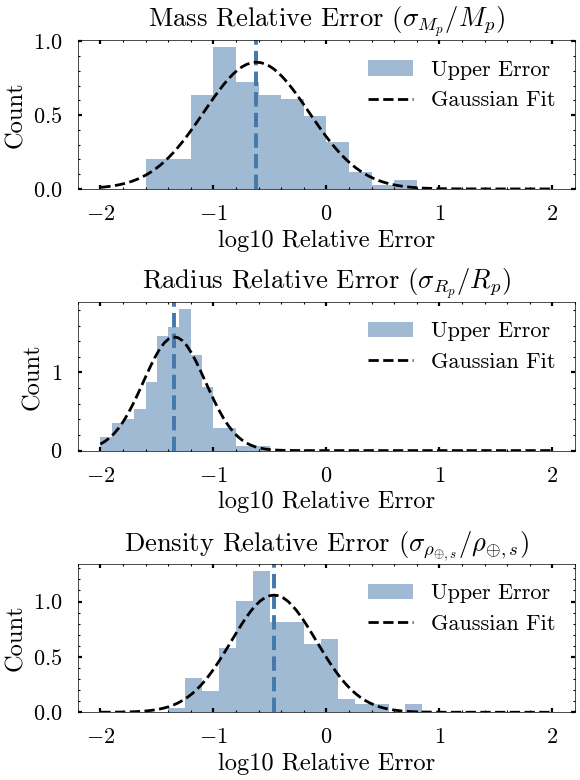

In [36]:
from math import log
from threading import local

from networkx import sigma


fig, axes = plt.subplots(3, 1, figsize=(6, 8))

axes[0].hist(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse']),bins=20,range=(-2,2),color='C0',alpha=0.5,label='Upper Error',density=1)
# axes[0].hist(np.log10(-df_rock_mass['pl_masseerr2']/df_rock_mass['pl_masse']),bins=20,range=(-2,2),color='C1',alpha=0.5,label='Lower Error')
axes[0].axvline(np.mean(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse'])),ls='--',color='C0')
# axes[0].axvline(np.mean(np.log10(-df_rock_mass['pl_masseerr2']/df_rock_mass['pl_masse'])),ls='--',color='C1')

axes[1].hist(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade']),bins=20,range=(-2,0),color='C0',alpha=0.5,label='Upper Error',density=1)
# axes[1].hist(np.log10(-df_rock_mass['pl_radeerr2']/df_rock_mass['pl_rade']),bins=20,range=(-2,0),color='C1',alpha=0.5,label='Lower Error')
axes[1].axvline(np.mean(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade'])),ls='--',color='C0')
# axes[1].axvline(np.mean(np.log10(-df_rock_mass['pl_radeerr2']/df_rock_mass['pl_rade'])),ls='--',color='C1')

rho_err1 = np.sqrt((df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse'])**2+(3.7*df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade'])**2)
# rho_err2 = np.sqrt((df_rock_mass['pl_masseerr2']/df_rock_mass['pl_masse'])**2+(3.7*df_rock_mass['pl_radeerr2']/df_rock_mass['pl_rade'])**2)

axes[2].hist(np.log10(rho_err1),bins=20,range=(-2,1),color='C0',alpha=0.5,label='Upper Error',density=1)
# axes[2].hist(np.log10(rho_err2),bins=20,range=(-2,1),color='C1',alpha=0.5,label='Lower Error')
axes[2].axvline(np.mean(np.log10(rho_err1)),ls='--',color='C0')
# axes[2].axvline(np.mean(np.log10(rho_err2)),ls='--',color='C1')



axes[0].set_title(r'Mass Relative Error ($\sigma_{M_p}/M_p$)')
axes[1].set_title(r'Radius Relative Error ($\sigma_{R_p}/R_p$)')
axes[2].set_title(r'Density Relative Error ($\sigma_{{\rho}_{\oplus,s}}/\rho_{\oplus,s}$)')
axes[0].set_xlabel('log10 Relative Error')
axes[1].set_xlabel('log10 Relative Error')
axes[2].set_xlabel('log10 Relative Error')
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')
axes[2].set_ylabel('Count')

pdf_fit = scipy.stats.norm.pdf
x = np.linspace(-2, 2, 100)
y_mp = pdf_fit(x, np.mean(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse'])), np.std(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse'])))
axes[0].plot(x, y_mp, 'k--', linewidth=2, label='Gaussian Fit')
axes[0].legend()

y_rp = pdf_fit(x, np.mean(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade'])), np.std(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade'])))
axes[1].plot(x, y_rp, 'k--', linewidth=2, label='Gaussian Fit')
axes[1].legend()

rho_rp = pdf_fit(x, np.mean(np.log10(rho_err1)), np.std(np.log10(rho_err1)))
axes[2].plot(x, rho_rp, 'k--', linewidth=2, label='Gaussian Fit')
axes[2].legend()

mu_rp = np.mean(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade']))
sigma_rp = np.std(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade']))

mu_mp = np.mean(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse']))
sigma_mp = np.std(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse']))




plt.tight_layout()


In [37]:
print('Mean Mass Relative Error:',10**np.mean(np.log10(df_rocks['pl_masseerr1']/df_rocks['pl_masse'])))
print('std',np.std(np.log10(df_rock_mass['pl_masseerr1']/df_rock_mass['pl_masse'])))
print('Mean Radius Relative Error:',10**np.mean(np.log10(df_rocks['pl_radeerr1']/df_rocks['pl_rade'])))
print('std',np.std(np.log10(df_rock_mass['pl_radeerr1']/df_rock_mass['pl_rade'])))
print('Mean Density Relative Error:',10**np.mean(np.log10(rho_err1)))
print('std',np.std(np.log10(rho_err1)))

Mean Mass Relative Error: 0.240194653594839
std 0.46464023126897297
Mean Radius Relative Error: 0.07561369280889735
std 0.2740939226234219
Mean Density Relative Error: 0.3432382271587114
std 0.37695791605391205


In [78]:
mass_err = 0.24
rad_err = 0.076

k_teq, k_conf_teq = k_bootstrap(data_1sigma['pl_teq'],data_1sigma['pl_rho_ratio_upper'],
                                                                sample_sizes=sample_size, mu_mp=mass_err, mu_rp=rad_err,errorbar=True)
N_T = scipy.interpolate.interp1d(k_conf_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)

print(N_T)

877.3762382446714


In [103]:
# # it takes 6 mins to run
# sample_size = np.logspace(1, 4, 10).astype(int)
# mass_err_mu = np.logspace(-2, -0.5, 10)
# rad_err_mu = np.logspace(-2, -0.5, 10)
# mu_mp = 0.24
# mu_rp = 0.076
# N_T_max = np.zeros([len(mass_err_mu),len(rad_err_mu)])


# for i, mass_err in enumerate(mass_err_mu):
#     for j, rad_err in enumerate(rad_err_mu):
#         k_teq, k_conf_teq = k_bootstrap(data_3sigma['pl_teq'],data_3sigma['pl_rho_ratio_upper'],
#                                                                 sample_sizes=sample_size, mu_mp=mass_err, mu_rp=rad_err,errorbar=True)
#         N_T = scipy.interpolate.interp1d(k_conf_teq[:,0],sample_size,bounds_error=False,fill_value='extrapolate')(0)
#         N_T_max[i,j] = N_T
# np.save('./data-montecarlo/N_T_max.npy',N_T_max)

In [104]:
sample_size = np.logspace(1, 4, 10).astype(int)
mass_err_mu = np.logspace(-3, 0, 10)
rad_err_mu = np.logspace(-3, 0, 10)
N_T_max = np.load('./data-montecarlo/N_T_max.npy')

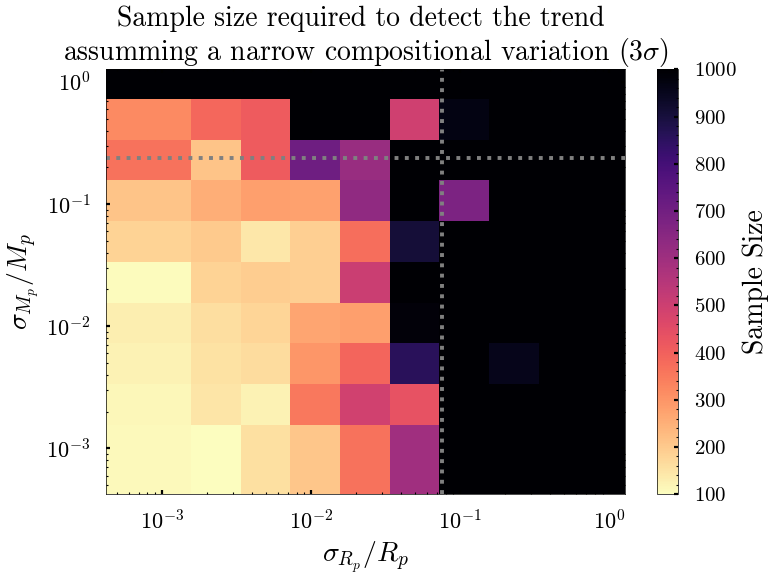

In [113]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolor(rad_err_mu, mass_err_mu, N_T_max, cmap='magma_r',vmin=100,vmax=1000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\sigma_{R_p}/R_p$', fontsize=20)
ax.set_ylabel(r'$\sigma_{M_p}/M_p$', fontsize=20)
ax.set_title('Sample size required to detect the trend \n'+ r'assumming a narrow compositional variation (3$\sigma$)', fontsize=20)
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Sample Size', fontsize=20)
cbar.ax.tick_params(labelsize=15)
# cbar.set_ticks([2,np.log10(200),np.log10(300),np.log10(500),3])
# cbar.set_ticklabels([100,200,300,500,1000])

mu_mp = 0.24
mu_rp = 0.076

ax.axvline(mu_rp, ls=':', color='gray')
ax.axhline(mu_mp, ls=':', color='gray')

plt.tight_layout()
plt.savefig('./figures/sample_size_contour.pdf',bbox_inches='tight')